# NBaIoT SOM HYPEROPT CLASSIFY

## Device 5

- Training on device 5 (using both Mirai and Gafgyt).
- Testing on device 5 (both Mirai & Gafgyt)

# Imports

In [1]:
# import sys
import sys
import os
import random
import numpy as np
import pandas as pd

# from hyperopt import fmin, tpe, hp, STATUS_OK, rand, atpe, mix, anneal

from sklearn.model_selection import train_test_split

In [2]:
print(os.path.dirname(os.path.dirname(os.getcwd())))
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))

/home/ladin/projects/research/iot-anomaly-detection


In [3]:
from utils.config import data_path, nbaiot_1K_data_path, nbaiot_10K_data_path, nbaiot_5K_data_path, \
    nbaiot_20K_data_path, nbaiot_data_path, dn_nbaiot
from utils.datasets import get_data, get_data_d3

In [4]:
# from pyscripts.main_som import main, process_train_test_partial, som_test, load_common_data, load_data_test
from pyscripts.main_som import process_train_test_partial, process_train_partial, som_test, load_data_test, process_train_som_hyperopt

## Set folder and gafgyt params

In [5]:
choose_folder = nbaiot_data_path

In [6]:
print(choose_folder)

/home/ladin/projects/research/iot-anomaly-detection/data/nbaiot


## Set training and testing devices

In [7]:
train_index = 5

In [8]:
train_index

5

## Set params (percentage, num_features)

In [9]:
# train_size = 0.5
# test_size = 0.5
# num_features = 29

# 1. Load data and preprocess data

In [10]:
# Load data on device 1
data_benign, target_benign, data_gafgyt, target_gafgyt, data_mirai, target_mirai = get_data(choose_folder=choose_folder, choose_index=train_index)

In [11]:
(data_benign.shape, target_benign.shape), (data_gafgyt.shape, target_gafgyt.shape), (data_mirai.shape, target_mirai.shape)

(((62154, 115), (62154,)),
 ((330096, 115), (330096,)),
 ((436010, 115), (436010,)))

## Split data

In [12]:
data_benign_train, data_benign_test, target_benign_train, target_benign_test = train_test_split(data_benign, target_benign, test_size=0.3, shuffle=True, random_state=1)

data_gafgyt_train, data_gafgyt_test, target_gafgyt_train, target_gafgyt_test = train_test_split(data_gafgyt, target_gafgyt, test_size=0.3, shuffle=True, random_state=1)

data_mirai_train, data_mirai_test, target_mirai_train, target_mirai_test = train_test_split(data_mirai, target_mirai, test_size=0.3, shuffle=True, random_state=1)

In [13]:
data_benign_train.shape, data_benign_test.shape, target_benign_train.shape, target_benign_test.shape

((43507, 115), (18647, 115), (43507,), (18647,))

In [14]:
data_gafgyt_train.shape, data_gafgyt_test.shape, target_gafgyt_train.shape, target_gafgyt_test.shape

((231067, 115), (99029, 115), (231067,), (99029,))

In [15]:
data_mirai_train.shape, data_mirai_test.shape, target_mirai_train.shape, target_mirai_test.shape

((305207, 115), (130803, 115), (305207,), (130803,))

## Set ratio

In [16]:
benign_size = 10000 # data_benign_train.shape[0], build va train voi 10K
print(benign_size)

10000


In [17]:
ratio_1 = int(1.0*benign_size)

In [18]:
# get train data
data_benign_train, _, target_benign_train, _ = train_test_split(data_benign_train, target_benign_train, train_size=ratio_1, shuffle=True, random_state = 1)

In [19]:
data_benign_train.shape, target_benign_train.shape

((10000, 115), (10000,))

## Get train data of benign and gafgyt by ratio

In [20]:
# train 1.0
data_gafgyt_1, _, target_gafgyt_1, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_1, shuffle=True, random_state = 1)

In [21]:
print(data_gafgyt_1.shape, target_gafgyt_1.shape)

(10000, 115) (10000,)


In [22]:
# 1.0
X_train_gafgyt_1 = np.vstack([data_benign_train, data_gafgyt_1])
y_train_gafgyt_1 = np.hstack([target_benign_train, target_gafgyt_1])

In [23]:
print(X_train_gafgyt_1.shape, y_train_gafgyt_1.shape)

(20000, 115) (20000,)


## Get train data of benign and Mirai by ratio

In [24]:
# train 1.0
data_mirai_1, _, target_mirai_1, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_1, shuffle=True, random_state = 1)

In [25]:
print(data_mirai_1.shape, target_mirai_1.shape)

(10000, 115) (10000,)


In [26]:
# 1.0
X_train_mirai_1 = np.vstack([data_benign_train, data_mirai_1])
y_train_mirai_1 = np.hstack([target_benign_train, target_mirai_1])

In [27]:
print(X_train_mirai_1.shape, y_train_mirai_1.shape)

(20000, 115) (20000,)


## Get test data

Lay ra kich thuoc cua benign test.

Lay Mirai & Gafgyt cung bang kich thuoc cua benign test

In [28]:
benign_test_size = data_benign_test.shape[0]

In [29]:
benign_test_size

18647

### Gafgyt

In [30]:
data_gafgyt_test.shape

(99029, 115)

In [31]:
# split first
data_gafgyt_test, _, target_gafgyt_test, _ = train_test_split(data_gafgyt_test, target_gafgyt_test, train_size=benign_test_size, shuffle=True, random_state = 1)

In [32]:
X_test_gafgyt = np.vstack([data_benign_test, data_gafgyt_test])
y_test_gafgyt = np.hstack([target_benign_test, target_gafgyt_test])
print(X_test_gafgyt.shape, y_test_gafgyt.shape)

(37294, 115) (37294,)


In [33]:
data_benign_test.shape, data_gafgyt_test.shape, target_benign_test.shape, target_gafgyt_test.shape

((18647, 115), (18647, 115), (18647,), (18647,))

## Mirai

In [34]:
# split first
data_mirai_test, _, target_mirai_test, _ = train_test_split(data_mirai_test, target_mirai_test, train_size=benign_test_size, shuffle=True, random_state = 1)

In [35]:
X_test_mirai = np.vstack([data_benign_test, data_mirai_test])
y_test_mirai = np.hstack([target_benign_test, target_mirai_test])
print(X_test_mirai.shape, y_test_mirai.shape)

(37294, 115) (37294,)


In [36]:
# X_test_mirai, _ ,y_test_mirai, _ = train_test_split(X_test_mirai, y_test_mirai, train_size=0.7, shuffle=True, random_state=1)

In [37]:
print(X_test_mirai.shape, y_test_mirai.shape)

(37294, 115) (37294,)



# 4. Normal SOM train and test


## 4.1.4. Ratio 1.0

### 1) Set 15

### Train

In [38]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo=None, som_x=15, som_y=15, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 1.08342144e-02  1.11059656e-01  7.57470744e-15 ...  2.62075562e-04
   7.75038876e-07  9.28901706e-03]
 [ 1.08012669e-02  1.11059656e-01  4.43278699e-18 ...  2.62488761e-04
   6.80897919e-07  8.13680098e-03]
 [ 3.64663319e-03  7.41613448e-02  3.09586504e-06 ...  0.00000000e+00
  -1.88520422e-35  0.00000000e+00]
 ...
 [ 1.14822143e-01  2.19880064e-01  1.35874582e-01 ...  2.46350400e-01
   3.16466503e-01  4.14968627e-01]
 [ 3.61899764e-03  7.40397736e-02  1.90220145e-10 ...  1.08609036e-18
  -2.78362185e-36  0.00000000e+00]
 [ 3.61899732e-03  7.40397704e-02  0.00000000e+00 ...  1.08609036e-18
   0.00000000e+00  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 3.0204288959503174


### Test on the same device

#### Test on gafgyt

Shape:  (37294, 115) (37294,)
----------------------Test is starting----------------------
Scale data
Shape:  (37294, 115) (37294,)
Shape:  (37294, 115) (37294,)
Normalize data
Shape:  (37294, 115) (37294,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.17092228 0.30488761 0.40855549 ... 1.17166186 1.17166185 1.16710546]
Visualize quantization error


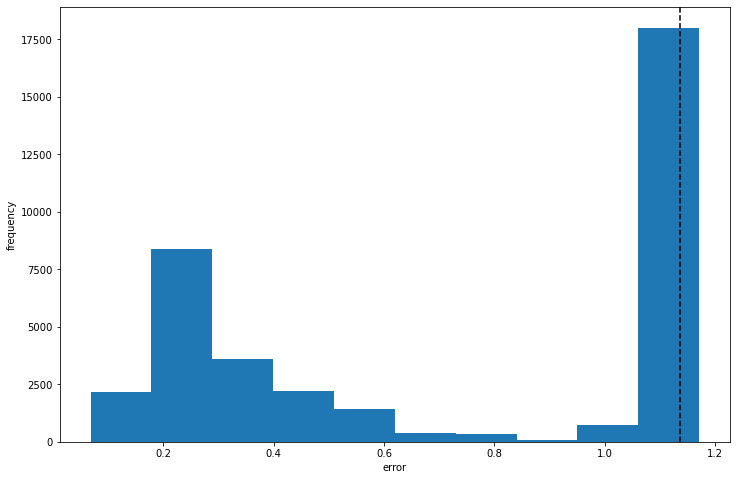

Outliers visualization


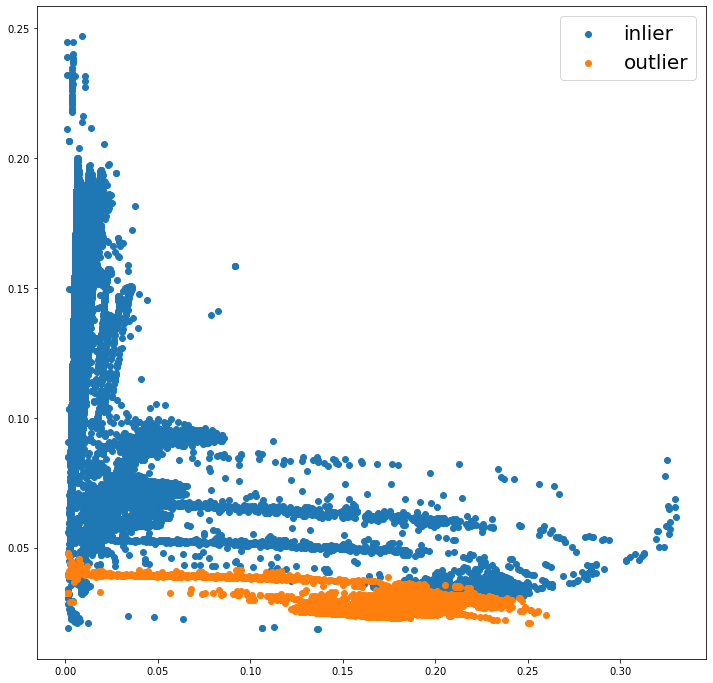

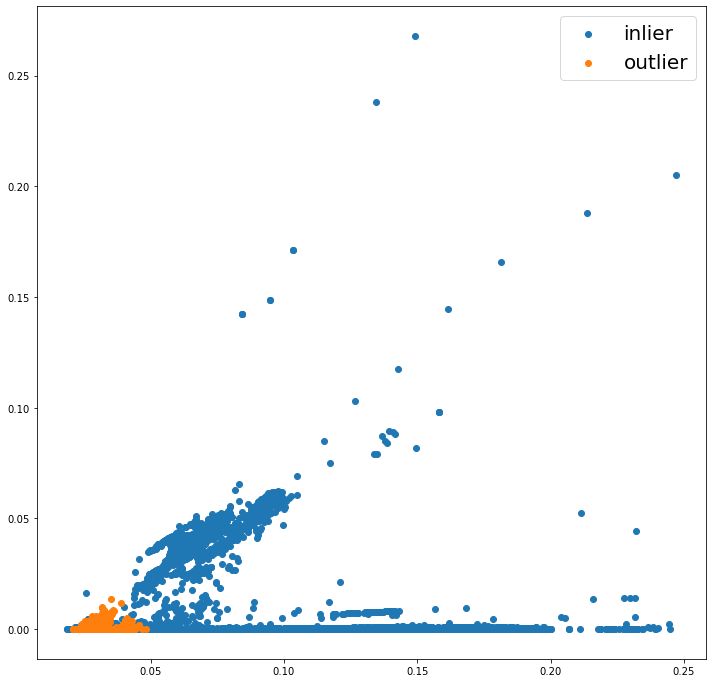

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.994     0.996     0.995     18647
           2      0.996     0.994     0.995     18647

    accuracy                          0.995     37294
   macro avg      0.995     0.995     0.995     37294
weighted avg      0.995     0.995     0.995     37294



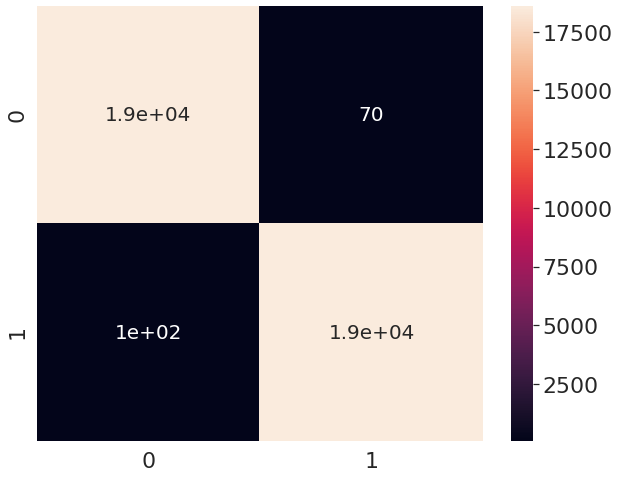

AUC score:  0.995334370139969


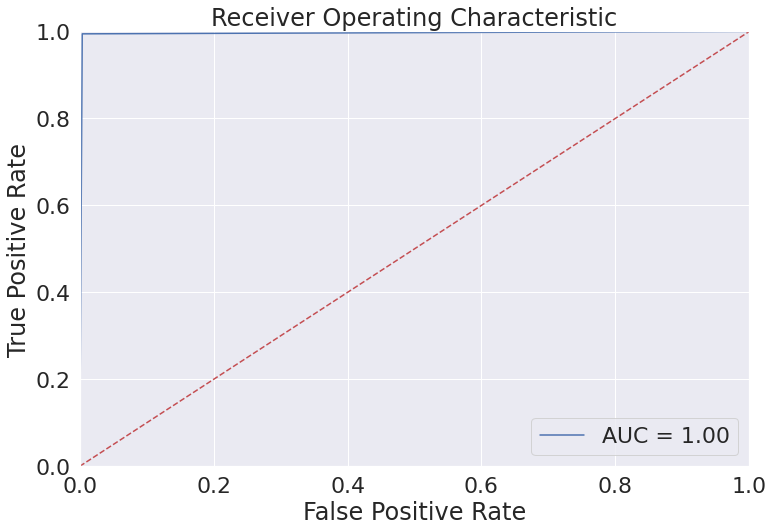

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [39]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (37294, 115) (37294,)
----------------------Test is starting----------------------
Scale data
Shape:  (37294, 115) (37294,)
Shape:  (37294, 115) (37294,)
Normalize data
Shape:  (37294, 115) (37294,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.17092228 0.30488761 0.40855549 ... 0.93196432 0.9465337  1.10293106]
Visualize quantization error


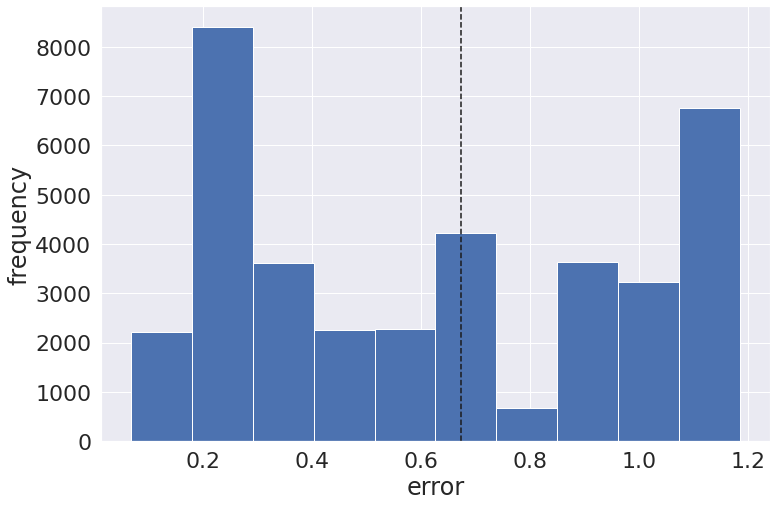

Outliers visualization


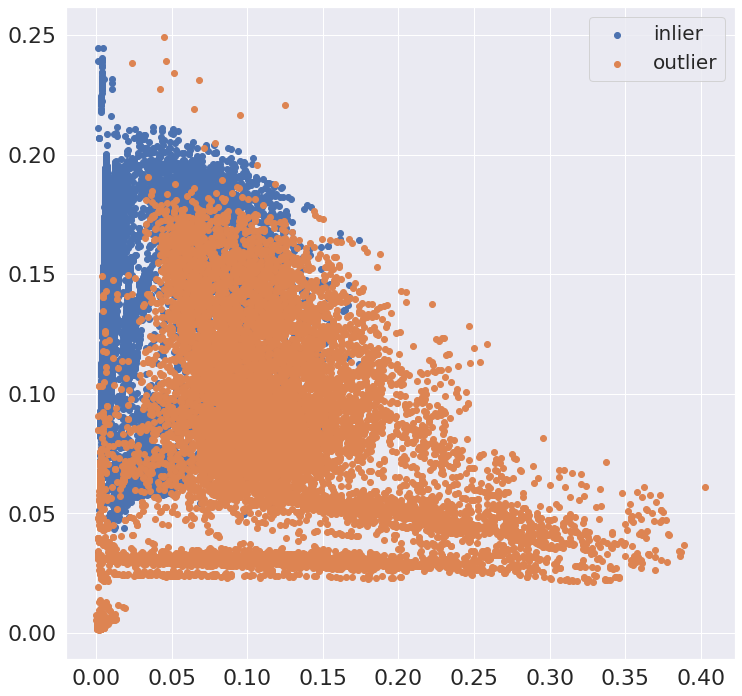

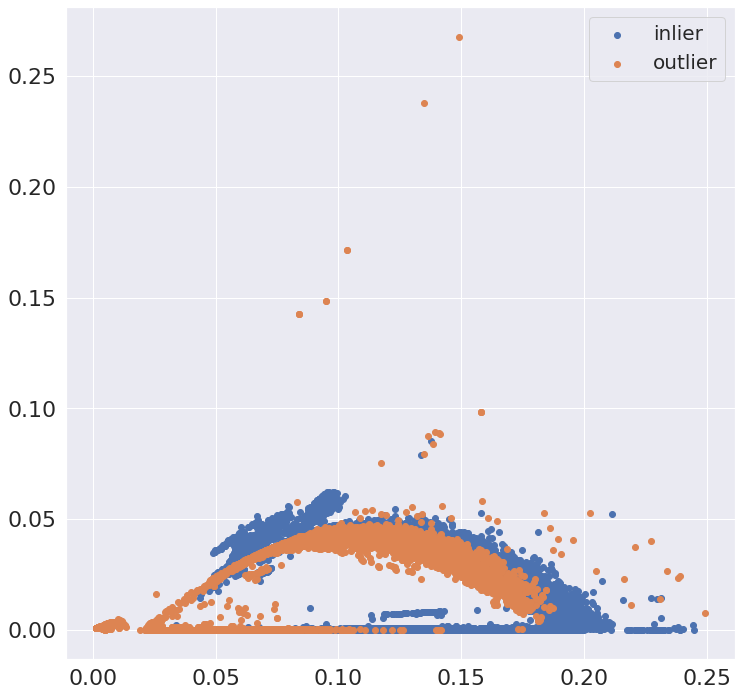

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.582     0.996     0.734     18647
           2      0.987     0.283     0.440     18647

    accuracy                          0.640     37294
   macro avg      0.784     0.640     0.587     37294
weighted avg      0.784     0.640     0.587     37294



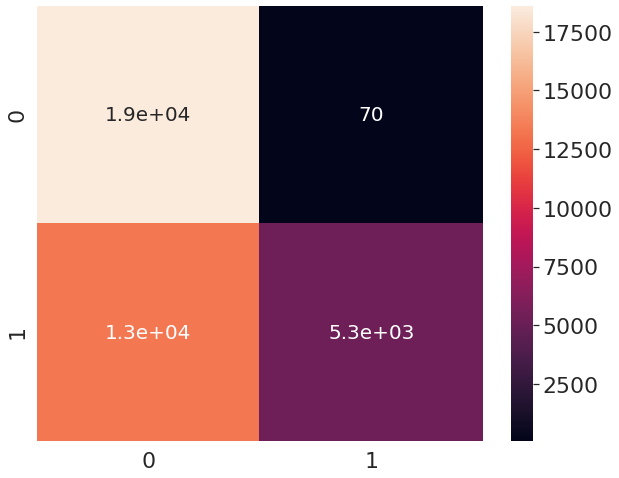

AUC score:  0.6398616399420819


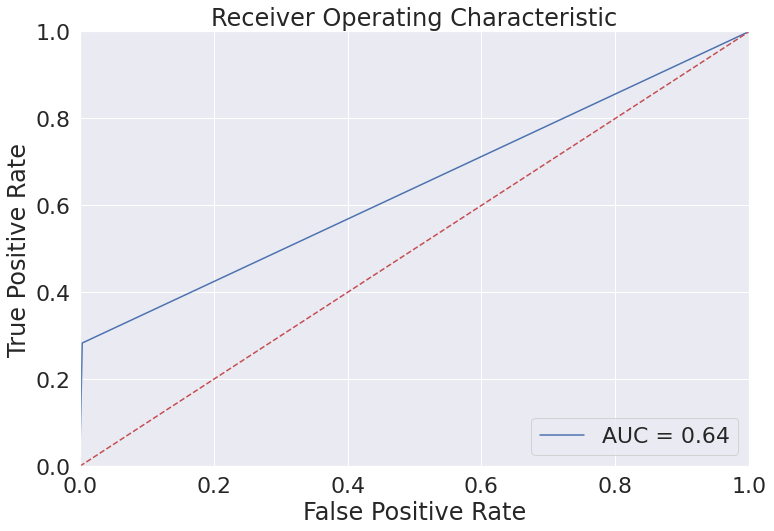

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [40]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 2) Set 22 (recommend size)

### Train

In [41]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo=None, som_x=22, som_y=22, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 1.08342144e-02  1.11059656e-01  7.57470744e-15 ...  2.62075562e-04
   7.75038876e-07  9.28901706e-03]
 [ 1.08012669e-02  1.11059656e-01  4.43278699e-18 ...  2.62488761e-04
   6.80897919e-07  8.13680098e-03]
 [ 3.64663319e-03  7.41613448e-02  3.09586504e-06 ...  0.00000000e+00
  -1.88520422e-35  0.00000000e+00]
 ...
 [ 1.14822143e-01  2.19880064e-01  1.35874582e-01 ...  2.46350400e-01
   3.16466503e-01  4.14968627e-01]
 [ 3.61899764e-03  7.40397736e-02  1.90220145e-10 ...  1.08609036e-18
  -2.78362185e-36  0.00000000e+00]
 [ 3.61899732e-03  7.40397704e-02  0.00000000e+00 ...  1.08609036e-18
   0.00000000e+00  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 4.830150127410889


### Test on the same device

#### Test on gafgyt

Shape:  (37294, 115) (37294,)
----------------------Test is starting----------------------
Scale data
Shape:  (37294, 115) (37294,)
Shape:  (37294, 115) (37294,)
Normalize data
Shape:  (37294, 115) (37294,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.12028721 0.29655992 0.25850848 ... 1.18319555 1.18319554 1.17412749]
Visualize quantization error


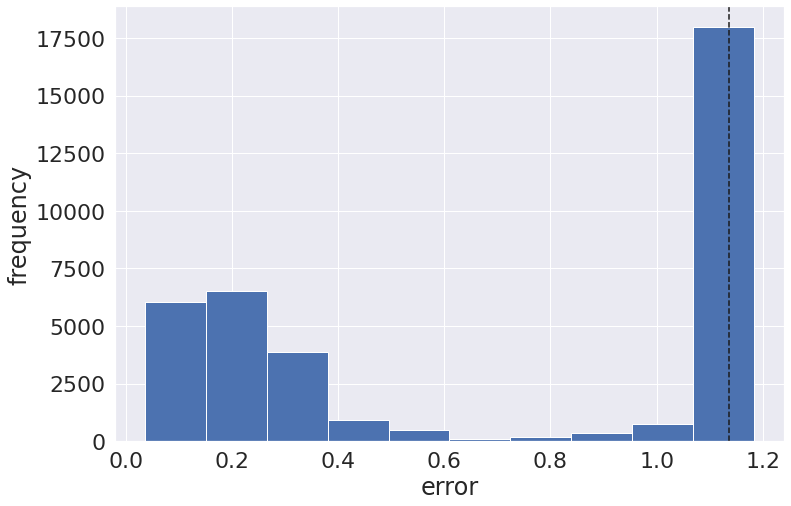

Outliers visualization


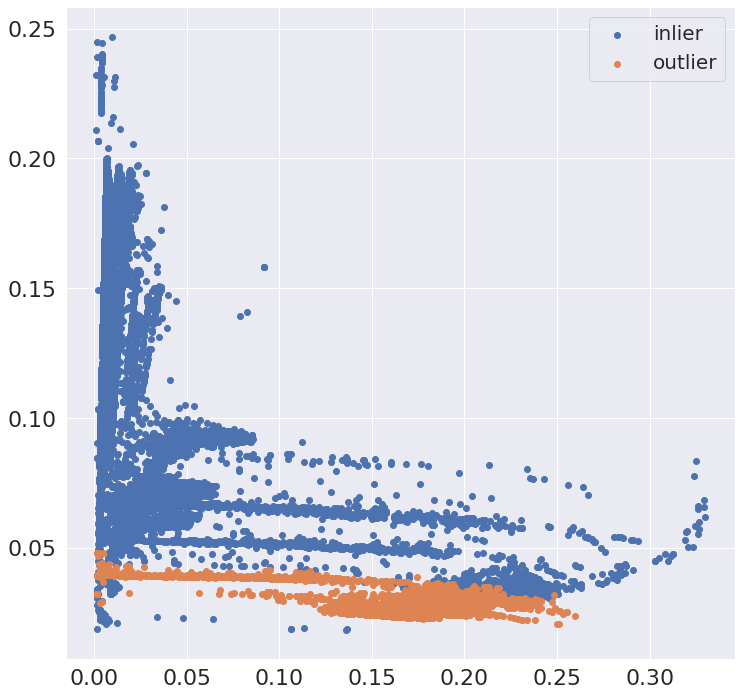

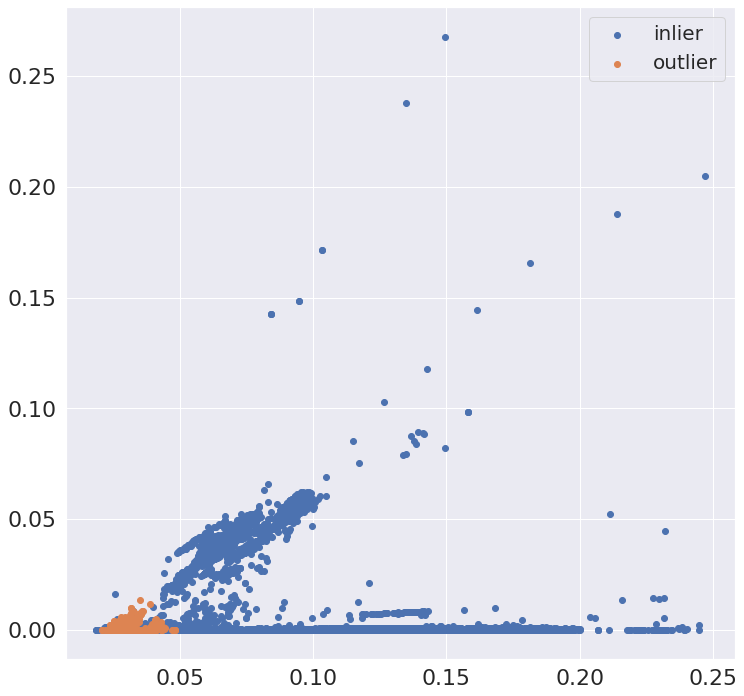

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.994     0.996     0.995     18647
           2      0.996     0.994     0.995     18647

    accuracy                          0.995     37294
   macro avg      0.995     0.995     0.995     37294
weighted avg      0.995     0.995     0.995     37294



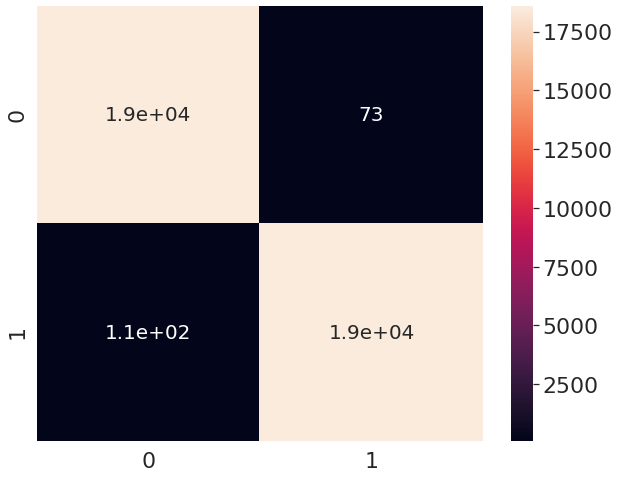

AUC score:  0.9950930444575535


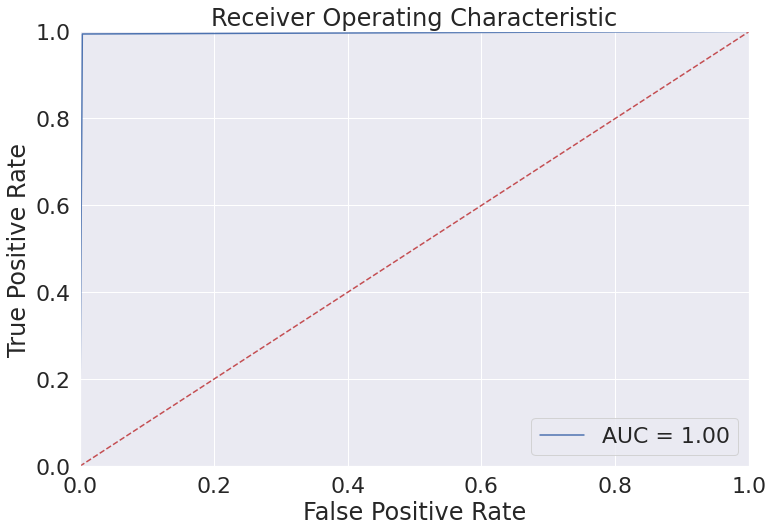

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [42]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (37294, 115) (37294,)
----------------------Test is starting----------------------
Scale data
Shape:  (37294, 115) (37294,)
Shape:  (37294, 115) (37294,)
Normalize data
Shape:  (37294, 115) (37294,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.12028721 0.29655992 0.25850848 ... 0.86169114 0.86987314 1.1057078 ]
Visualize quantization error


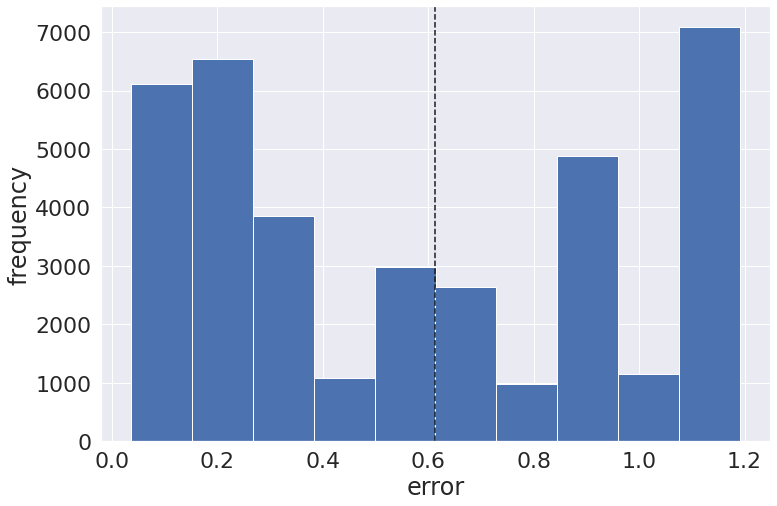

Outliers visualization


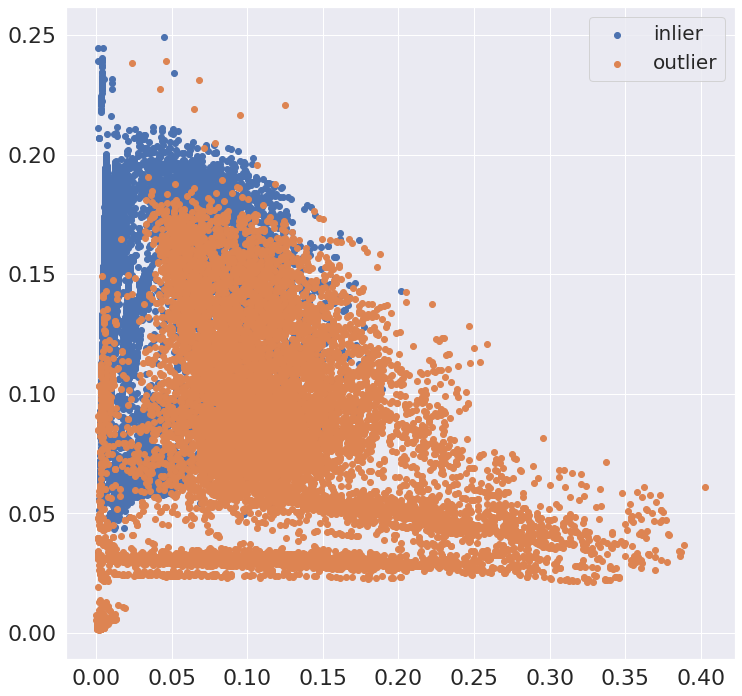

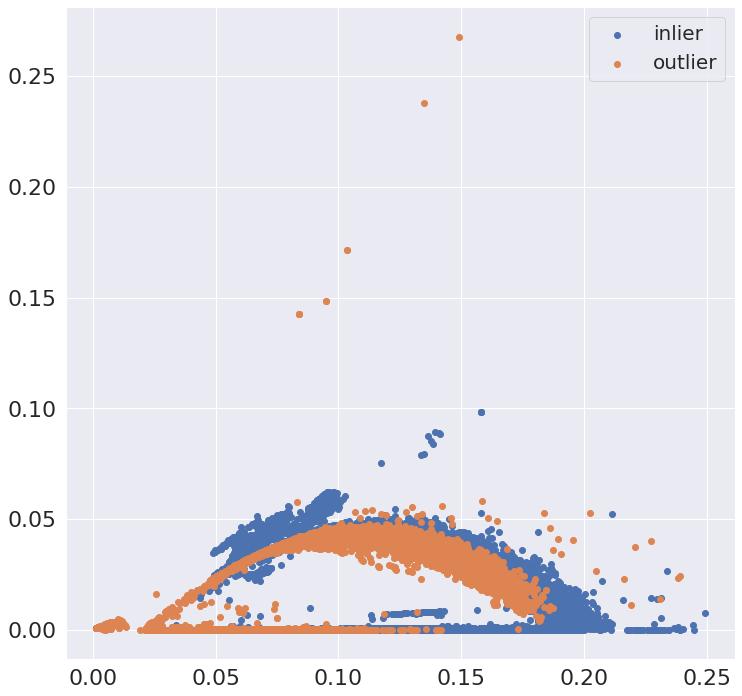

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.655     0.996     0.790     18647
           2      0.992     0.475     0.643     18647

    accuracy                          0.736     37294
   macro avg      0.823     0.736     0.717     37294
weighted avg      0.823     0.736     0.717     37294



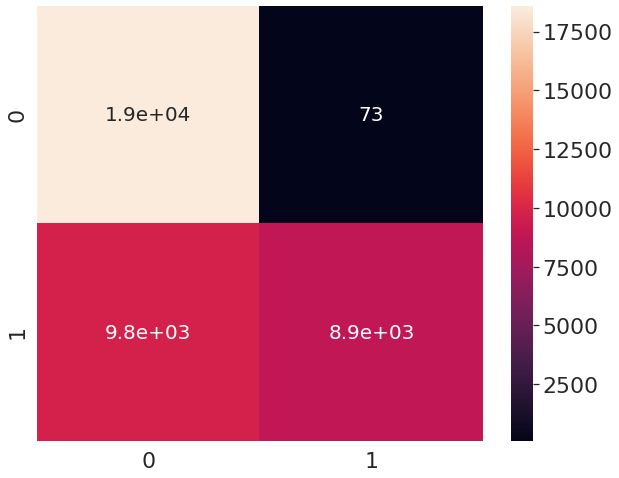

AUC score:  0.7357215637904221


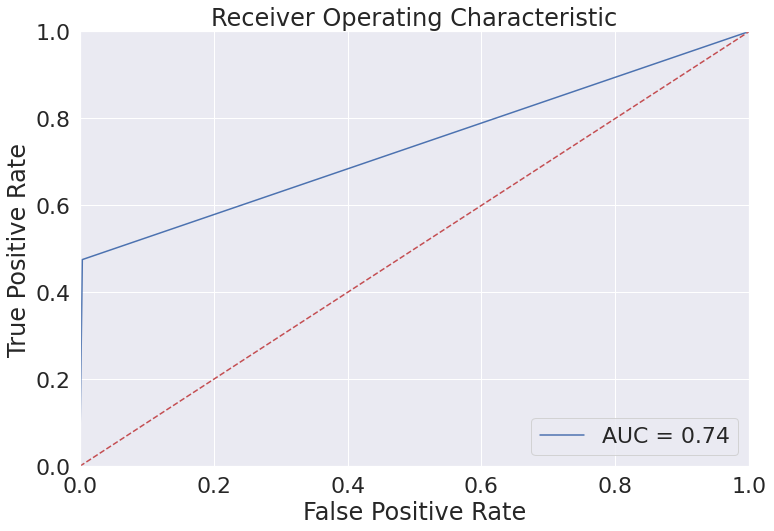

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [43]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 3) Set 30

### Train

In [44]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo=None, som_x=30, som_y=30, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 1.08342144e-02  1.11059656e-01  7.57470744e-15 ...  2.62075562e-04
   7.75038876e-07  9.28901706e-03]
 [ 1.08012669e-02  1.11059656e-01  4.43278699e-18 ...  2.62488761e-04
   6.80897919e-07  8.13680098e-03]
 [ 3.64663319e-03  7.41613448e-02  3.09586504e-06 ...  0.00000000e+00
  -1.88520422e-35  0.00000000e+00]
 ...
 [ 1.14822143e-01  2.19880064e-01  1.35874582e-01 ...  2.46350400e-01
   3.16466503e-01  4.14968627e-01]
 [ 3.61899764e-03  7.40397736e-02  1.90220145e-10 ...  1.08609036e-18
  -2.78362185e-36  0.00000000e+00]
 [ 3.61899732e-03  7.40397704e-02  0.00000000e+00 ...  1.08609036e-18
   0.00000000e+00  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 7.853622674942017


### Test on the same device

#### Test on gafgyt

Shape:  (37294, 115) (37294,)
----------------------Test is starting----------------------
Scale data
Shape:  (37294, 115) (37294,)
Shape:  (37294, 115) (37294,)
Normalize data
Shape:  (37294, 115) (37294,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.13136349 0.09263653 0.25048172 ... 1.14223548 1.14223547 1.168077  ]
Visualize quantization error


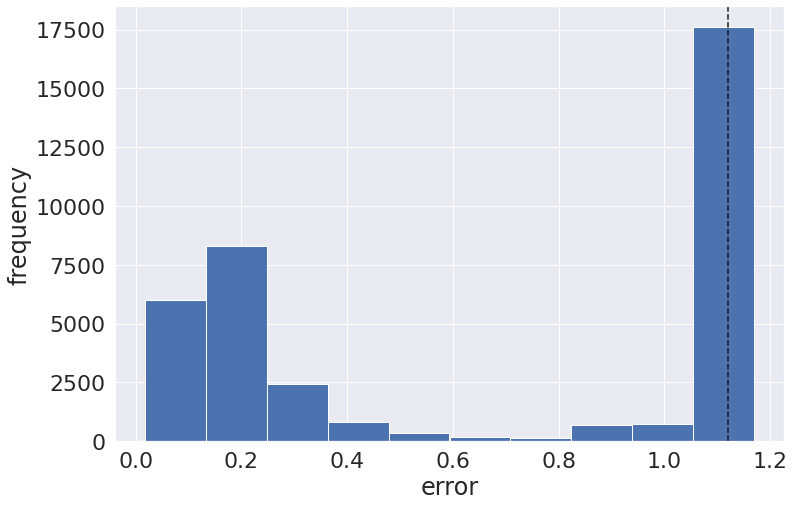

Outliers visualization


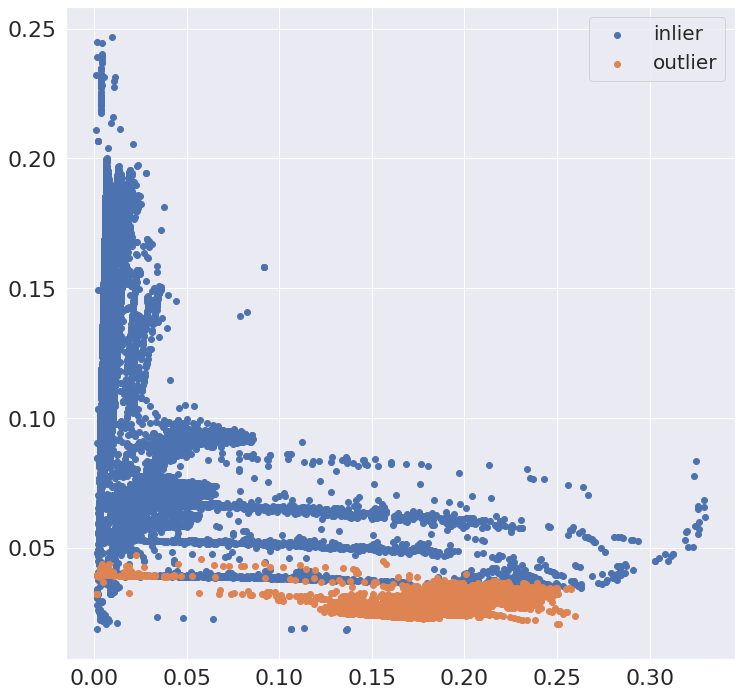

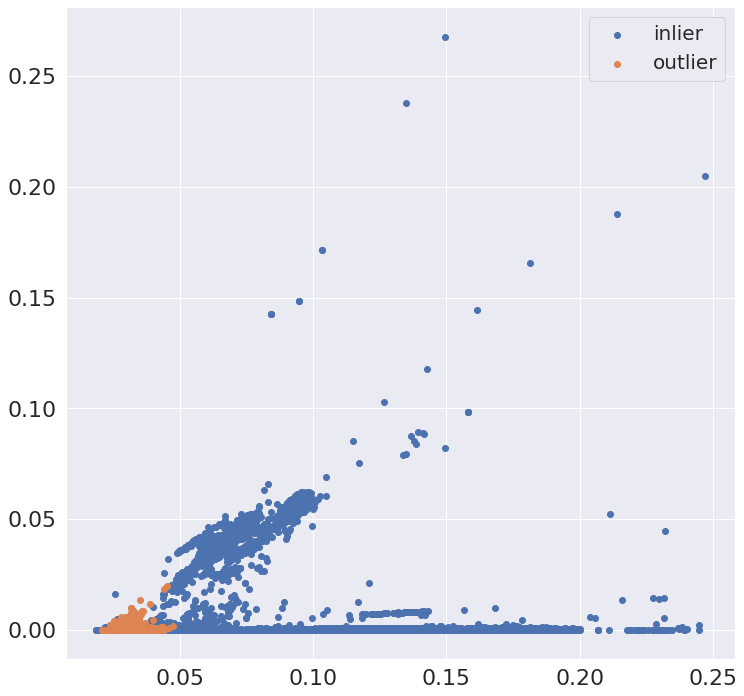

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.993     0.996     18647
           2      0.993     0.998     0.996     18647

    accuracy                          0.996     37294
   macro avg      0.996     0.996     0.996     37294
weighted avg      0.996     0.996     0.996     37294



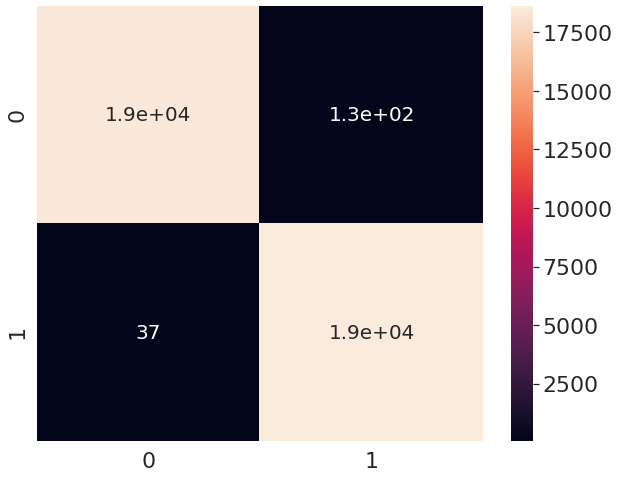

AUC score:  0.9955220678929586


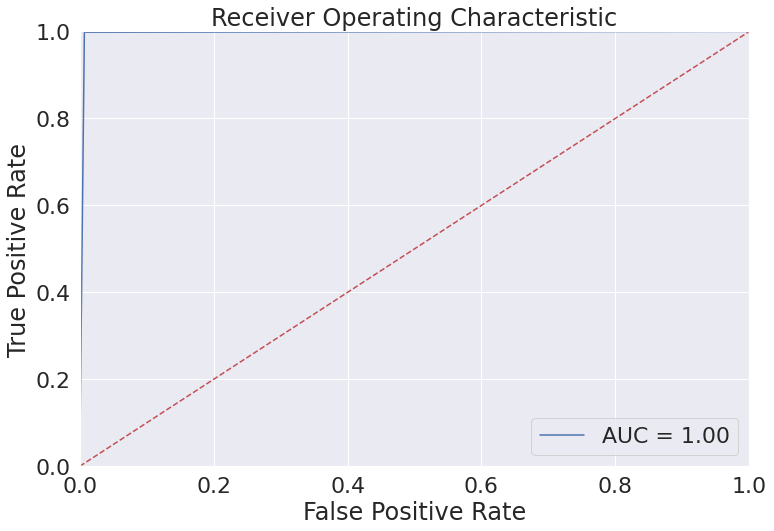

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [45]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (37294, 115) (37294,)
----------------------Test is starting----------------------
Scale data
Shape:  (37294, 115) (37294,)
Shape:  (37294, 115) (37294,)
Normalize data
Shape:  (37294, 115) (37294,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.13136349 0.09263653 0.25048172 ... 0.89226601 0.90164781 1.10882527]
Visualize quantization error


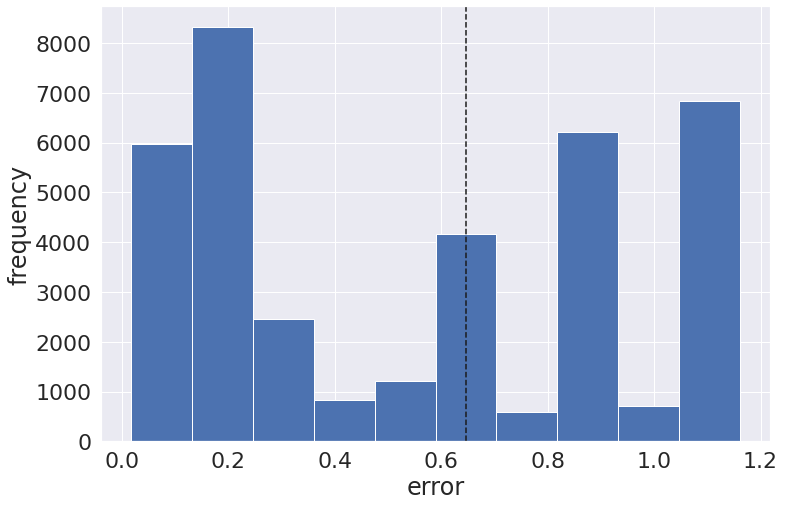

Outliers visualization


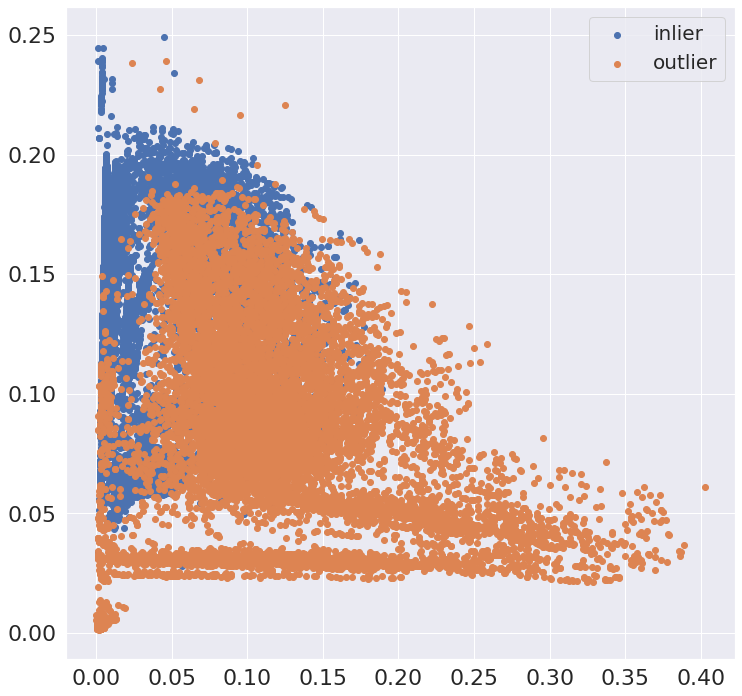

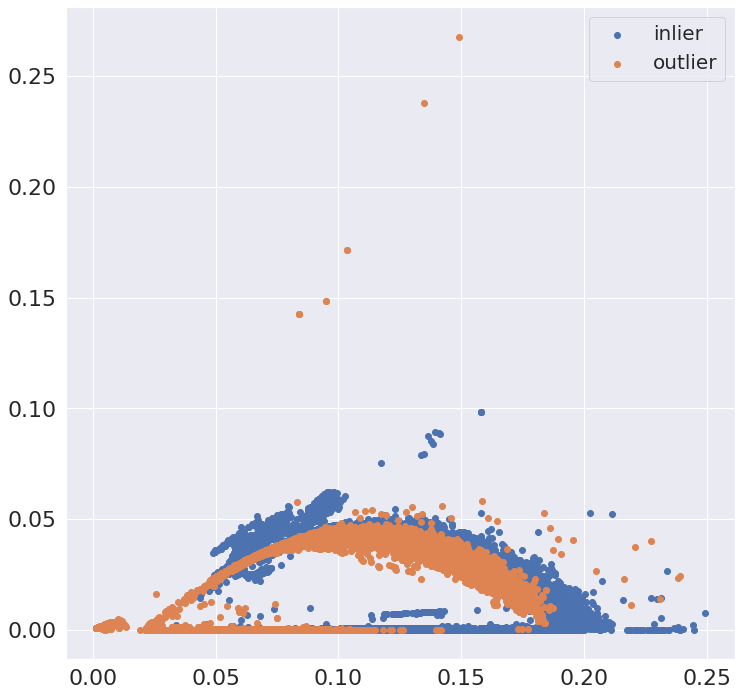

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.737     0.993     0.846     18647
           2      0.989     0.646     0.782     18647

    accuracy                          0.820     37294
   macro avg      0.863     0.820     0.814     37294
weighted avg      0.863     0.820     0.814     37294



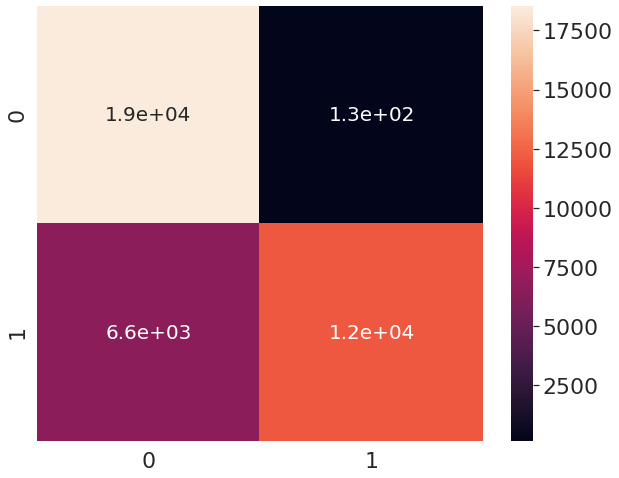

AUC score:  0.8197565292004078


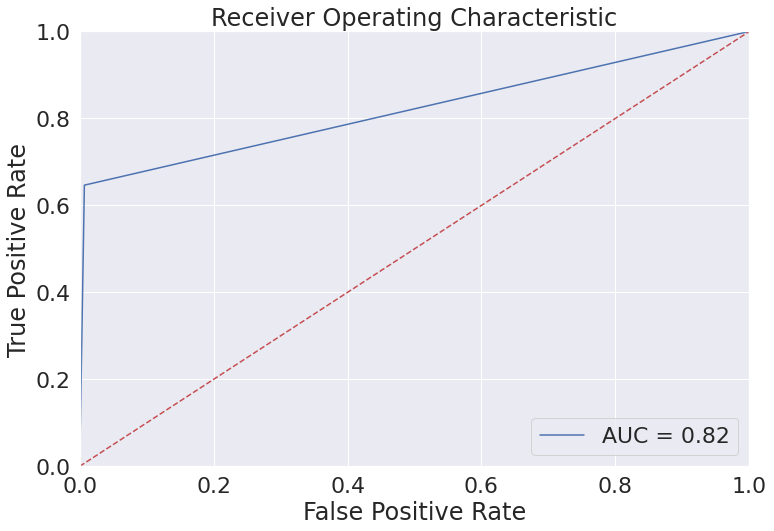

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [46]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 4) Set 45

### Train

In [47]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo=None, som_x=45, som_y=45, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 1.08342144e-02  1.11059656e-01  7.57470744e-15 ...  2.62075562e-04
   7.75038876e-07  9.28901706e-03]
 [ 1.08012669e-02  1.11059656e-01  4.43278699e-18 ...  2.62488761e-04
   6.80897919e-07  8.13680098e-03]
 [ 3.64663319e-03  7.41613448e-02  3.09586504e-06 ...  0.00000000e+00
  -1.88520422e-35  0.00000000e+00]
 ...
 [ 1.14822143e-01  2.19880064e-01  1.35874582e-01 ...  2.46350400e-01
   3.16466503e-01  4.14968627e-01]
 [ 3.61899764e-03  7.40397736e-02  1.90220145e-10 ...  1.08609036e-18
  -2.78362185e-36  0.00000000e+00]
 [ 3.61899732e-03  7.40397704e-02  0.00000000e+00 ...  1.08609036e-18
   0.00000000e+00  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 16.52383828163147


### Test on the same device

#### Test on gafgyt

Shape:  (37294, 115) (37294,)
----------------------Test is starting----------------------
Scale data
Shape:  (37294, 115) (37294,)
Shape:  (37294, 115) (37294,)
Normalize data
Shape:  (37294, 115) (37294,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.12271147 0.15573316 0.12679602 ... 1.10927031 1.1092703  1.1649286 ]
Visualize quantization error


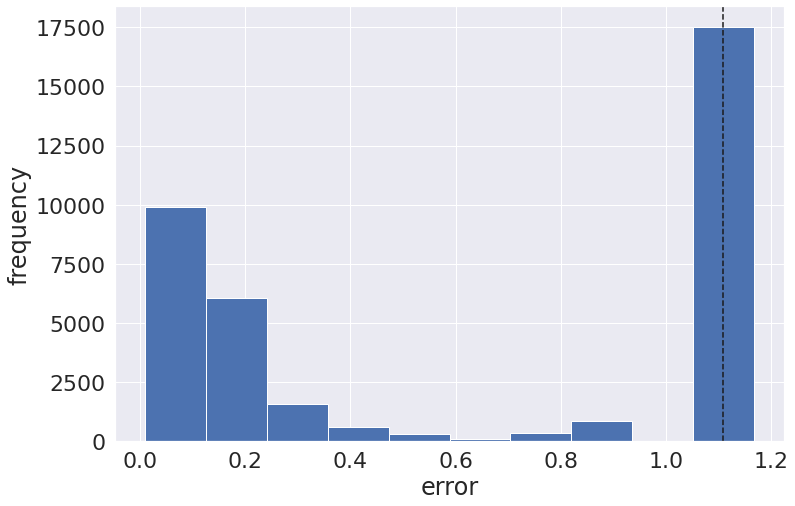

Outliers visualization


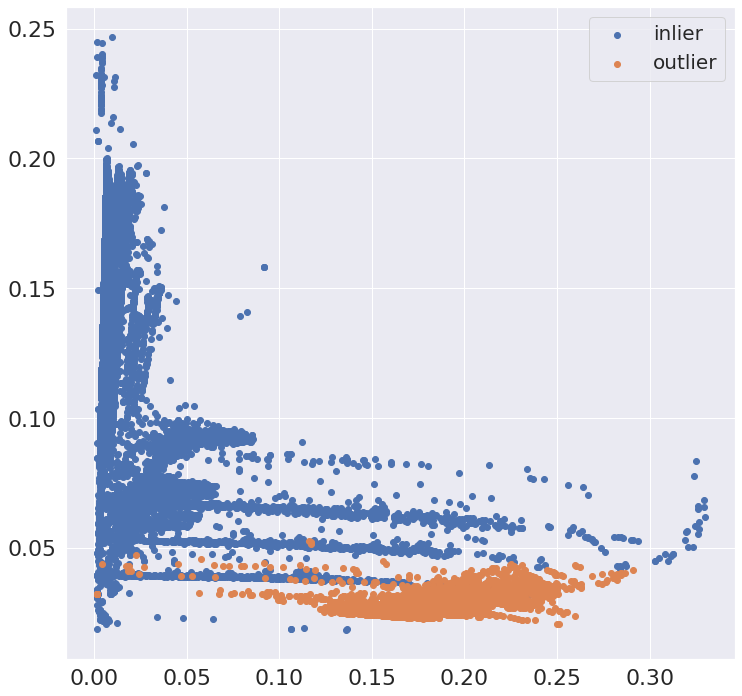

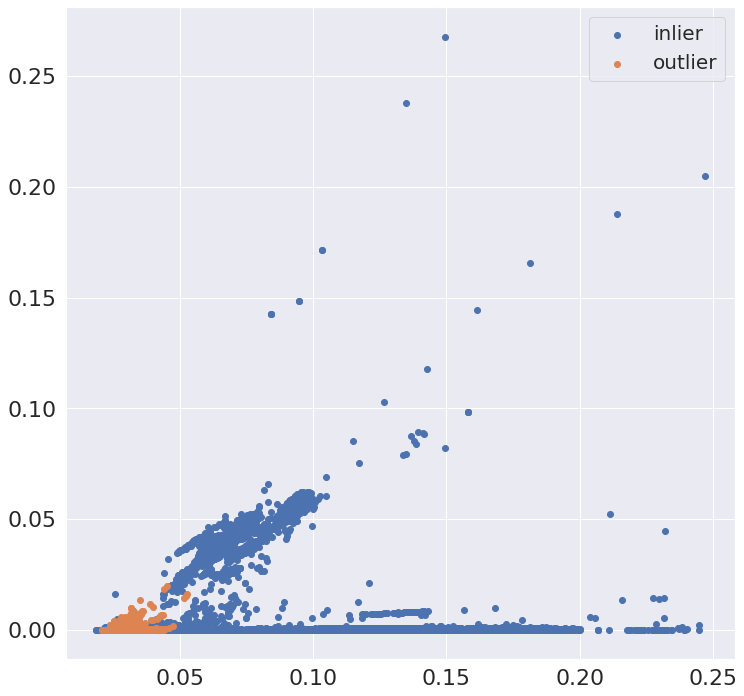

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.999     0.996     0.997     18647
           2      0.996     0.999     0.997     18647

    accuracy                          0.997     37294
   macro avg      0.997     0.997     0.997     37294
weighted avg      0.997     0.997     0.997     37294



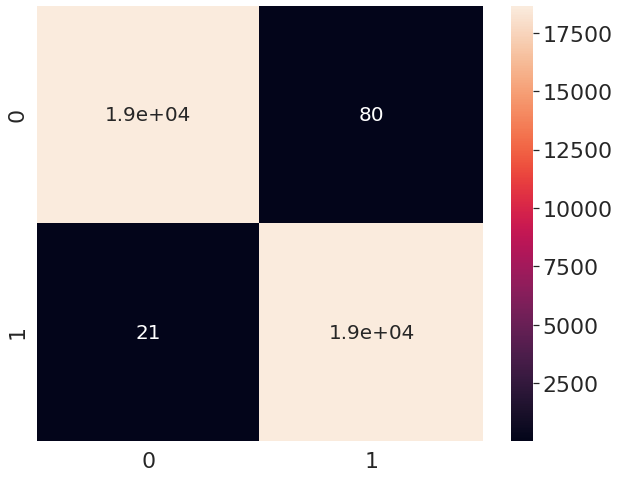

AUC score:  0.9972917895640049


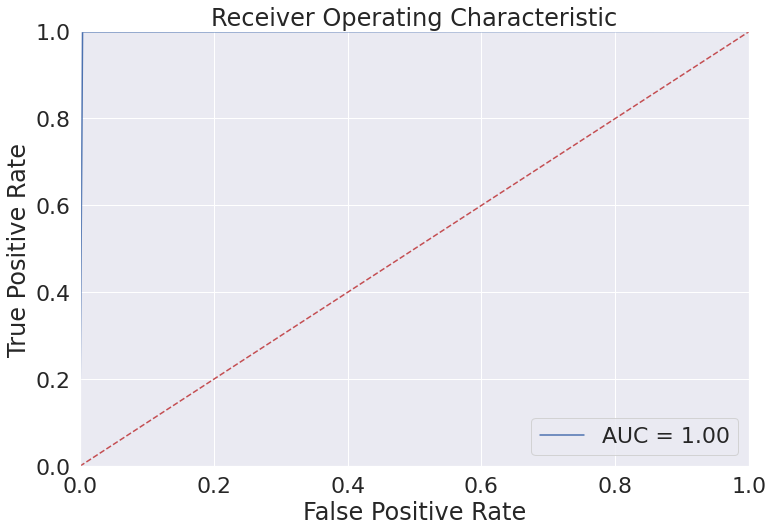

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [48]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (37294, 115) (37294,)
----------------------Test is starting----------------------
Scale data
Shape:  (37294, 115) (37294,)
Shape:  (37294, 115) (37294,)
Normalize data
Shape:  (37294, 115) (37294,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.12271147 0.15573316 0.12679602 ... 0.81514059 0.81855057 1.11152113]
Visualize quantization error


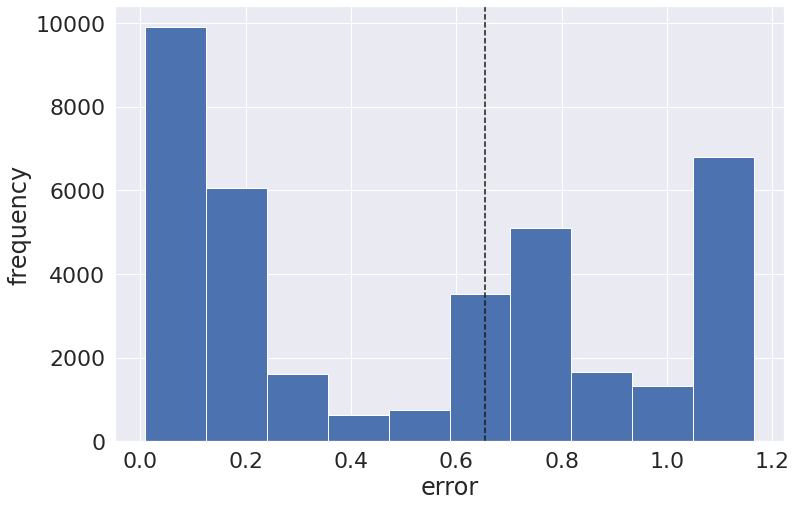

Outliers visualization


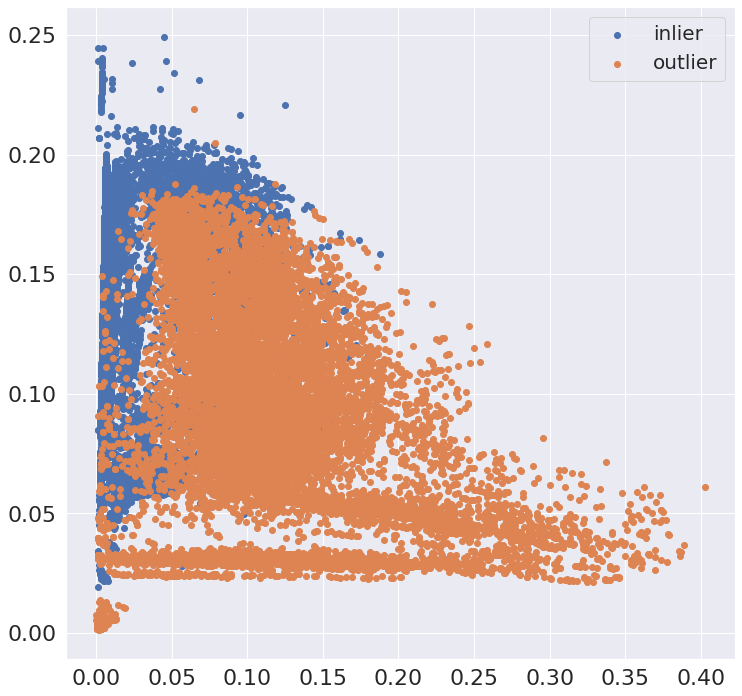

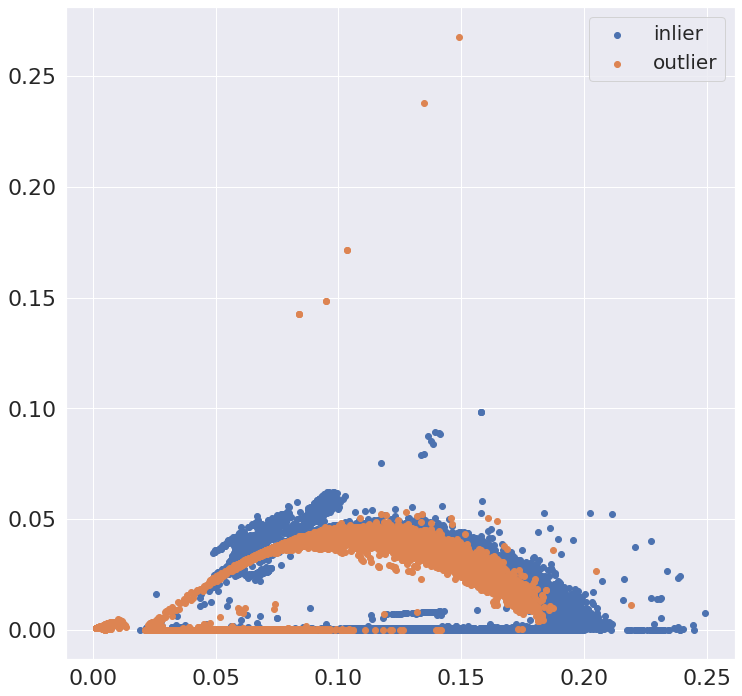

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.615     0.996     0.761     18647
           2      0.989     0.378     0.547     18647

    accuracy                          0.687     37294
   macro avg      0.802     0.687     0.654     37294
weighted avg      0.802     0.687     0.654     37294



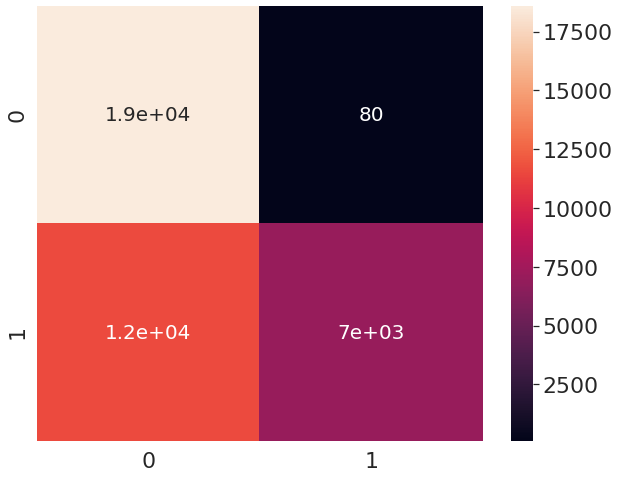

AUC score:  0.6867056362953826


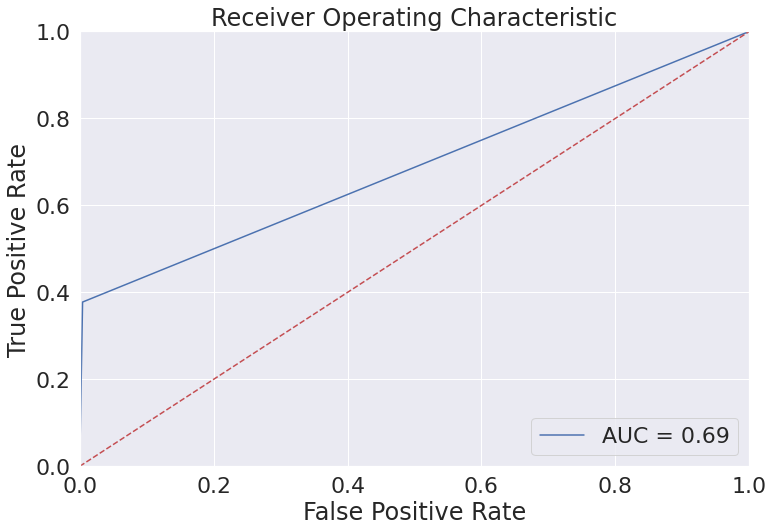

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [49]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)


### 1) Algo tpe

### Train

In [50]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo='tpe', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 1.08342144e-02  1.11059656e-01  7.57470744e-15 ...  2.62075562e-04
   7.75038876e-07  9.28901706e-03]
 [ 1.08012669e-02  1.11059656e-01  4.43278699e-18 ...  2.62488761e-04
   6.80897919e-07  8.13680098e-03]
 [ 3.64663319e-03  7.41613448e-02  3.09586504e-06 ...  0.00000000e+00
  -1.88520422e-35  0.00000000e+00]
 ...
 [ 1.14822143e-01  2.19880064e-01  1.35874582e-01 ...  2.46350400e-01
   3.16466503e-01  4.14968627e-01]
 [ 3.61899764e-03  7.40397736e-02  1.90220145e-10 ...  1.08609036e-18
  -2.78362185e-36  0.00000000e+00]
 [ 3.61899732e-03  7.40397704e-02  0.00000000e+00 ...  1.08609036e-18
   0.00000000e+00  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 86.10462403297424


### Test on the same device

#### Test on gafgyt

Shape:  (37294, 115) (37294,)
----------------------Test is starting----------------------
Scale data
Shape:  (37294, 115) (37294,)
Shape:  (37294, 115) (37294,)
Normalize data
Shape:  (37294, 115) (37294,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.10118291 0.12079786 0.25917326 ... 1.17236034 1.17236033 1.17194013]
Visualize quantization error


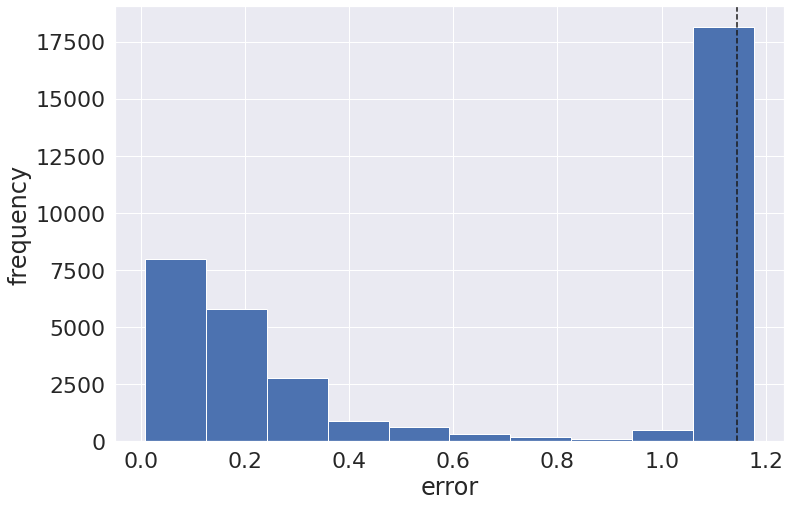

Outliers visualization


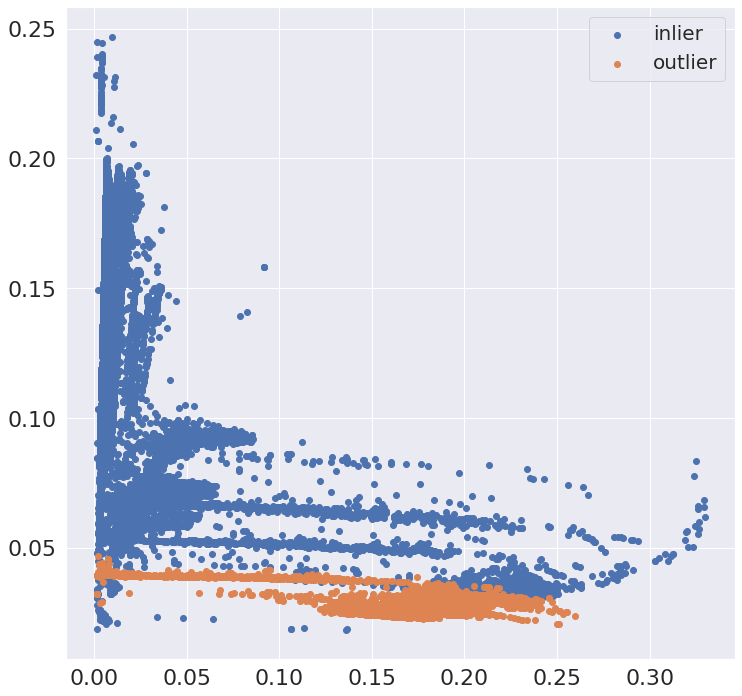

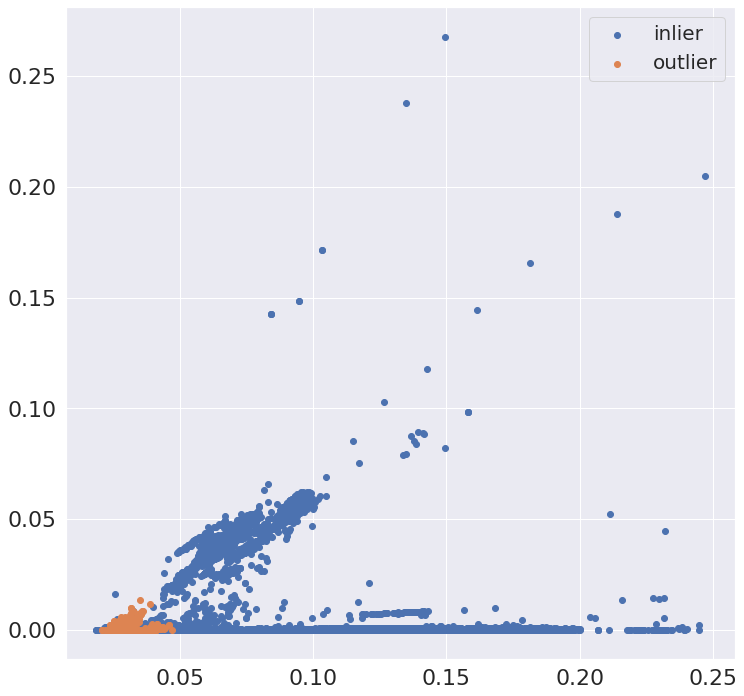

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.996     0.997     18647
           2      0.996     0.998     0.997     18647

    accuracy                          0.997     37294
   macro avg      0.997     0.997     0.997     37294
weighted avg      0.997     0.997     0.997     37294



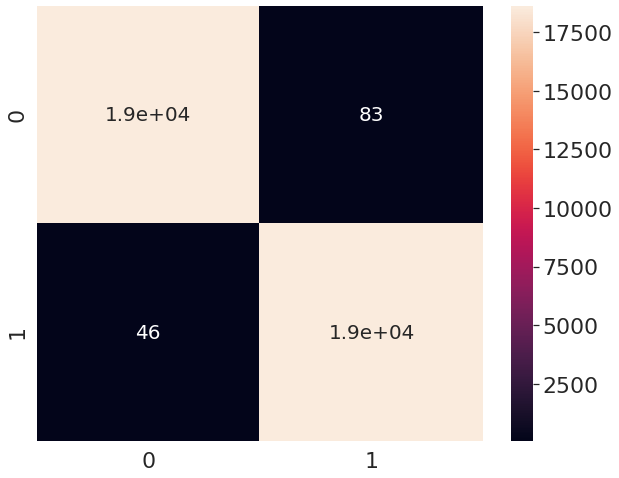

AUC score:  0.9965409985520458


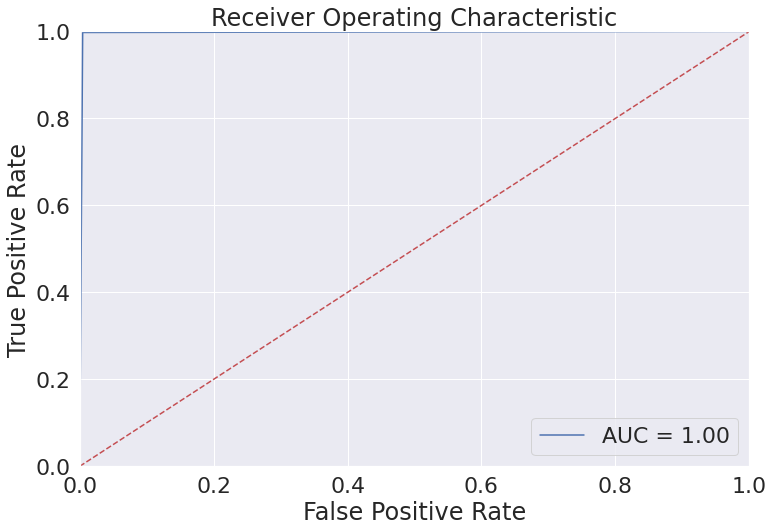

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [51]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (37294, 115) (37294,)
----------------------Test is starting----------------------
Scale data
Shape:  (37294, 115) (37294,)
Shape:  (37294, 115) (37294,)
Normalize data
Shape:  (37294, 115) (37294,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.10118291 0.12079786 0.25917326 ... 0.88283493 0.89177229 1.11057729]
Visualize quantization error


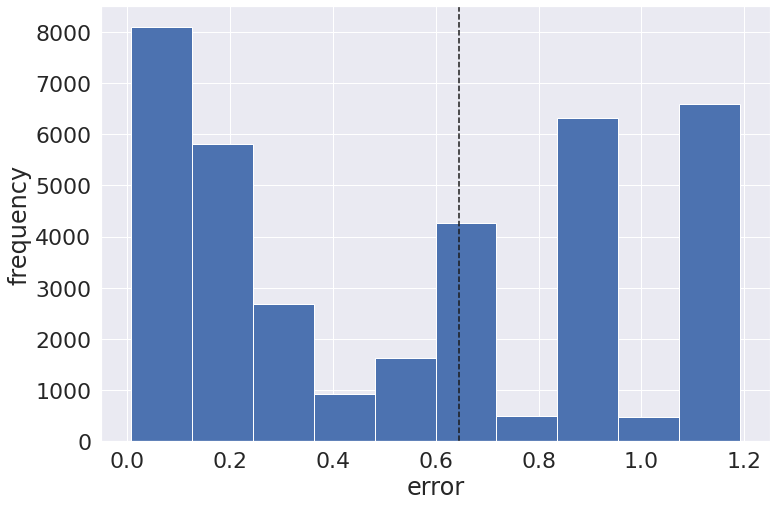

Outliers visualization


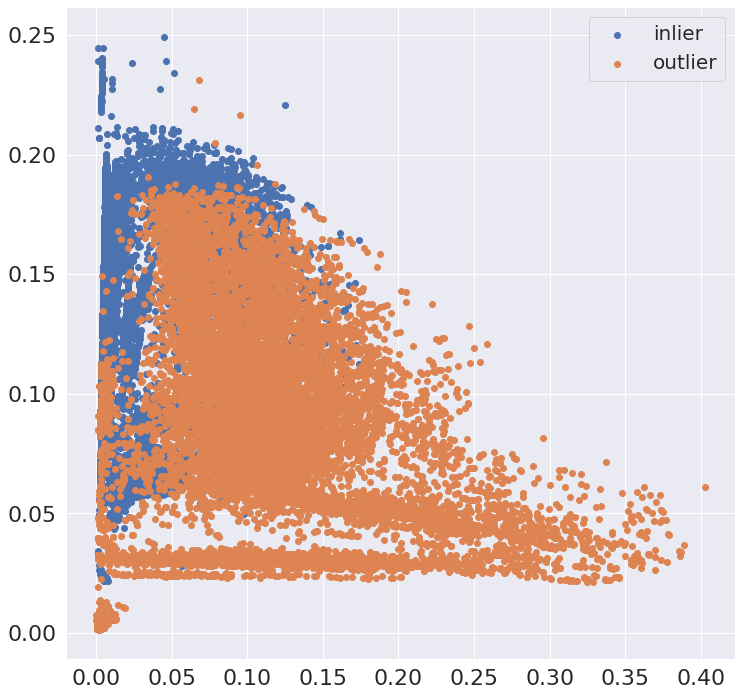

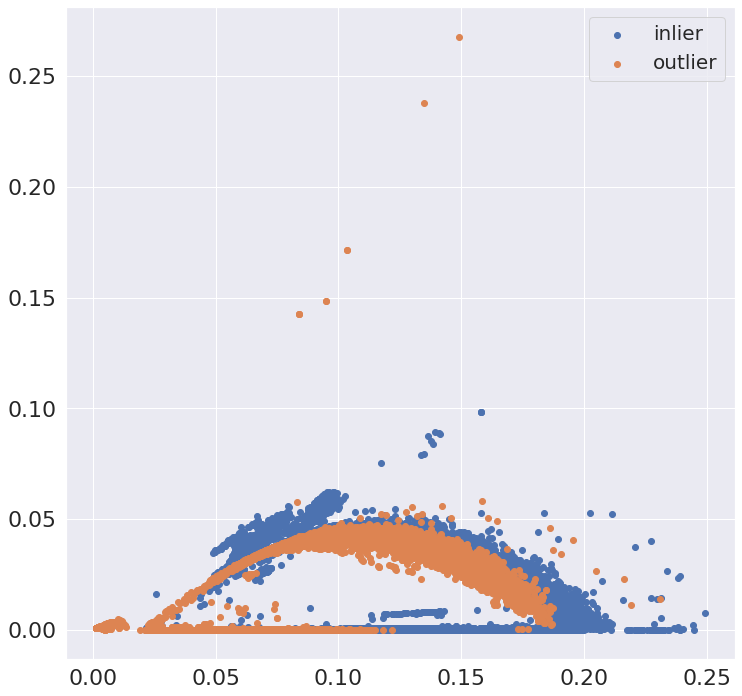

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.739     0.996     0.849     18647
           2      0.993     0.649     0.785     18647

    accuracy                          0.822     37294
   macro avg      0.866     0.822     0.817     37294
weighted avg      0.866     0.822     0.817     37294



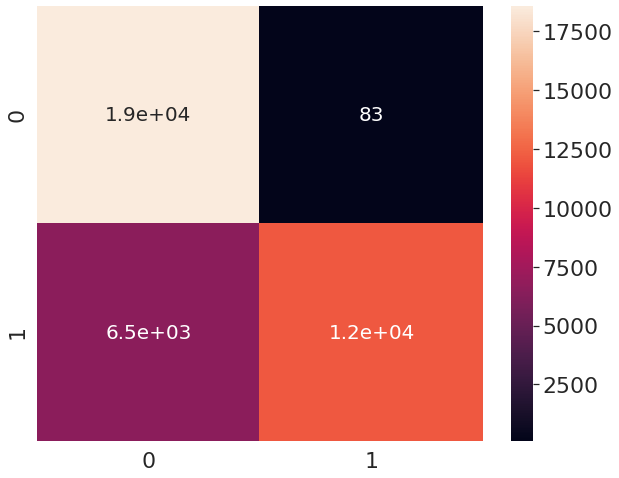

AUC score:  0.8223306698128384


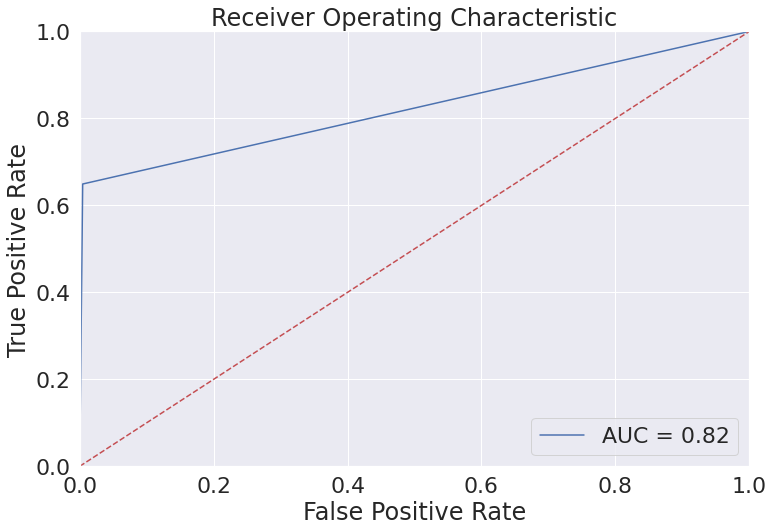

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [52]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 2) Algo rand

### Train

In [53]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo='rand', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 1.08342144e-02  1.11059656e-01  7.57470744e-15 ...  2.62075562e-04
   7.75038876e-07  9.28901706e-03]
 [ 1.08012669e-02  1.11059656e-01  4.43278699e-18 ...  2.62488761e-04
   6.80897919e-07  8.13680098e-03]
 [ 3.64663319e-03  7.41613448e-02  3.09586504e-06 ...  0.00000000e+00
  -1.88520422e-35  0.00000000e+00]
 ...
 [ 1.14822143e-01  2.19880064e-01  1.35874582e-01 ...  2.46350400e-01
   3.16466503e-01  4.14968627e-01]
 [ 3.61899764e-03  7.40397736e-02  1.90220145e-10 ...  1.08609036e-18
  -2.78362185e-36  0.00000000e+00]
 [ 3.61899732e-03  7.40397704e-02  0.00000000e+00 ...  1.08609036e-18
   0.00000000e+00  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 76.14158701896667


### Test Gafgyt

Shape:  (37294, 115) (37294,)
----------------------Test is starting----------------------
Scale data
Shape:  (37294, 115) (37294,)
Shape:  (37294, 115) (37294,)
Normalize data
Shape:  (37294, 115) (37294,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.14393033 0.21014939 0.26523987 ... 1.15097674 1.15097673 1.14865979]
Visualize quantization error


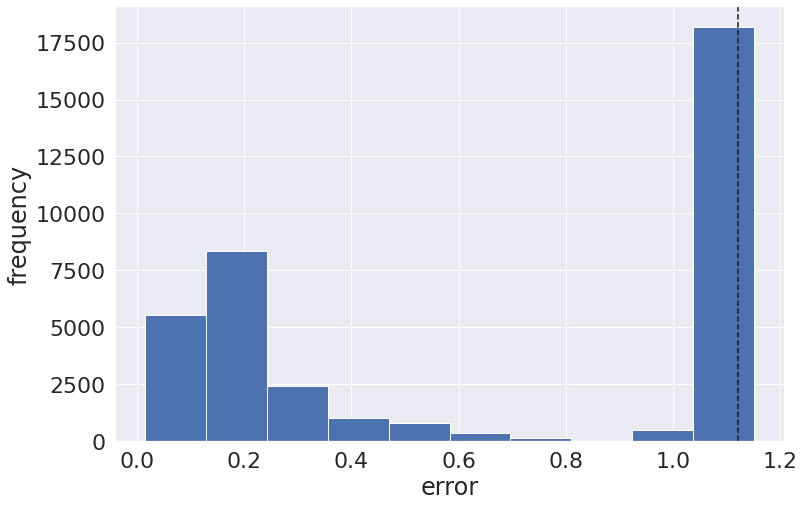

Outliers visualization


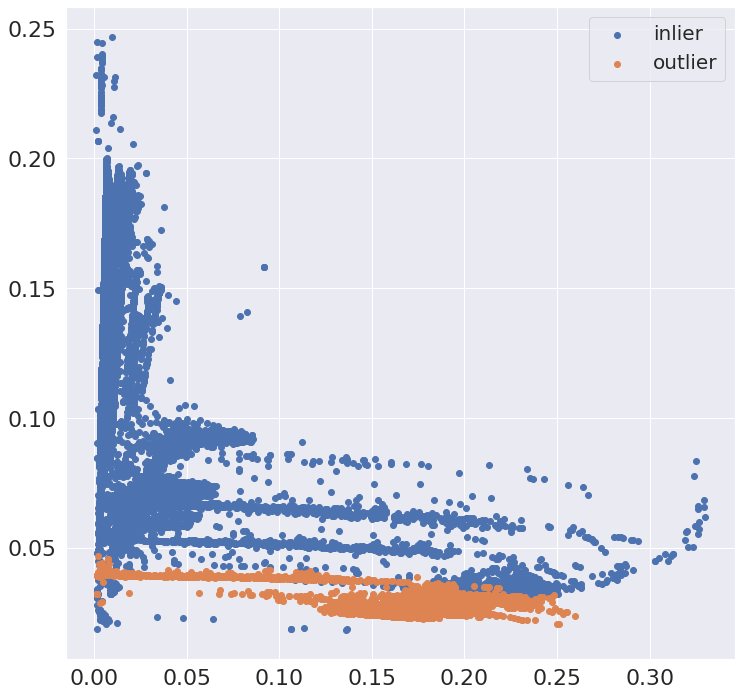

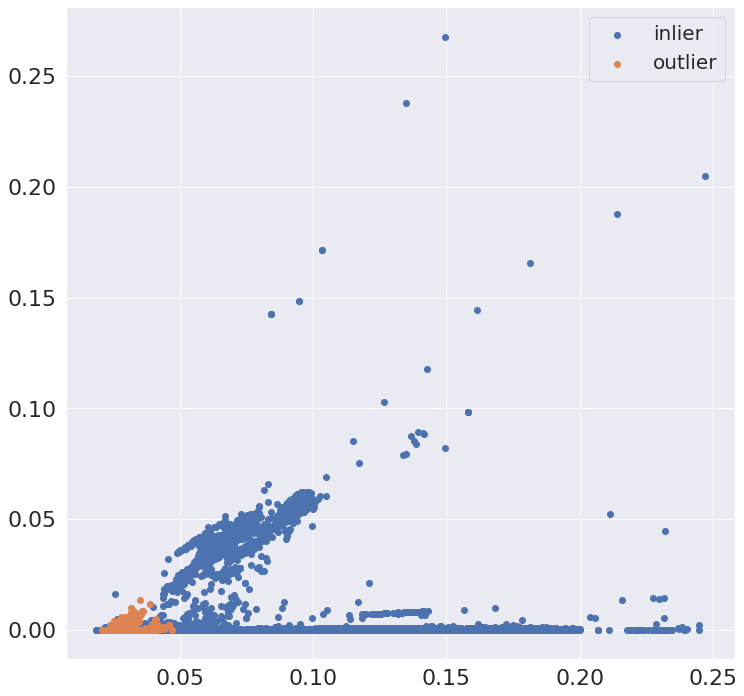

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.997     0.998     18647
           2      0.997     0.998     0.998     18647

    accuracy                          0.998     37294
   macro avg      0.998     0.998     0.998     37294
weighted avg      0.998     0.998     0.998     37294



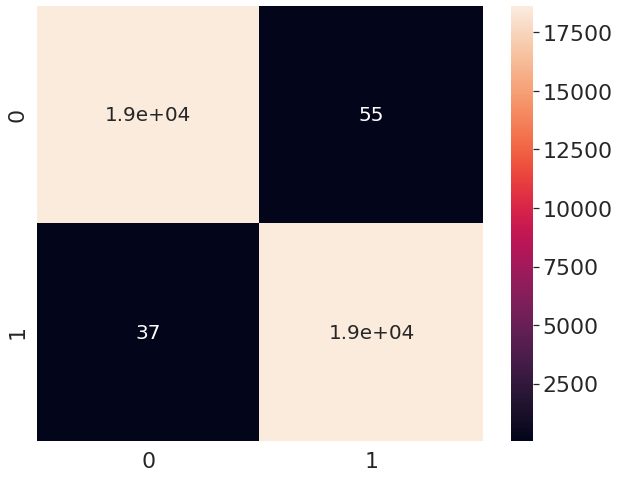

AUC score:  0.9975331152464203


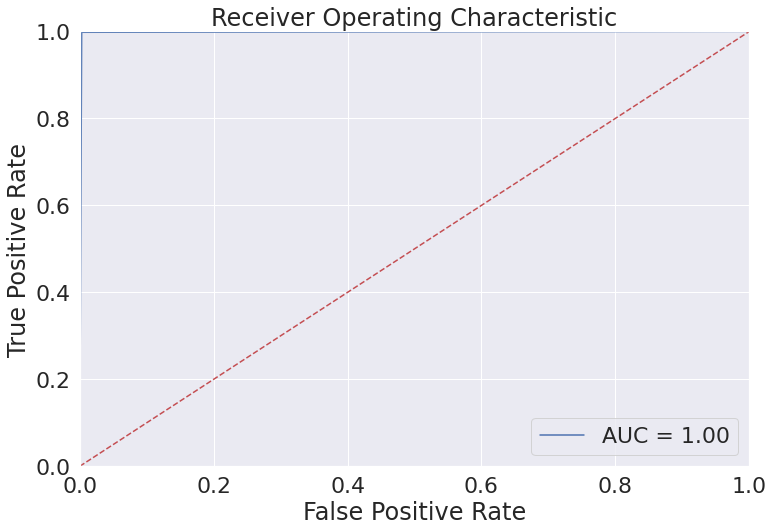

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [54]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

### Test Mirai

Shape:  (37294, 115) (37294,)
----------------------Test is starting----------------------
Scale data
Shape:  (37294, 115) (37294,)
Shape:  (37294, 115) (37294,)
Normalize data
Shape:  (37294, 115) (37294,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.14393033 0.21014939 0.26523987 ... 0.88820931 0.89435028 1.0882003 ]
Visualize quantization error


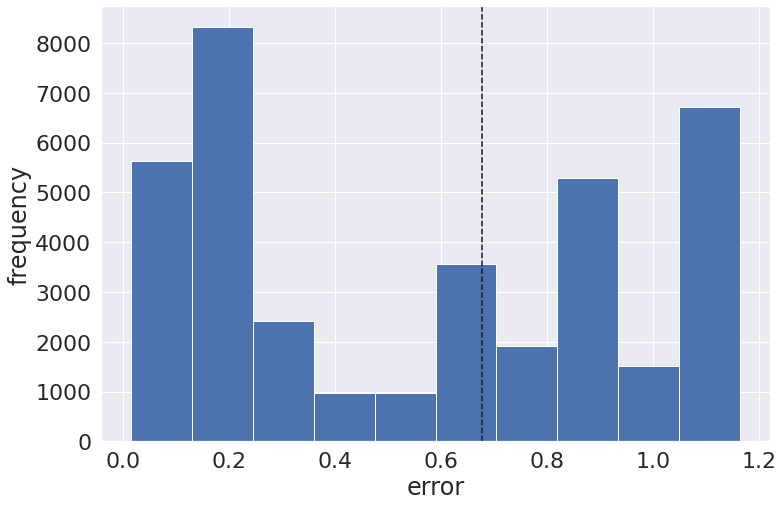

Outliers visualization


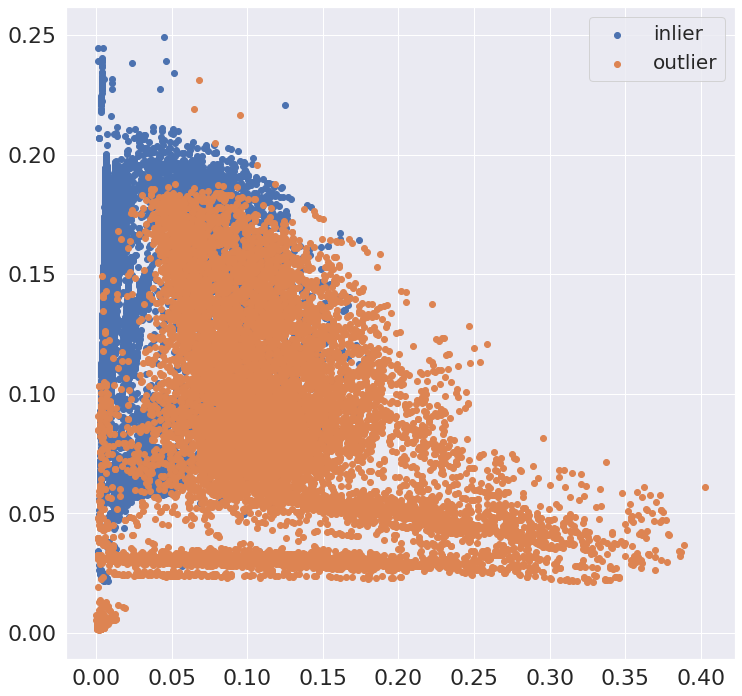

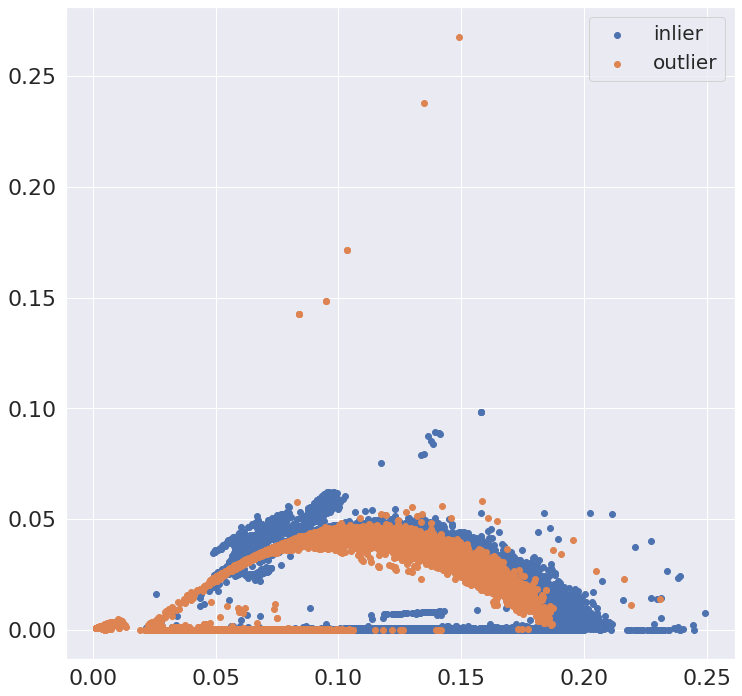

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.613     0.997     0.760     18647
           2      0.992     0.372     0.541     18647

    accuracy                          0.684     37294
   macro avg      0.803     0.684     0.650     37294
weighted avg      0.803     0.684     0.650     37294



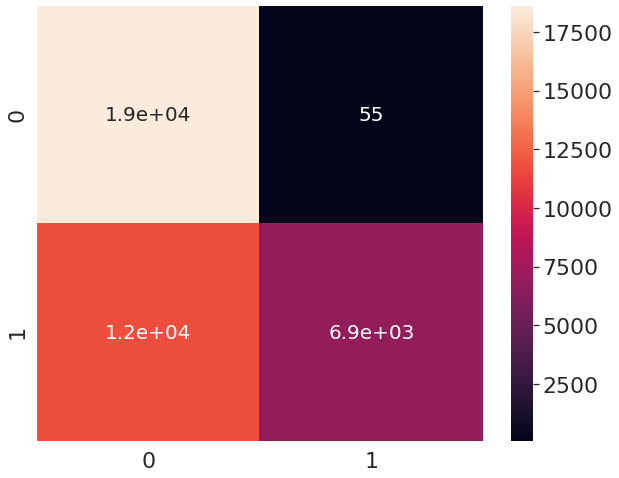

AUC score:  0.6843728213653673


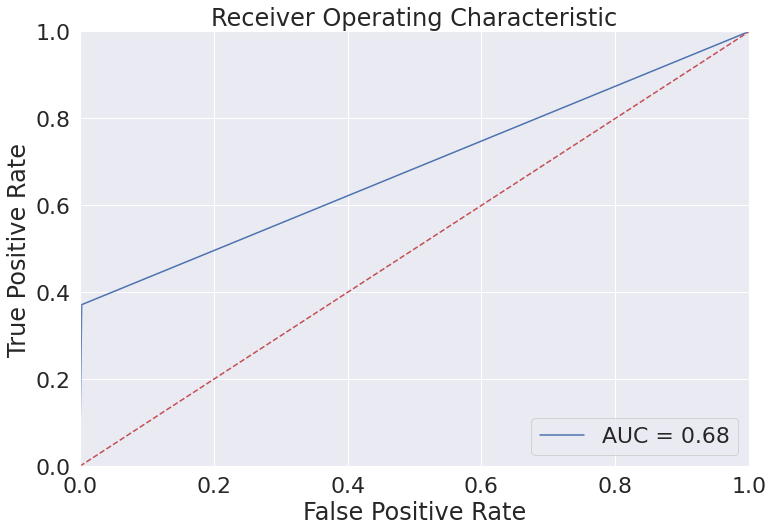

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [55]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 3) Algo atpe

In [56]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo='atpe', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 1.08342144e-02  1.11059656e-01  7.57470744e-15 ...  2.62075562e-04
   7.75038876e-07  9.28901706e-03]
 [ 1.08012669e-02  1.11059656e-01  4.43278699e-18 ...  2.62488761e-04
   6.80897919e-07  8.13680098e-03]
 [ 3.64663319e-03  7.41613448e-02  3.09586504e-06 ...  0.00000000e+00
  -1.88520422e-35  0.00000000e+00]
 ...
 [ 1.14822143e-01  2.19880064e-01  1.35874582e-01 ...  2.46350400e-01
   3.16466503e-01  4.14968627e-01]
 [ 3.61899764e-03  7.40397736e-02  1.90220145e-10 ...  1.08609036e-18
  -2.78362185e-36  0.00000000e+00]
 [ 3.61899732e-03  7.40397704e-02  0.00000000e+00 ...  1.08609036e-18
   0.00000000e+00  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

Shape:  (37294, 115) (37294,)
----------------------Test is starting----------------------
Scale data
Shape:  (37294, 115) (37294,)
Shape:  (37294, 115) (37294,)
Normalize data
Shape:  (37294, 115) (37294,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.09841514 0.16482725 0.25015541 ... 0.08699716 0.08699715 1.10404426]
Visualize quantization error


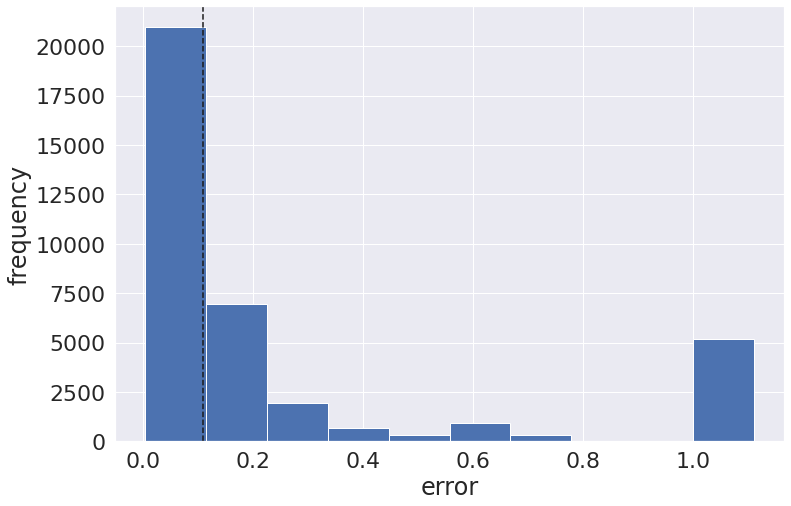

Outliers visualization


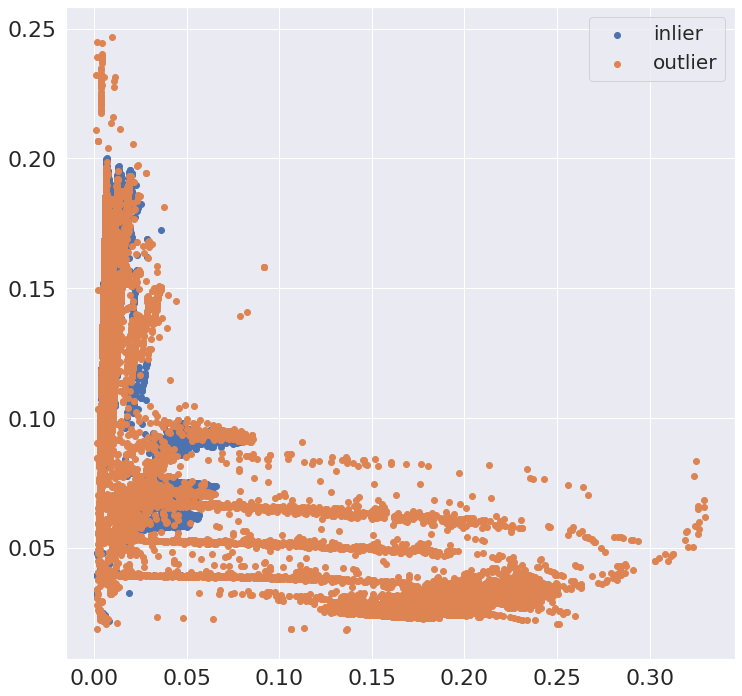

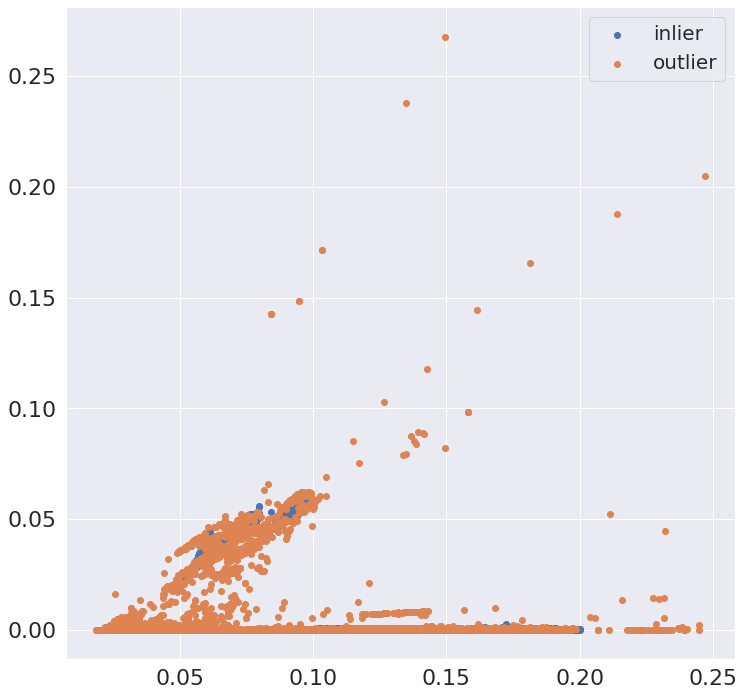

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.997     0.998     18647
           2      0.997     0.998     0.998     18647

    accuracy                          0.998     37294
   macro avg      0.998     0.998     0.998     37294
weighted avg      0.998     0.998     0.998     37294



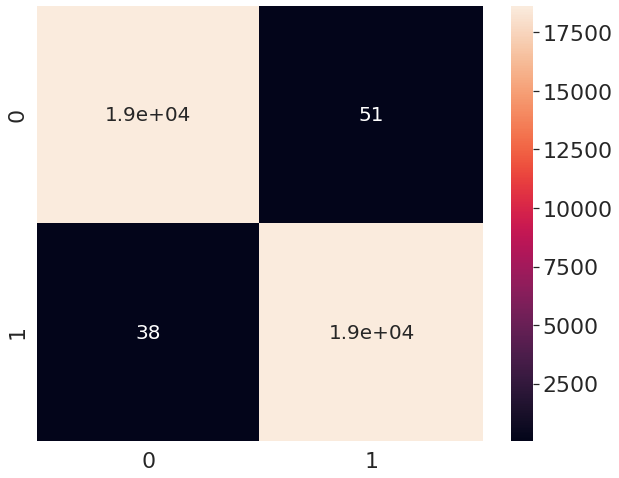

AUC score:  0.9976135571405588


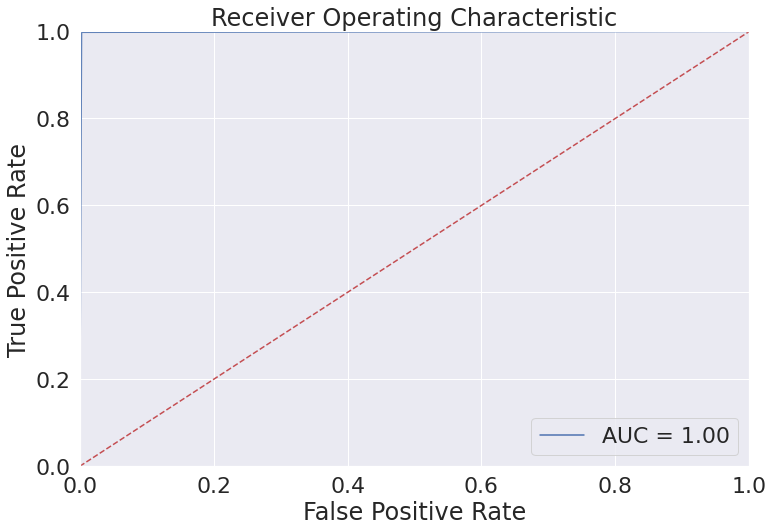

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [57]:
# test on gafgyt
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

Shape:  (37294, 115) (37294,)
----------------------Test is starting----------------------
Scale data
Shape:  (37294, 115) (37294,)
Shape:  (37294, 115) (37294,)
Normalize data
Shape:  (37294, 115) (37294,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.09841514 0.16482725 0.25015541 ... 0.62681742 0.6255226  1.04728374]
Visualize quantization error


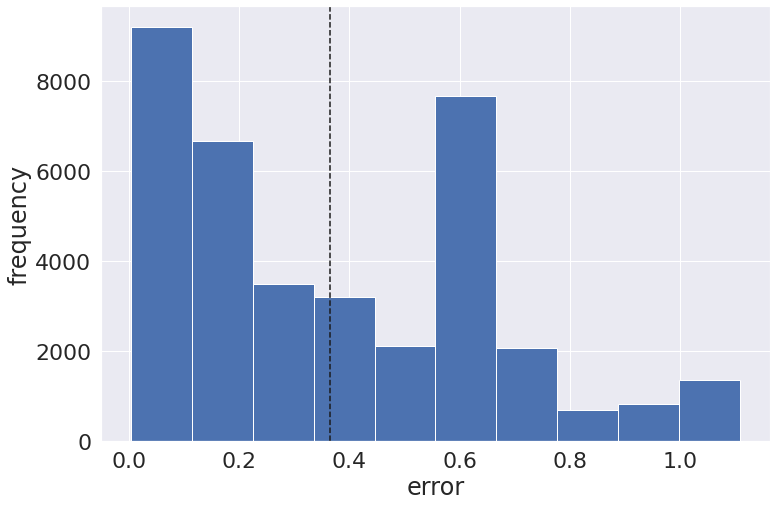

Outliers visualization


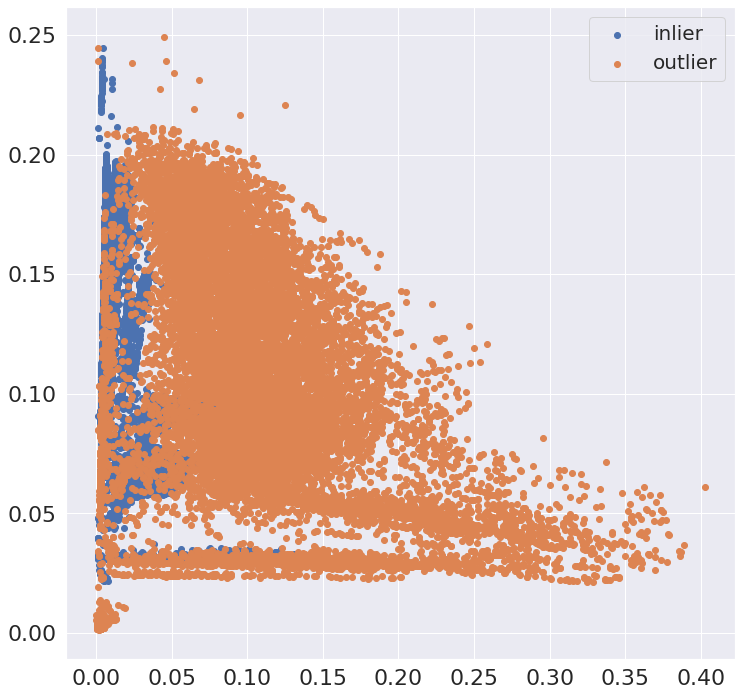

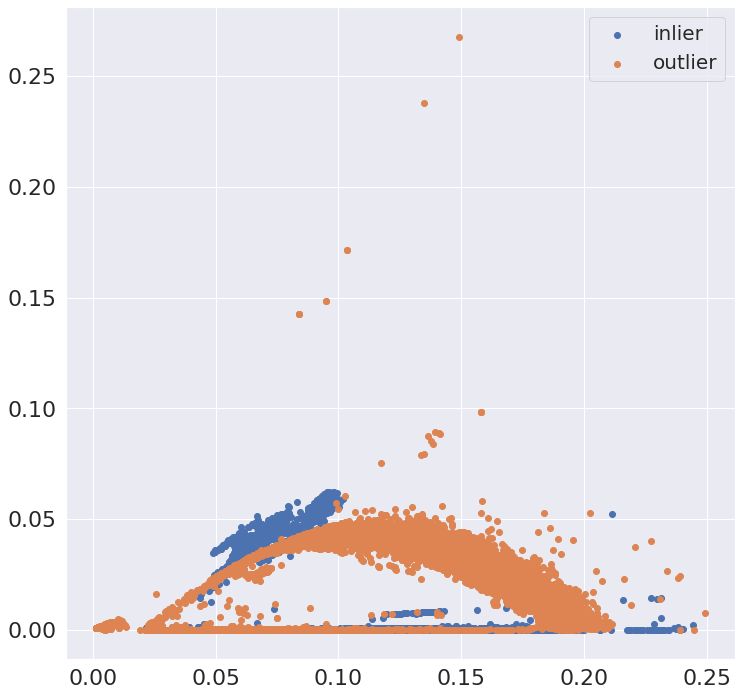

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.607     0.997     0.754     18647
           2      0.992     0.353     0.521     18647

    accuracy                          0.675     37294
   macro avg      0.799     0.675     0.638     37294
weighted avg      0.799     0.675     0.638     37294



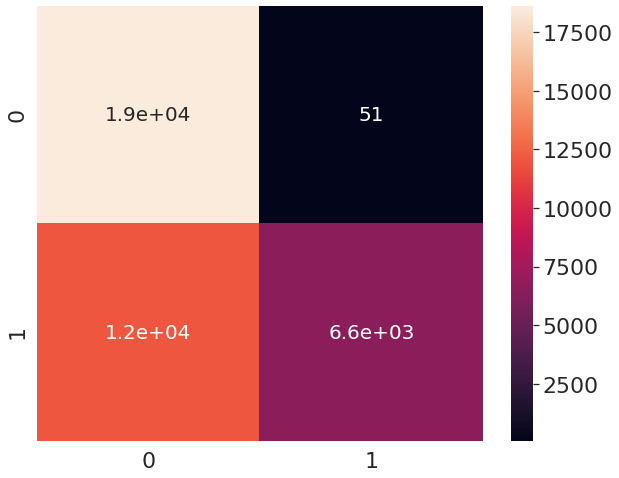

AUC score:  0.6752024454335819


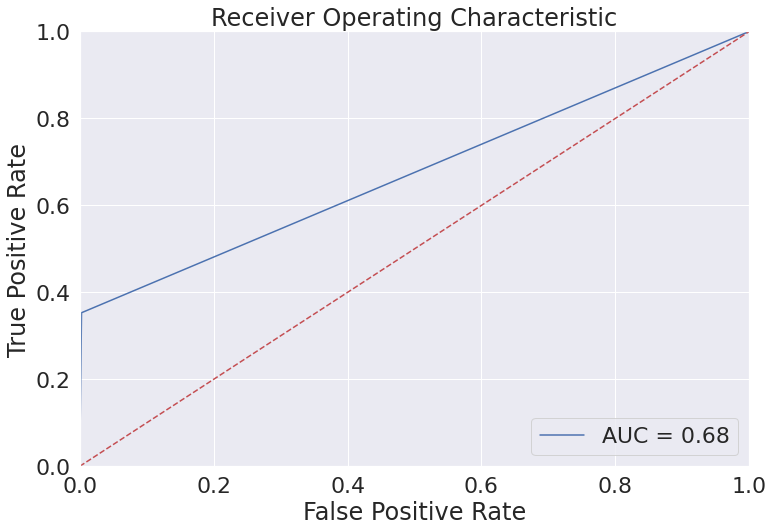

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [58]:
# test on Mirai
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 4) Algo anneal

In [59]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo='anneal', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 1.08342144e-02  1.11059656e-01  7.57470744e-15 ...  2.62075562e-04
   7.75038876e-07  9.28901706e-03]
 [ 1.08012669e-02  1.11059656e-01  4.43278699e-18 ...  2.62488761e-04
   6.80897919e-07  8.13680098e-03]
 [ 3.64663319e-03  7.41613448e-02  3.09586504e-06 ...  0.00000000e+00
  -1.88520422e-35  0.00000000e+00]
 ...
 [ 1.14822143e-01  2.19880064e-01  1.35874582e-01 ...  2.46350400e-01
   3.16466503e-01  4.14968627e-01]
 [ 3.61899764e-03  7.40397736e-02  1.90220145e-10 ...  1.08609036e-18
  -2.78362185e-36  0.00000000e+00]
 [ 3.61899732e-03  7.40397704e-02  0.00000000e+00 ...  1.08609036e-18
   0.00000000e+00  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

Shape:  (37294, 115) (37294,)
----------------------Test is starting----------------------
Scale data
Shape:  (37294, 115) (37294,)
Shape:  (37294, 115) (37294,)
Normalize data
Shape:  (37294, 115) (37294,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.08886777 0.08374062 0.24114286 ... 1.16108673 1.16108672 1.17439299]
Visualize quantization error


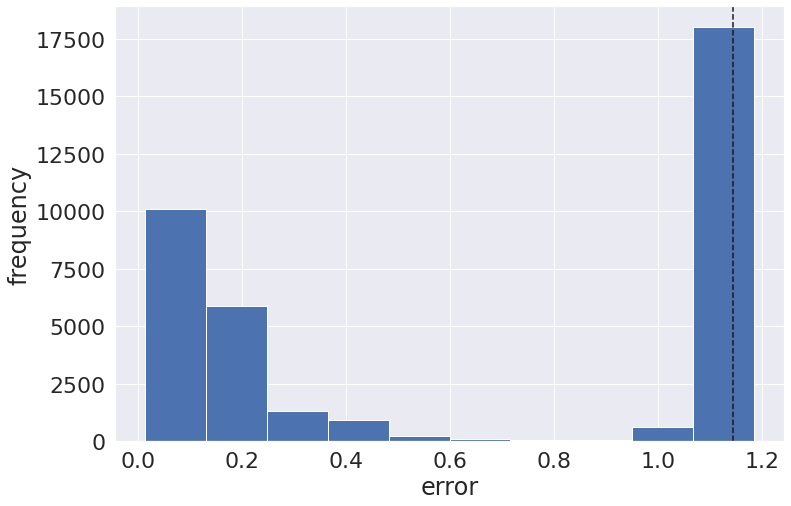

Outliers visualization


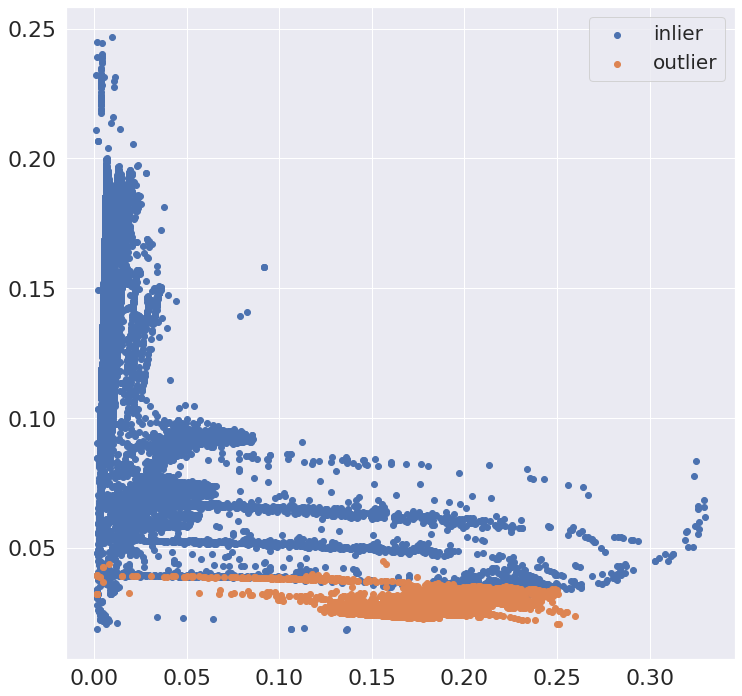

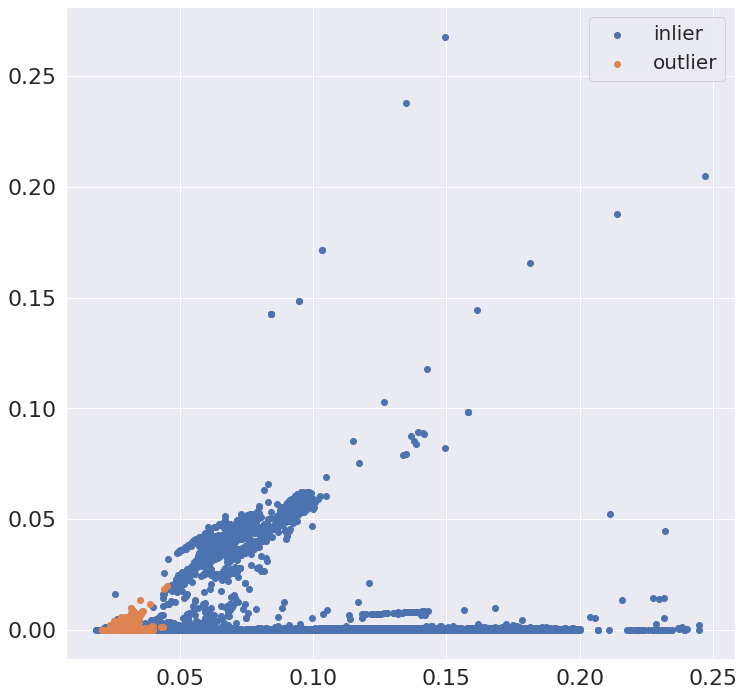

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.997     0.997     0.997     18647
           2      0.997     0.997     0.997     18647

    accuracy                          0.997     37294
   macro avg      0.997     0.997     0.997     37294
weighted avg      0.997     0.997     0.997     37294



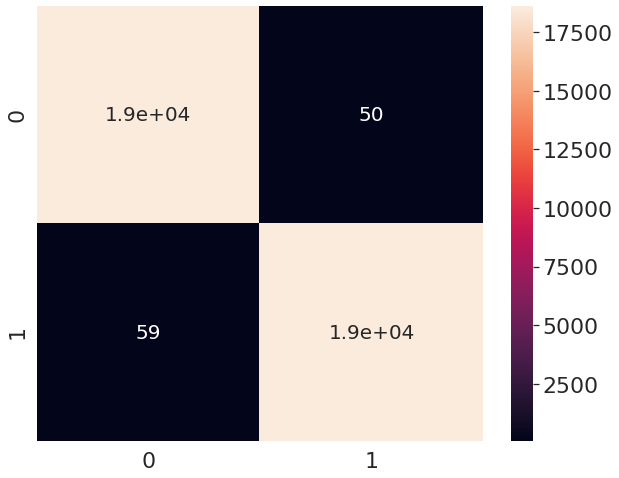

AUC score:  0.9970772778463023


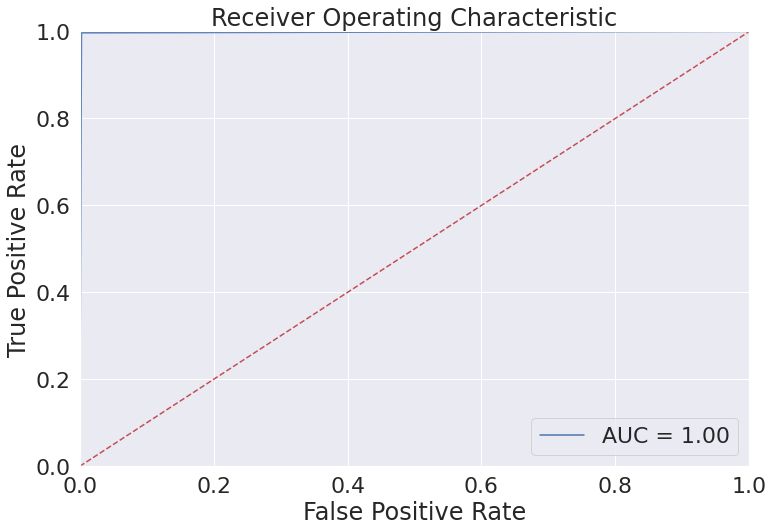

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [60]:
# test on gafgyt
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

Shape:  (37294, 115) (37294,)
----------------------Test is starting----------------------
Scale data
Shape:  (37294, 115) (37294,)
Shape:  (37294, 115) (37294,)
Normalize data
Shape:  (37294, 115) (37294,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.08886777 0.08374062 0.24114286 ... 0.89056206 0.89643924 1.11180985]
Visualize quantization error


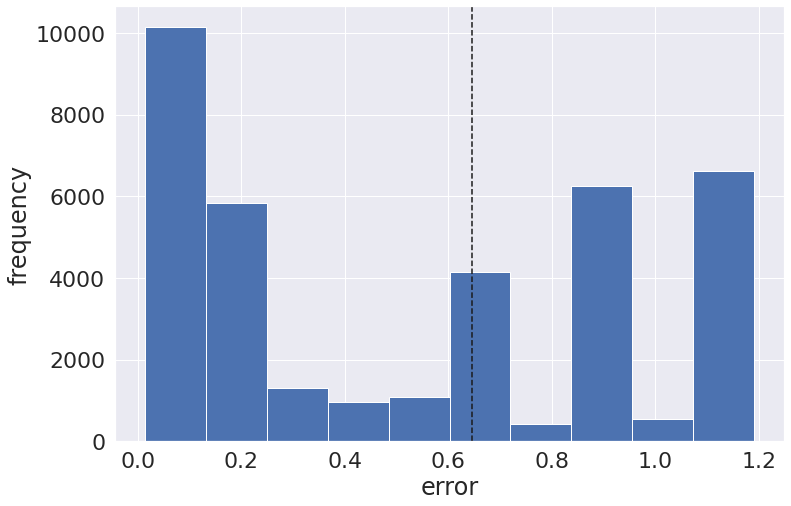

Outliers visualization


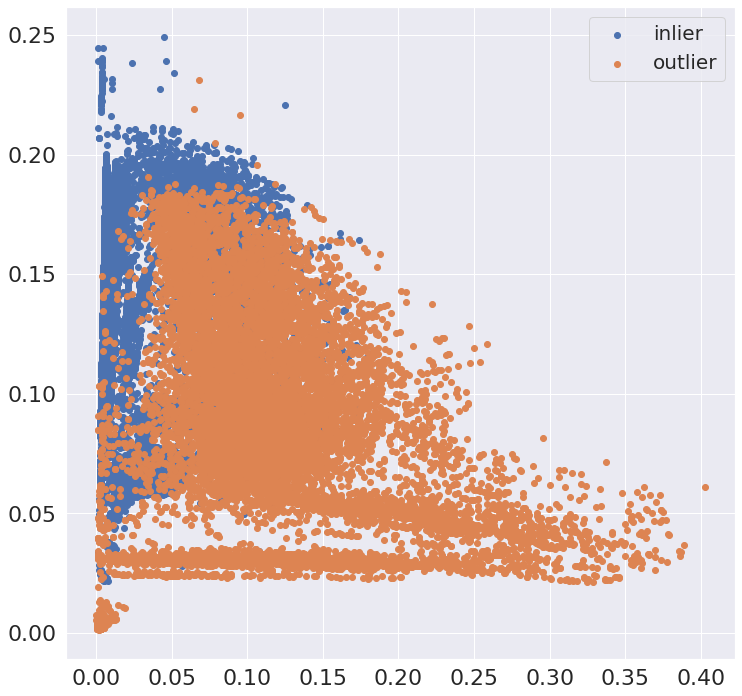

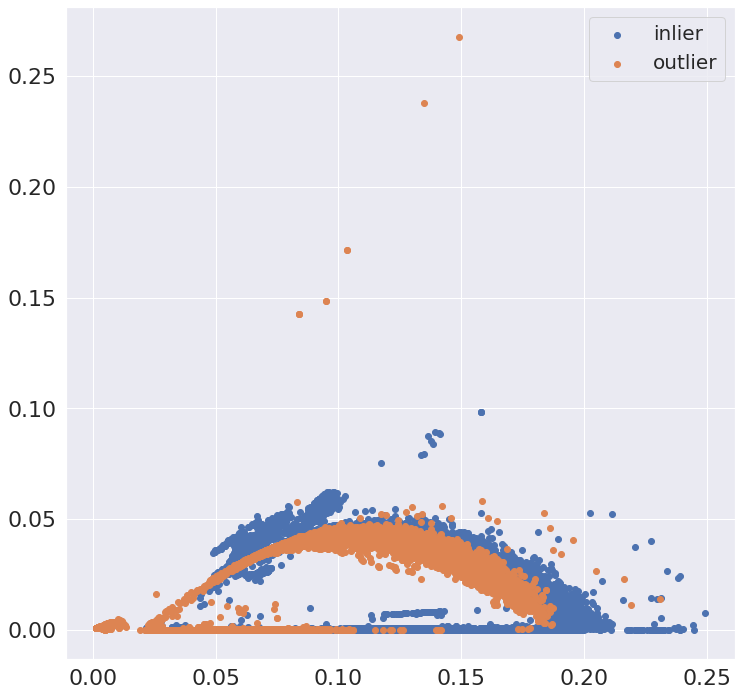

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.644     0.997     0.783     18647
           2      0.994     0.449     0.619     18647

    accuracy                          0.723     37294
   macro avg      0.819     0.723     0.701     37294
weighted avg      0.819     0.723     0.701     37294



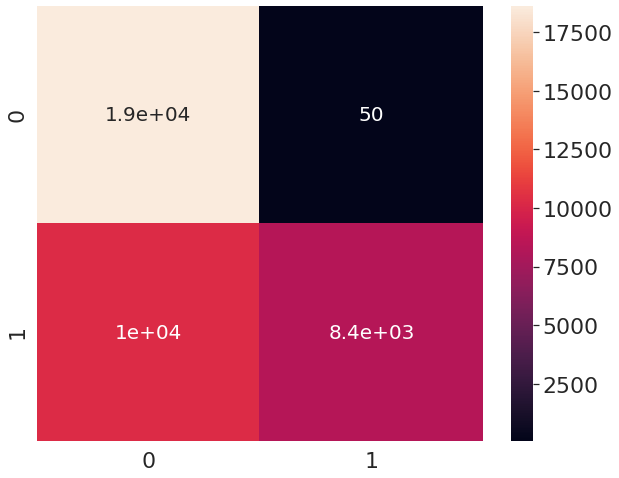

AUC score:  0.7231458143401084


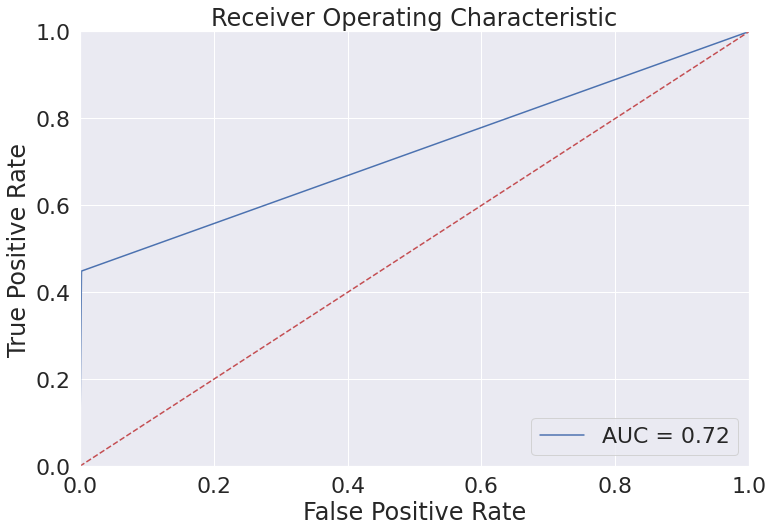

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [61]:
# test on Mirai
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

## 4.2. Train Mirai


## 4.2.4. Ratio 1.0

### 1) Set 15

### Train

In [62]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo=None, som_x=15, som_y=15, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 7.92153949e-03  1.52542373e-01  7.57470744e-15 ...  2.62075562e-04
   2.39033035e-06  1.38336041e-02]
 [ 7.89744958e-03  1.52542373e-01  4.43278699e-18 ...  2.62488761e-04
   2.09998622e-06  1.21176743e-02]
 [ 2.66627073e-03  1.01861900e-01  3.09586504e-06 ...  0.00000000e+00
  -5.81423848e-35  0.00000000e+00]
 ...
 [ 8.39533082e-02  3.02009101e-01  1.35874582e-01 ...  2.46350400e-01
   9.76027798e-01  6.17989146e-01]
 [ 2.64606474e-03  1.01694920e-01  1.90220145e-10 ...  1.08609036e-18
  -8.58508651e-36  0.00000000e+00]
 [ 2.64606451e-03  1.01694915e-01  0.00000000e+00 ...  1.08609036e-18
   0.00000000e+00  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

### Test on the same device

#### Test on gafgyt

Shape:  (37294, 115) (37294,)
----------------------Test is starting----------------------
Scale data
Shape:  (37294, 115) (37294,)
Shape:  (37294, 115) (37294,)
Normalize data
Shape:  (37294, 115) (37294,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.36583908 0.0270302  0.25760858 ... 1.11421352 1.11421351 1.19366684]
Visualize quantization error


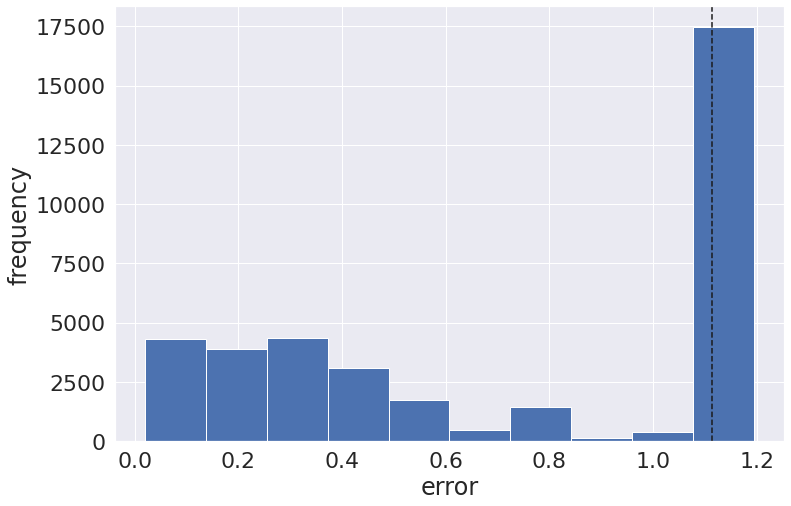

Outliers visualization


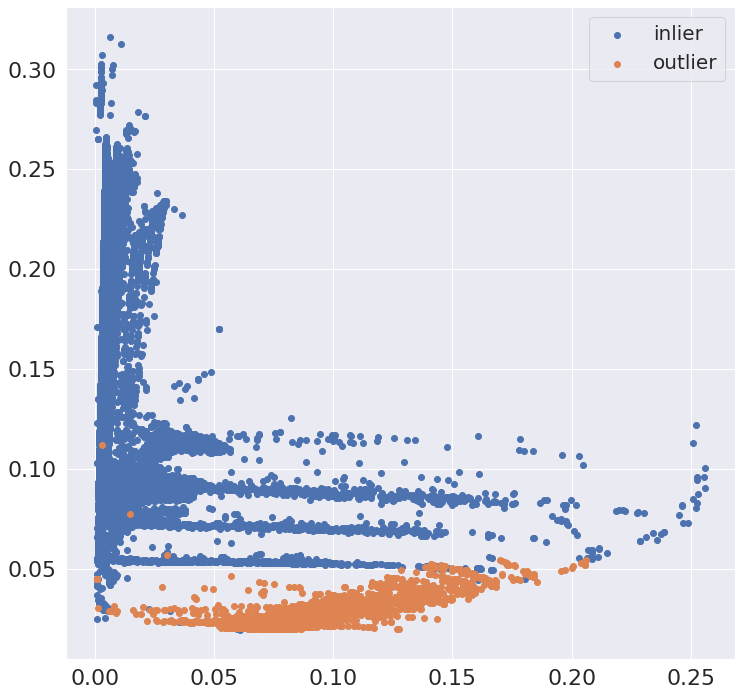

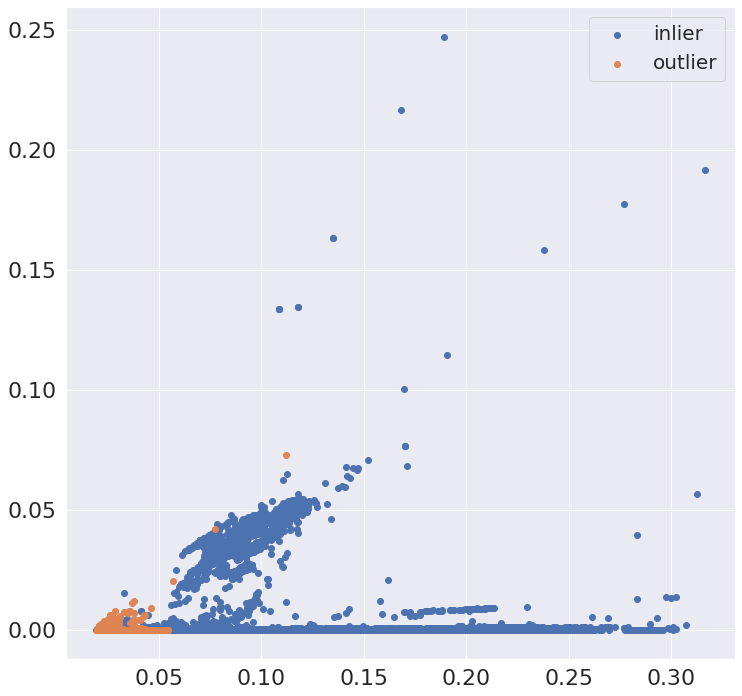

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.942     0.990     0.965     18647
           2      0.990     0.939     0.964     18647

    accuracy                          0.965     37294
   macro avg      0.966     0.965     0.965     37294
weighted avg      0.966     0.965     0.965     37294



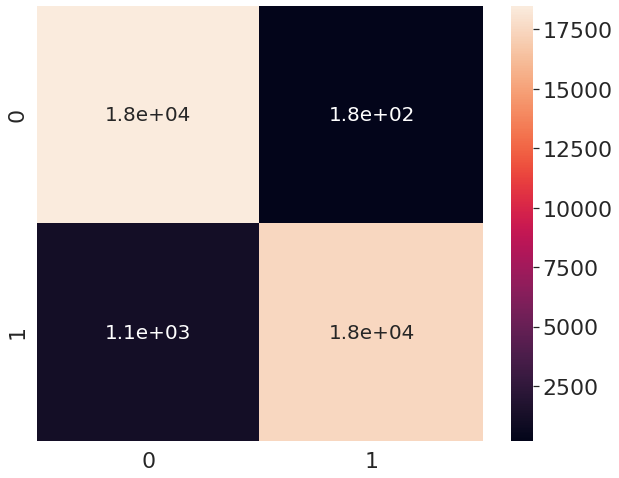

AUC score:  0.9645251246849359


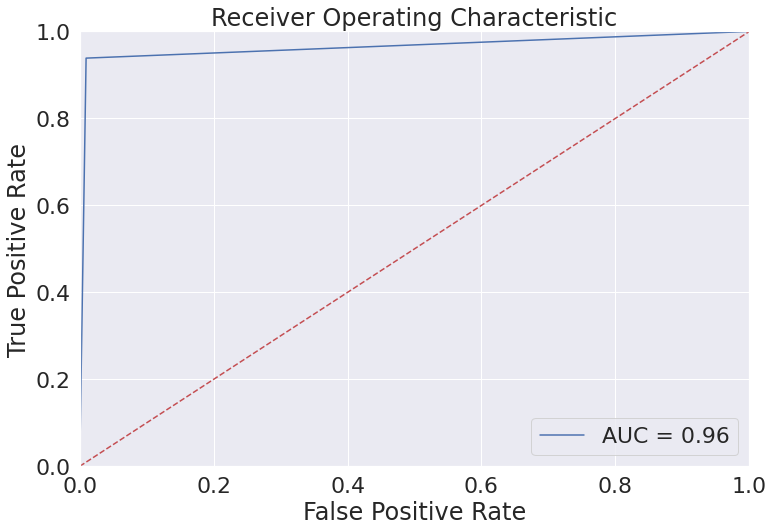

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [63]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (37294, 115) (37294,)
----------------------Test is starting----------------------
Scale data
Shape:  (37294, 115) (37294,)
Shape:  (37294, 115) (37294,)
Normalize data
Shape:  (37294, 115) (37294,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.36583908 0.0270302  0.25760858 ... 0.78811979 0.79271464 1.14399765]
Visualize quantization error


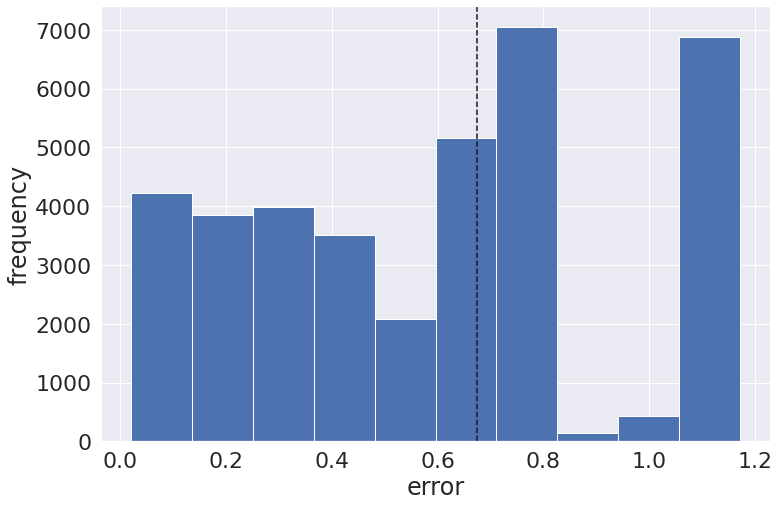

Outliers visualization


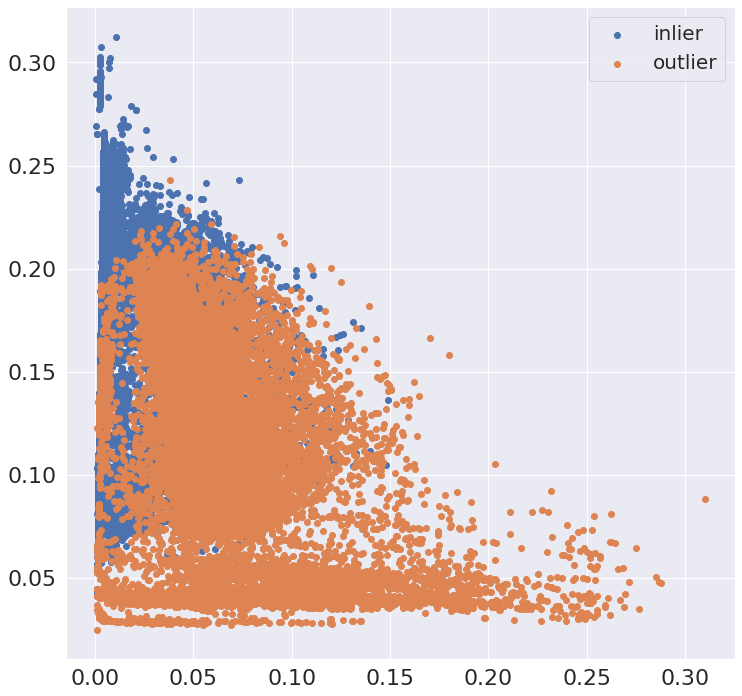

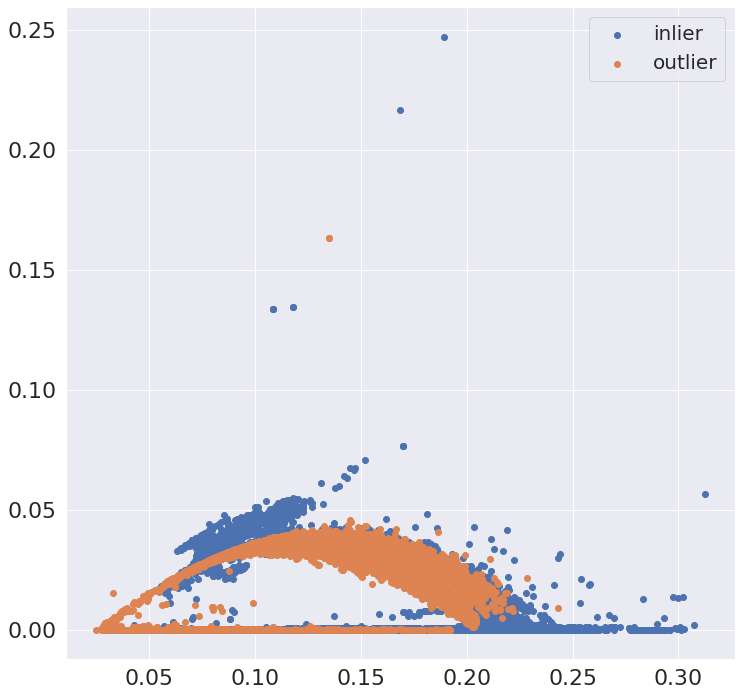

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.990     0.994     18647
           2      0.991     0.998     0.994     18647

    accuracy                          0.994     37294
   macro avg      0.994     0.994     0.994     37294
weighted avg      0.994     0.994     0.994     37294



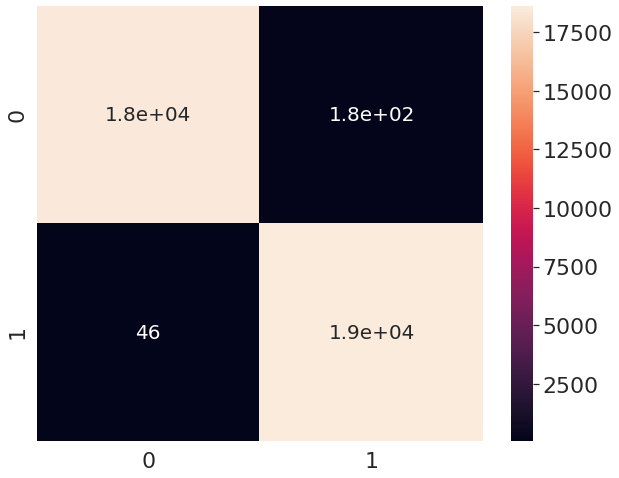

AUC score:  0.9939936719043276


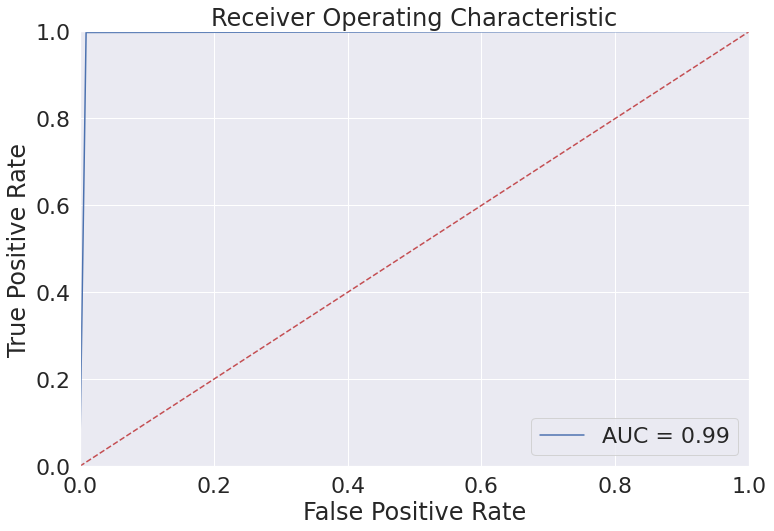

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [64]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 2) Set 22 (recommend size)

### Train

In [65]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo=None, som_x=22, som_y=22, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 7.92153949e-03  1.52542373e-01  7.57470744e-15 ...  2.62075562e-04
   2.39033035e-06  1.38336041e-02]
 [ 7.89744958e-03  1.52542373e-01  4.43278699e-18 ...  2.62488761e-04
   2.09998622e-06  1.21176743e-02]
 [ 2.66627073e-03  1.01861900e-01  3.09586504e-06 ...  0.00000000e+00
  -5.81423848e-35  0.00000000e+00]
 ...
 [ 8.39533082e-02  3.02009101e-01  1.35874582e-01 ...  2.46350400e-01
   9.76027798e-01  6.17989146e-01]
 [ 2.64606474e-03  1.01694920e-01  1.90220145e-10 ...  1.08609036e-18
  -8.58508651e-36  0.00000000e+00]
 [ 2.64606451e-03  1.01694915e-01  0.00000000e+00 ...  1.08609036e-18
   0.00000000e+00  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

### Test on the same device

#### Test on gafgyt

Shape:  (37294, 115) (37294,)
----------------------Test is starting----------------------
Scale data
Shape:  (37294, 115) (37294,)
Shape:  (37294, 115) (37294,)
Normalize data
Shape:  (37294, 115) (37294,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.14898116 0.09833609 0.30109432 ... 1.16268738 1.16268738 1.19670334]
Visualize quantization error


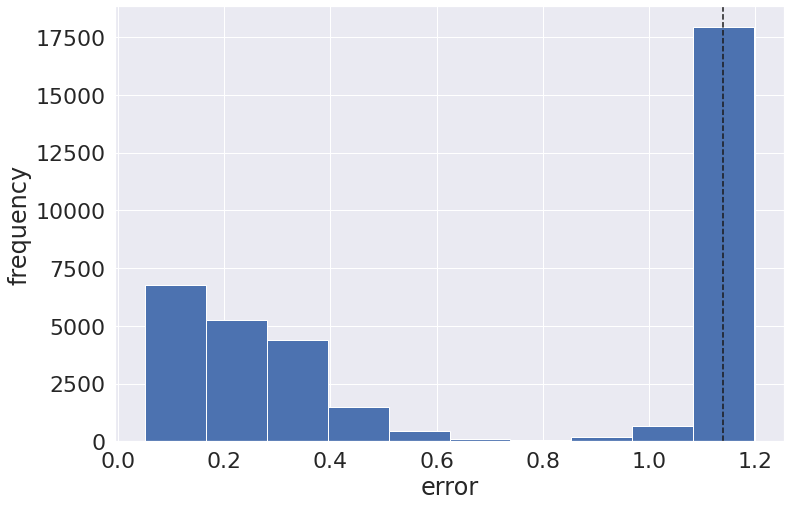

Outliers visualization


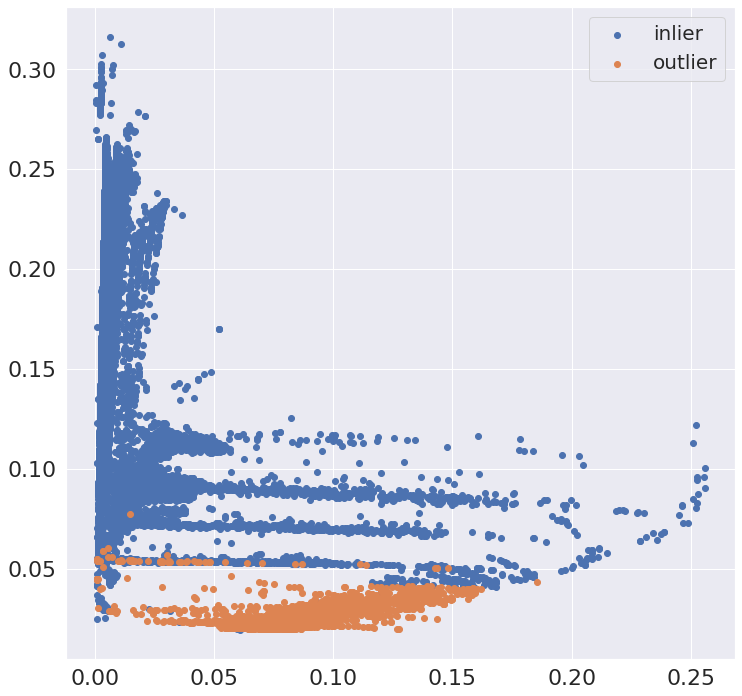

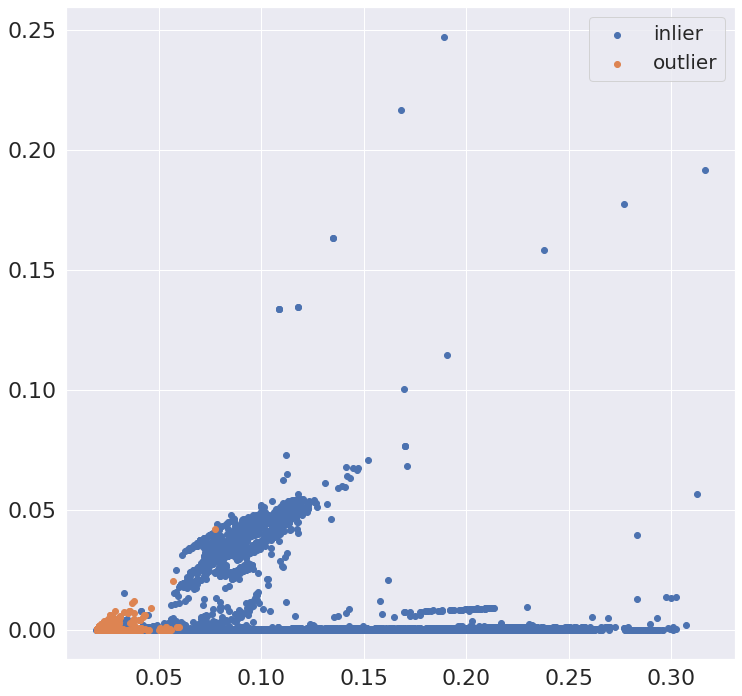

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.903     0.996     0.947     18647
           2      0.995     0.894     0.942     18647

    accuracy                          0.945     37294
   macro avg      0.949     0.945     0.945     37294
weighted avg      0.949     0.945     0.945     37294



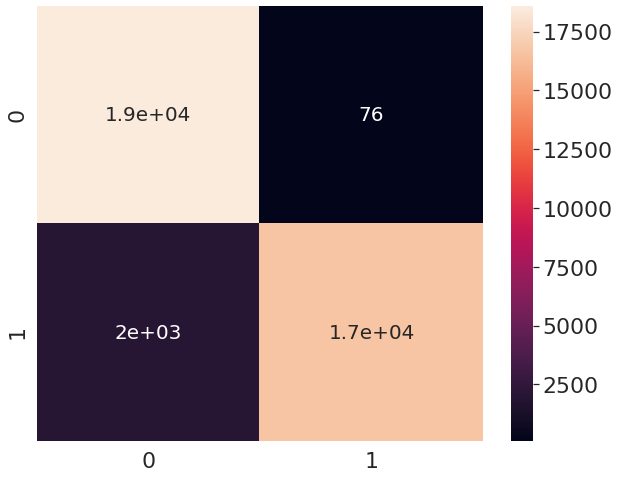

AUC score:  0.9447364187268729


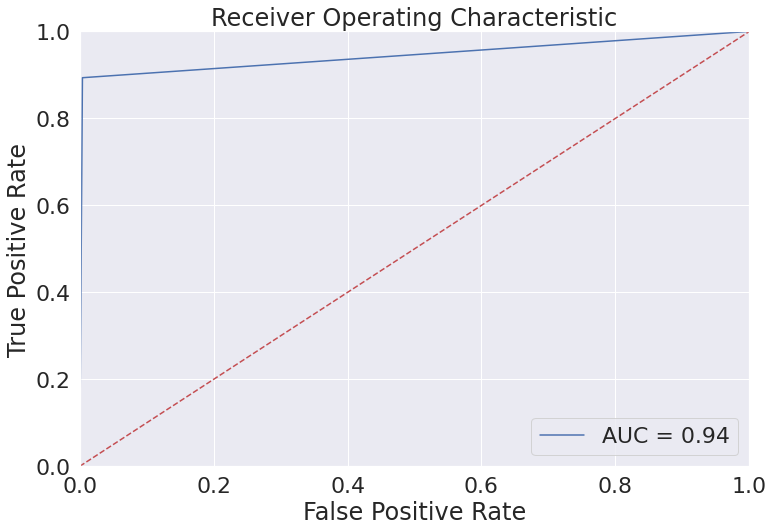

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [66]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (37294, 115) (37294,)
----------------------Test is starting----------------------
Scale data
Shape:  (37294, 115) (37294,)
Shape:  (37294, 115) (37294,)
Normalize data
Shape:  (37294, 115) (37294,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.14898116 0.09833609 0.30109432 ... 0.80340037 0.81147427 1.14366607]
Visualize quantization error


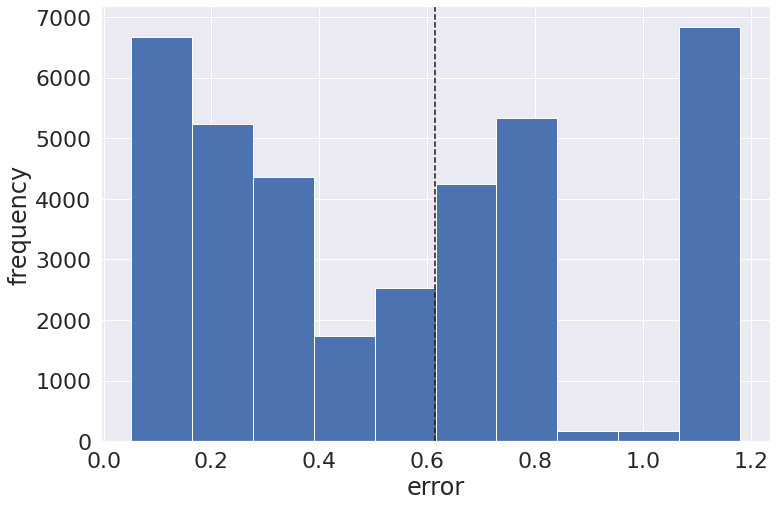

Outliers visualization


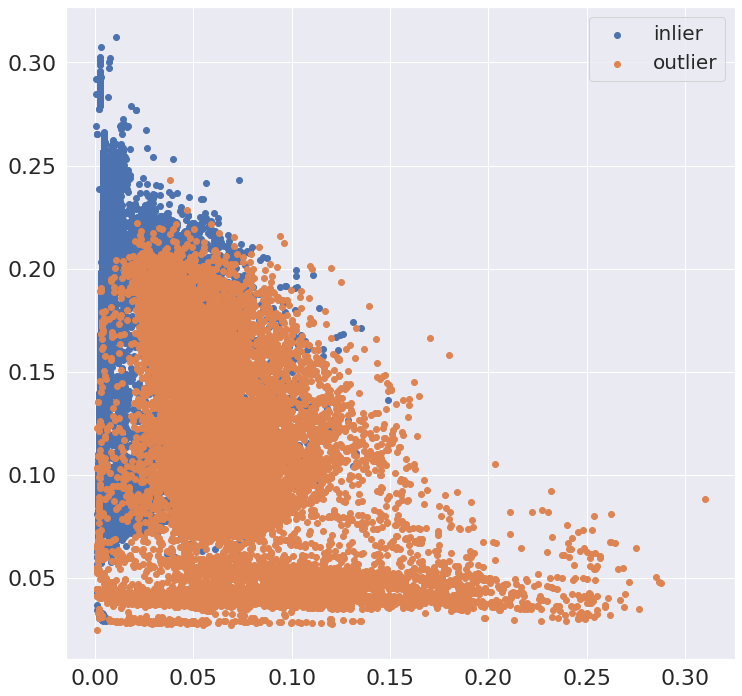

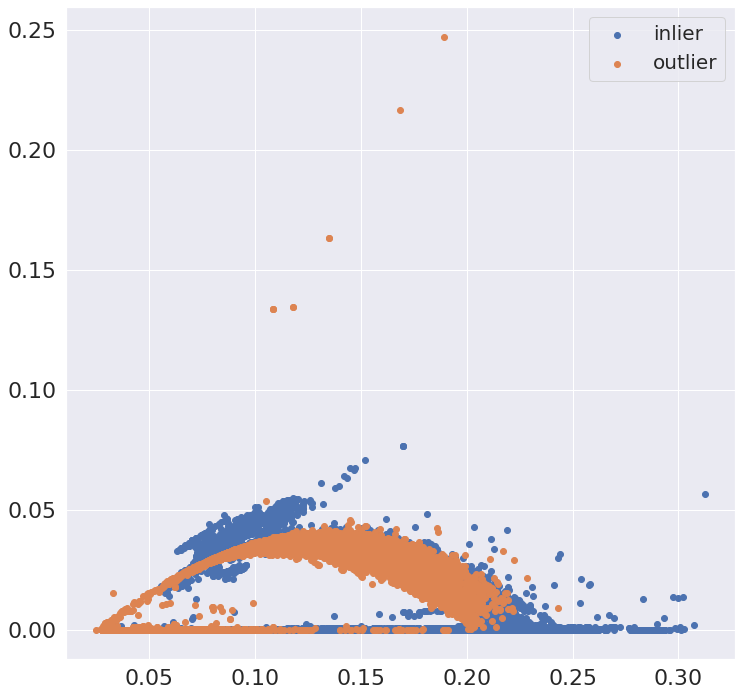

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.996     0.997     18647
           2      0.996     0.998     0.997     18647

    accuracy                          0.997     37294
   macro avg      0.997     0.997     0.997     37294
weighted avg      0.997     0.997     0.997     37294



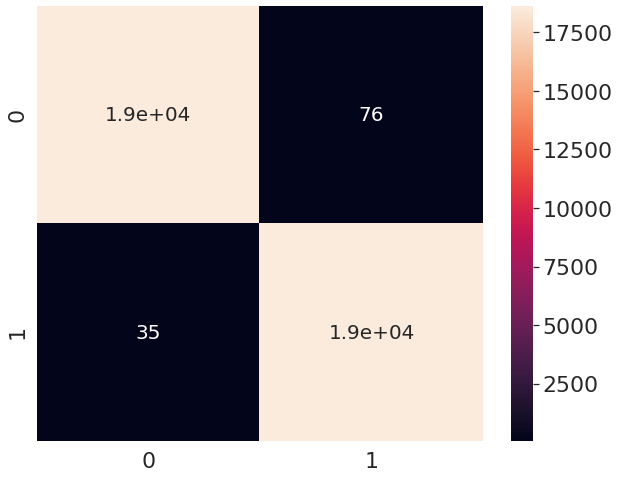

AUC score:  0.9970236499168766


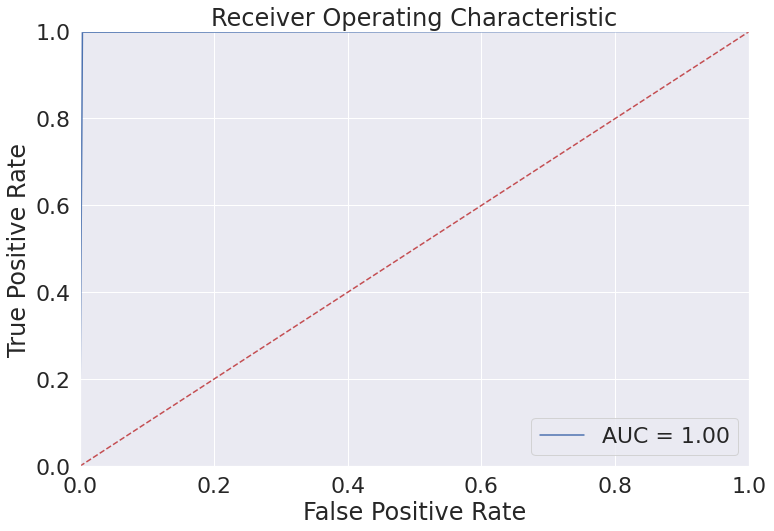

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [67]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 3) Set 30

### Train

In [68]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo=None, som_x=30, som_y=30, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 7.92153949e-03  1.52542373e-01  7.57470744e-15 ...  2.62075562e-04
   2.39033035e-06  1.38336041e-02]
 [ 7.89744958e-03  1.52542373e-01  4.43278699e-18 ...  2.62488761e-04
   2.09998622e-06  1.21176743e-02]
 [ 2.66627073e-03  1.01861900e-01  3.09586504e-06 ...  0.00000000e+00
  -5.81423848e-35  0.00000000e+00]
 ...
 [ 8.39533082e-02  3.02009101e-01  1.35874582e-01 ...  2.46350400e-01
   9.76027798e-01  6.17989146e-01]
 [ 2.64606474e-03  1.01694920e-01  1.90220145e-10 ...  1.08609036e-18
  -8.58508651e-36  0.00000000e+00]
 [ 2.64606451e-03  1.01694915e-01  0.00000000e+00 ...  1.08609036e-18
   0.00000000e+00  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

### Test on the same device

#### Test on gafgyt

Shape:  (37294, 115) (37294,)
----------------------Test is starting----------------------
Scale data
Shape:  (37294, 115) (37294,)
Shape:  (37294, 115) (37294,)
Normalize data
Shape:  (37294, 115) (37294,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.08361989 0.02829785 0.23983749 ... 1.16563664 1.16563663 1.20669936]
Visualize quantization error


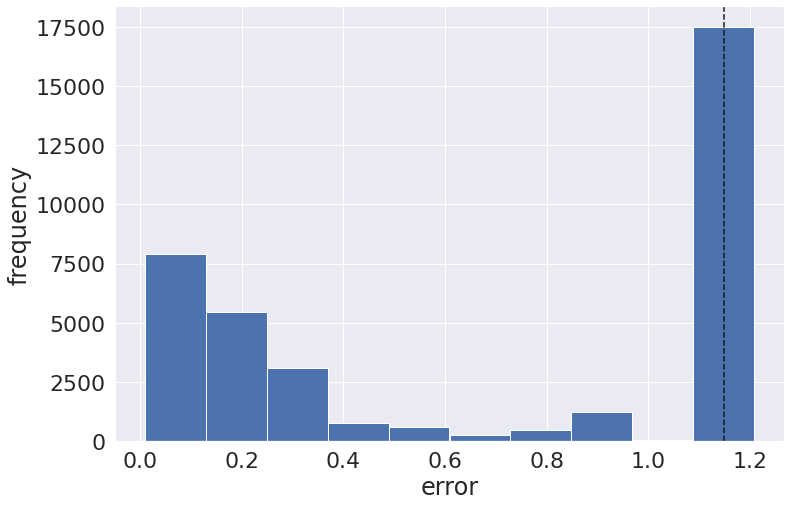

Outliers visualization


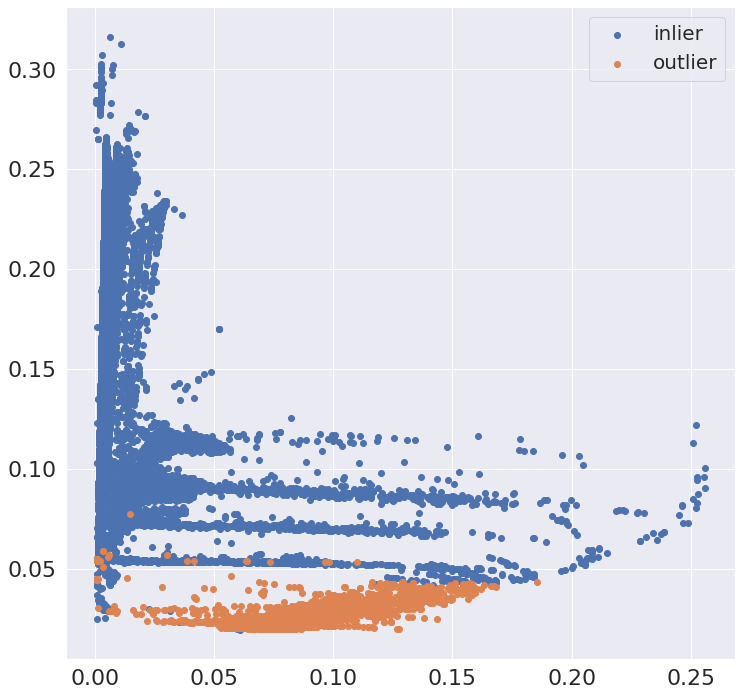

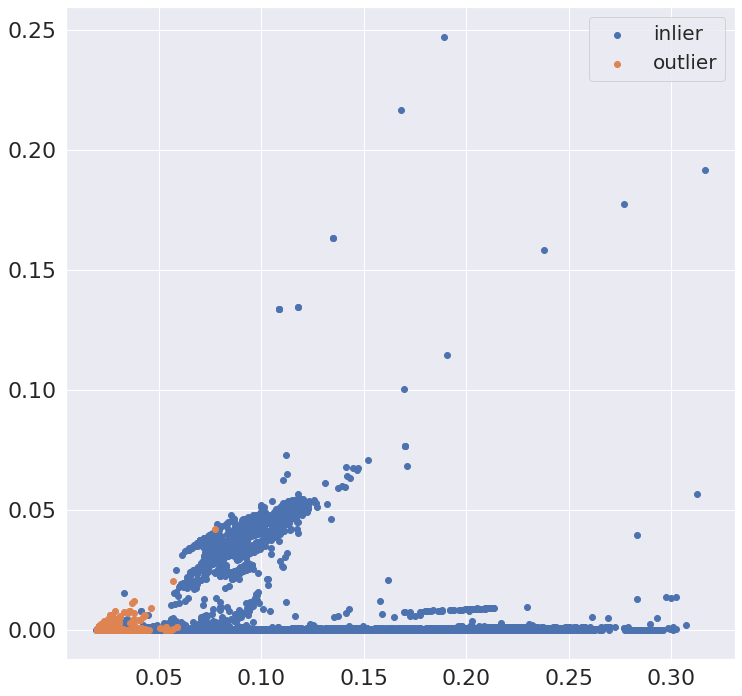

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.941     0.985     0.963     18647
           2      0.984     0.939     0.961     18647

    accuracy                          0.962     37294
   macro avg      0.963     0.962     0.962     37294
weighted avg      0.963     0.962     0.962     37294



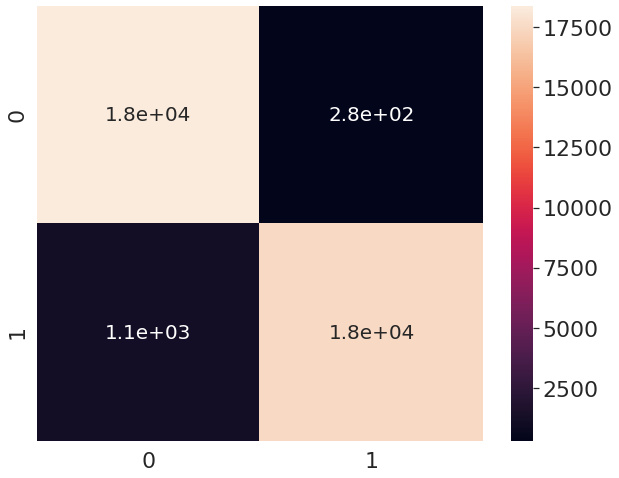

AUC score:  0.961790100284228


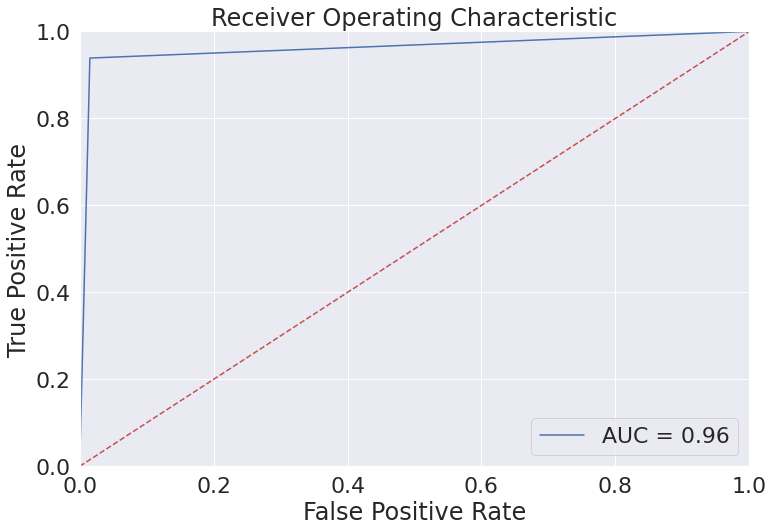

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [69]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (37294, 115) (37294,)
----------------------Test is starting----------------------
Scale data
Shape:  (37294, 115) (37294,)
Shape:  (37294, 115) (37294,)
Normalize data
Shape:  (37294, 115) (37294,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.08361989 0.02829785 0.23983749 ... 0.78392449 0.79029309 1.15435063]
Visualize quantization error


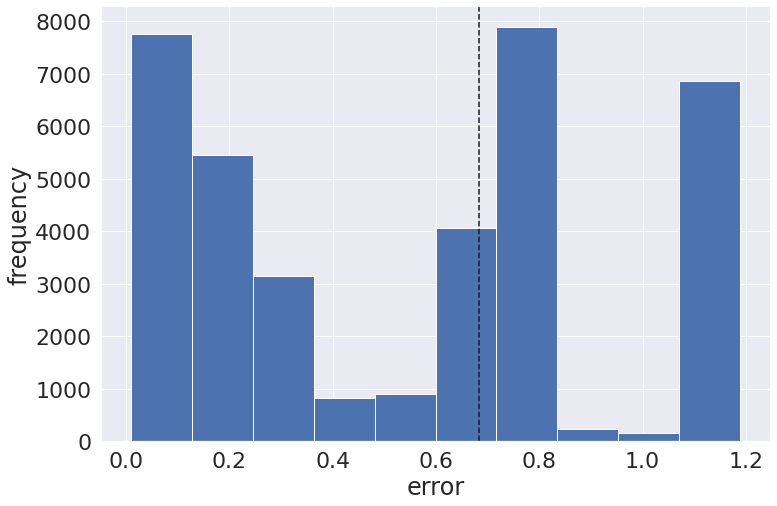

Outliers visualization


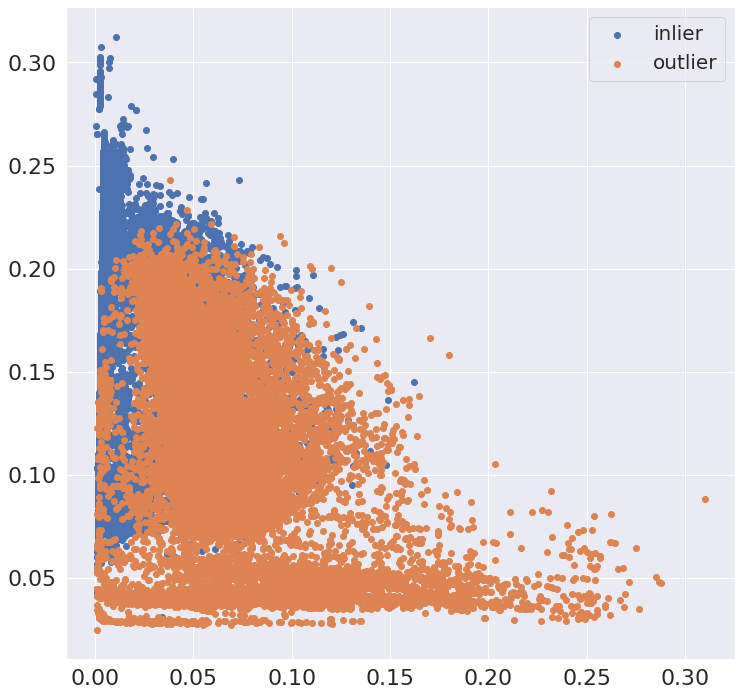

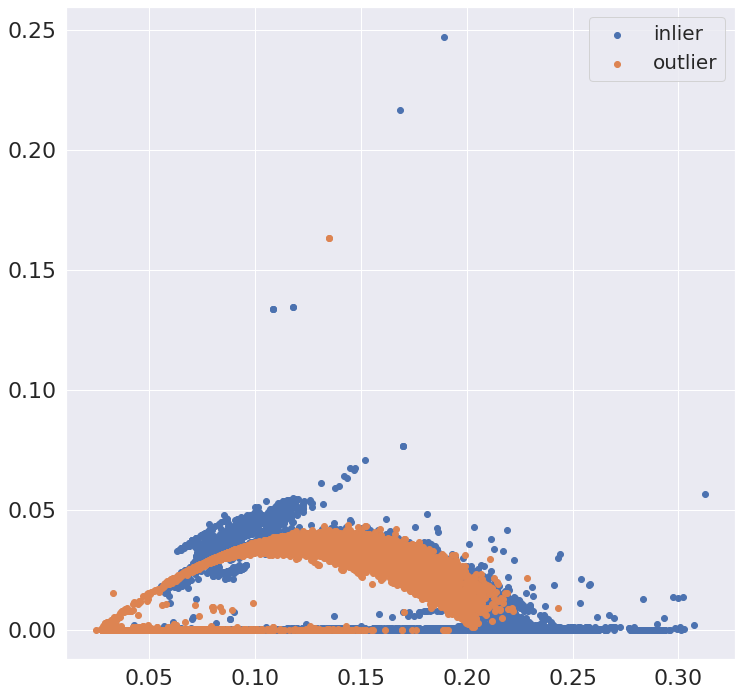

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.997     0.985     0.991     18647
           2      0.985     0.997     0.991     18647

    accuracy                          0.991     37294
   macro avg      0.991     0.991     0.991     37294
weighted avg      0.991     0.991     0.991     37294



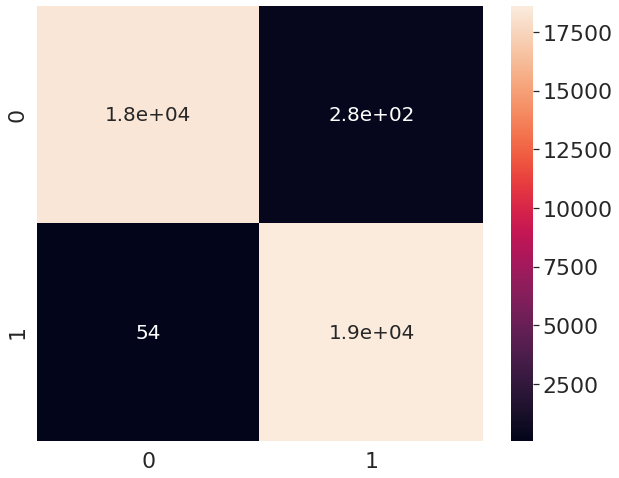

AUC score:  0.9909636938917789


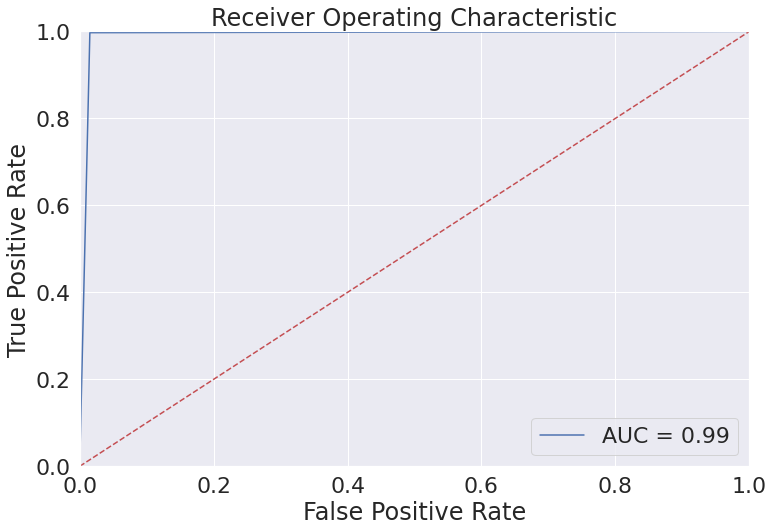

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [70]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 4) Set 45

### Train

In [71]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo=None, som_x=45, som_y=45, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 7.92153949e-03  1.52542373e-01  7.57470744e-15 ...  2.62075562e-04
   2.39033035e-06  1.38336041e-02]
 [ 7.89744958e-03  1.52542373e-01  4.43278699e-18 ...  2.62488761e-04
   2.09998622e-06  1.21176743e-02]
 [ 2.66627073e-03  1.01861900e-01  3.09586504e-06 ...  0.00000000e+00
  -5.81423848e-35  0.00000000e+00]
 ...
 [ 8.39533082e-02  3.02009101e-01  1.35874582e-01 ...  2.46350400e-01
   9.76027798e-01  6.17989146e-01]
 [ 2.64606474e-03  1.01694920e-01  1.90220145e-10 ...  1.08609036e-18
  -8.58508651e-36  0.00000000e+00]
 [ 2.64606451e-03  1.01694915e-01  0.00000000e+00 ...  1.08609036e-18
   0.00000000e+00  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

### Test on the same device

#### Test on gafgyt

Shape:  (37294, 115) (37294,)
----------------------Test is starting----------------------
Scale data
Shape:  (37294, 115) (37294,)
Shape:  (37294, 115) (37294,)
Normalize data
Shape:  (37294, 115) (37294,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.0924888  0.01323377 0.22602202 ... 1.0948944  1.0948944  1.14658325]
Visualize quantization error


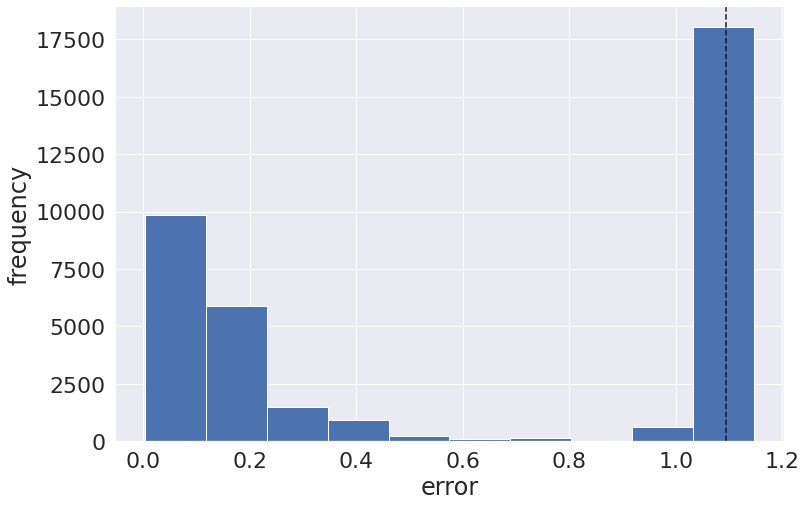

Outliers visualization


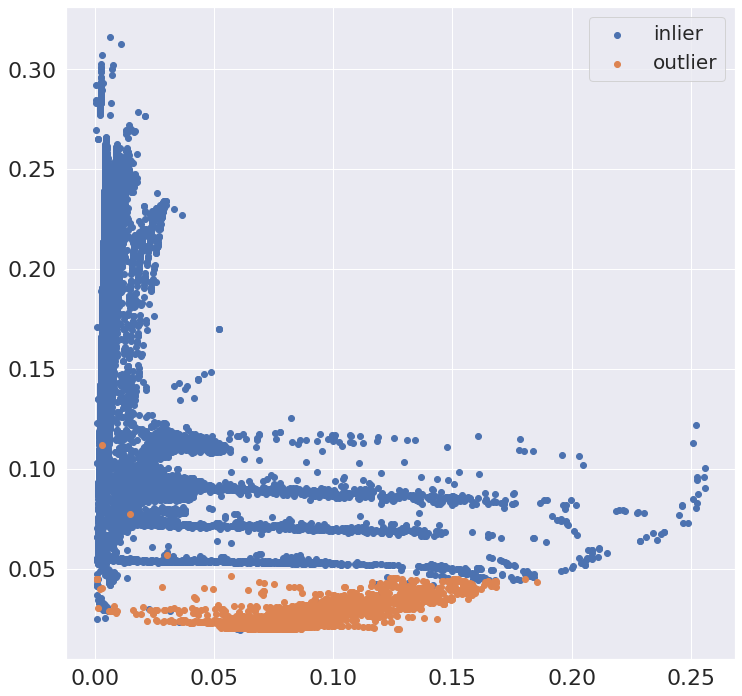

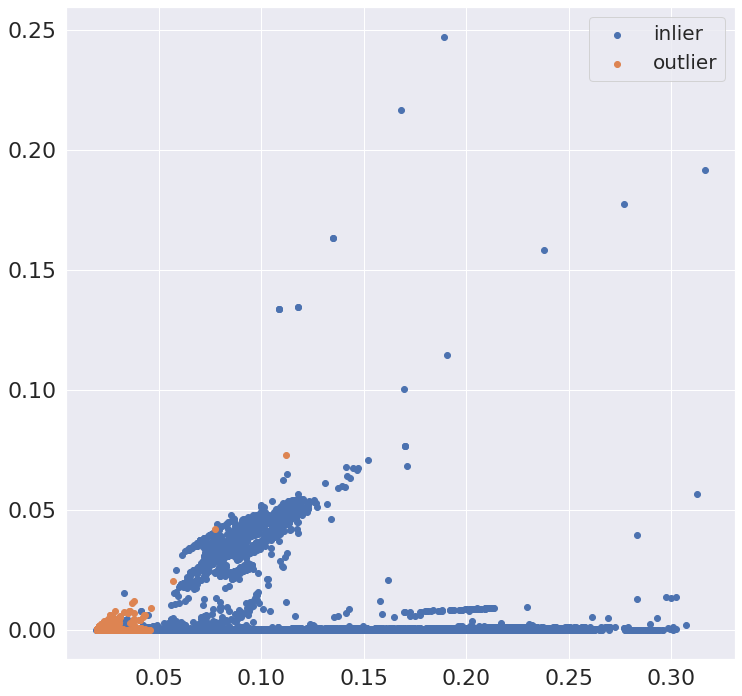

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.970     0.991     0.980     18647
           2      0.991     0.969     0.980     18647

    accuracy                          0.980     37294
   macro avg      0.980     0.980     0.980     37294
weighted avg      0.980     0.980     0.980     37294



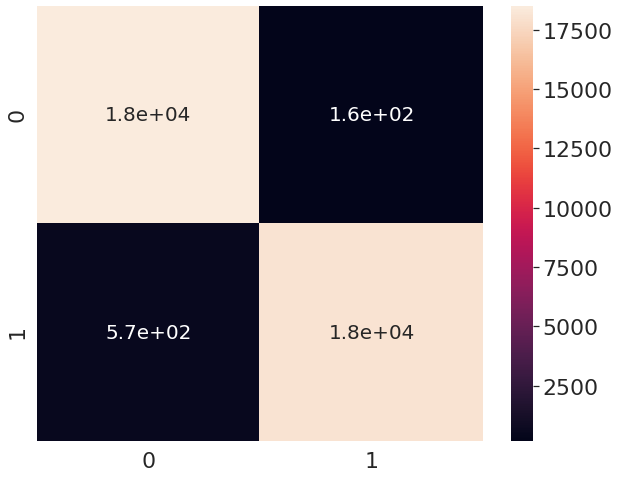

AUC score:  0.9802381080066499


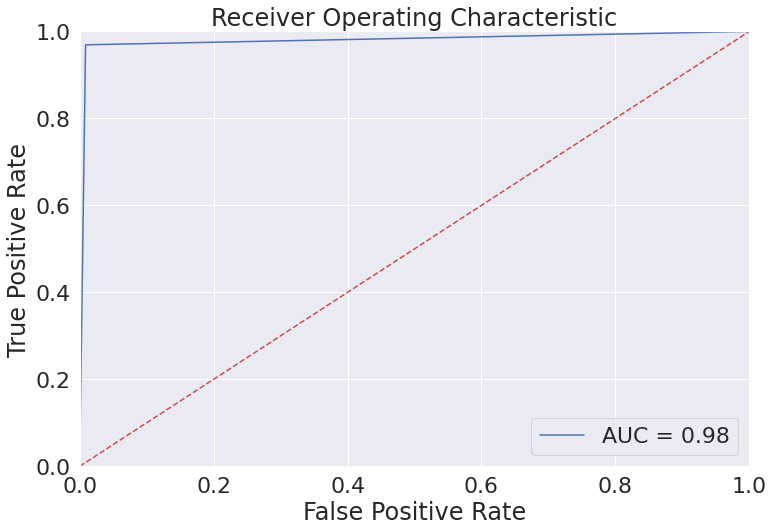

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [72]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (37294, 115) (37294,)
----------------------Test is starting----------------------
Scale data
Shape:  (37294, 115) (37294,)
Shape:  (37294, 115) (37294,)
Normalize data
Shape:  (37294, 115) (37294,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.0924888  0.01323377 0.22602202 ... 0.82507642 0.82920709 1.10548876]
Visualize quantization error


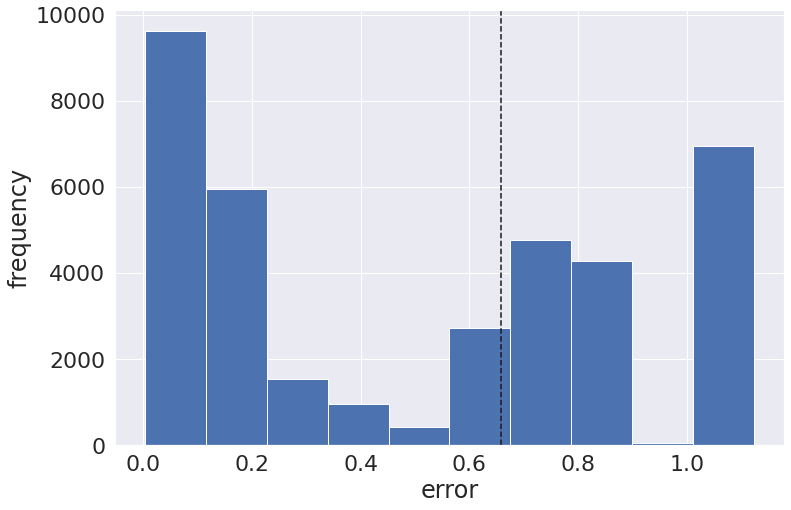

Outliers visualization


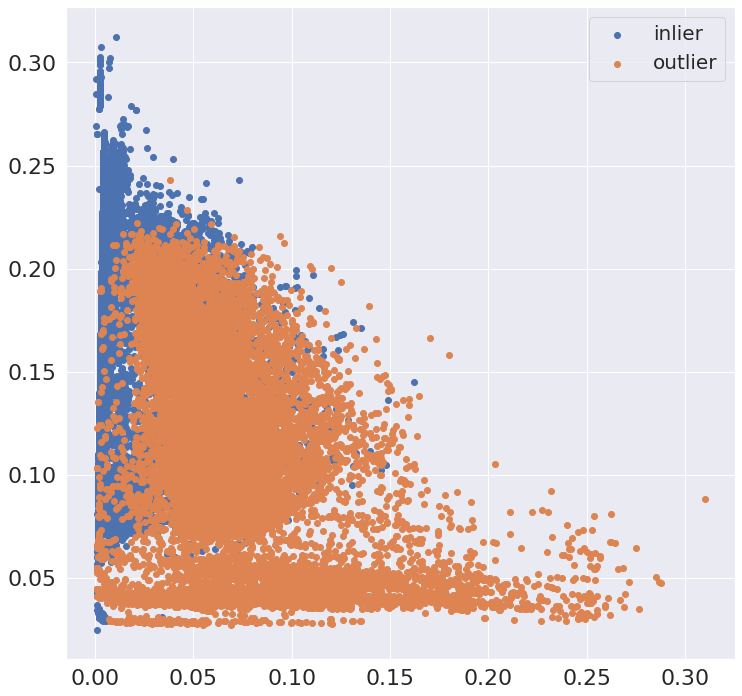

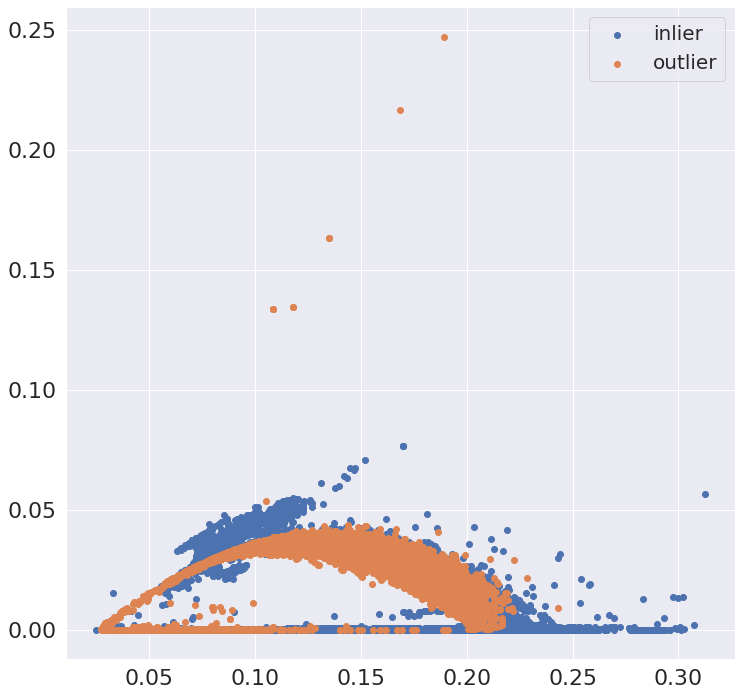

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.994     0.991     0.993     18647
           2      0.991     0.994     0.993     18647

    accuracy                          0.993     37294
   macro avg      0.993     0.993     0.993     37294
weighted avg      0.993     0.993     0.993     37294



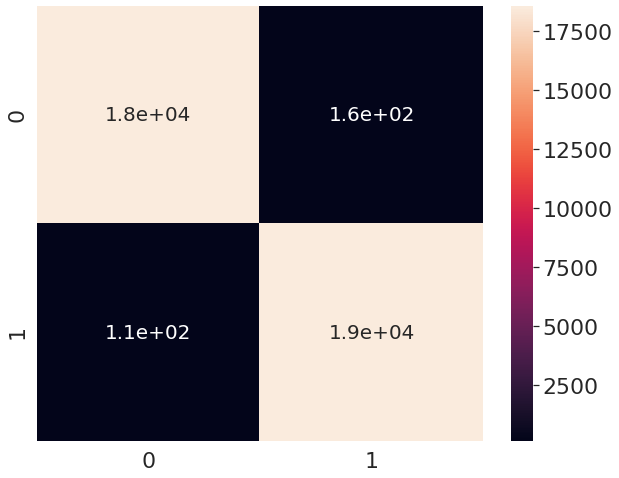

AUC score:  0.9927066015981124


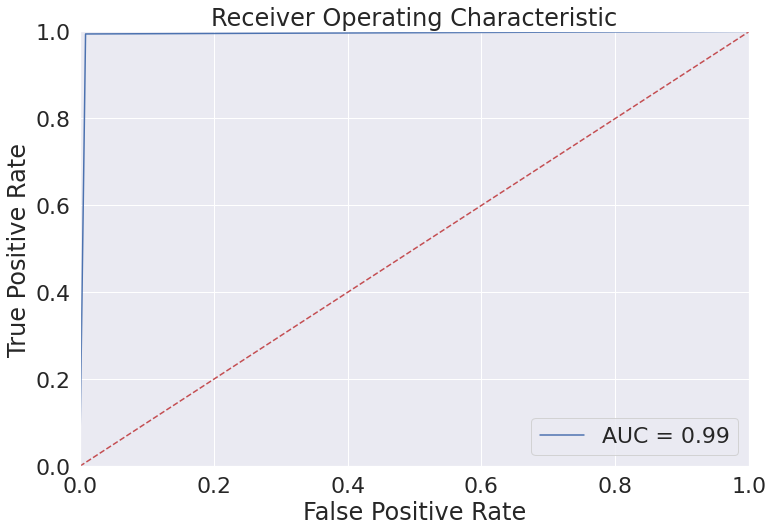

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [73]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)


### 1) Algo tpe

### Train

In [74]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo='tpe', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 7.92153949e-03  1.52542373e-01  7.57470744e-15 ...  2.62075562e-04
   2.39033035e-06  1.38336041e-02]
 [ 7.89744958e-03  1.52542373e-01  4.43278699e-18 ...  2.62488761e-04
   2.09998622e-06  1.21176743e-02]
 [ 2.66627073e-03  1.01861900e-01  3.09586504e-06 ...  0.00000000e+00
  -5.81423848e-35  0.00000000e+00]
 ...
 [ 8.39533082e-02  3.02009101e-01  1.35874582e-01 ...  2.46350400e-01
   9.76027798e-01  6.17989146e-01]
 [ 2.64606474e-03  1.01694920e-01  1.90220145e-10 ...  1.08609036e-18
  -8.58508651e-36  0.00000000e+00]
 [ 2.64606451e-03  1.01694915e-01  0.00000000e+00 ...  1.08609036e-18
   0.00000000e+00  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

### Test on the same device

#### Test on gafgyt

Shape:  (37294, 115) (37294,)
----------------------Test is starting----------------------
Scale data
Shape:  (37294, 115) (37294,)
Shape:  (37294, 115) (37294,)
Normalize data
Shape:  (37294, 115) (37294,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.17158245 0.02738203 0.24146389 ... 1.06902883 1.06902883 1.14202443]
Visualize quantization error


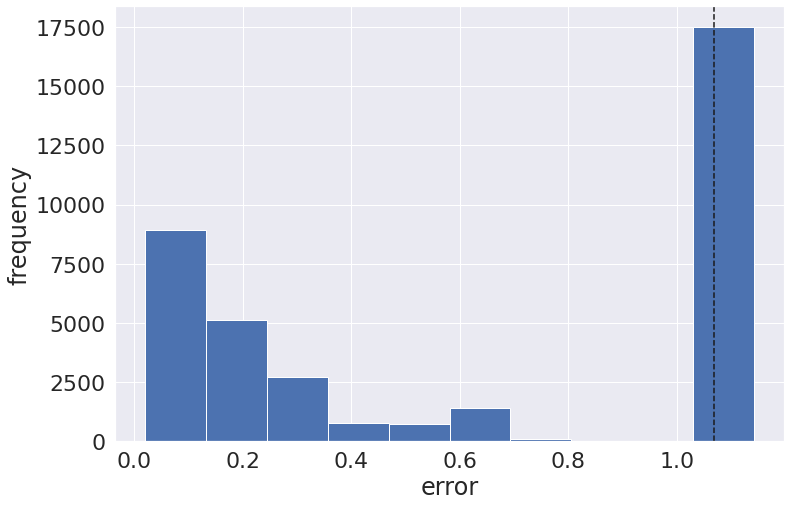

Outliers visualization


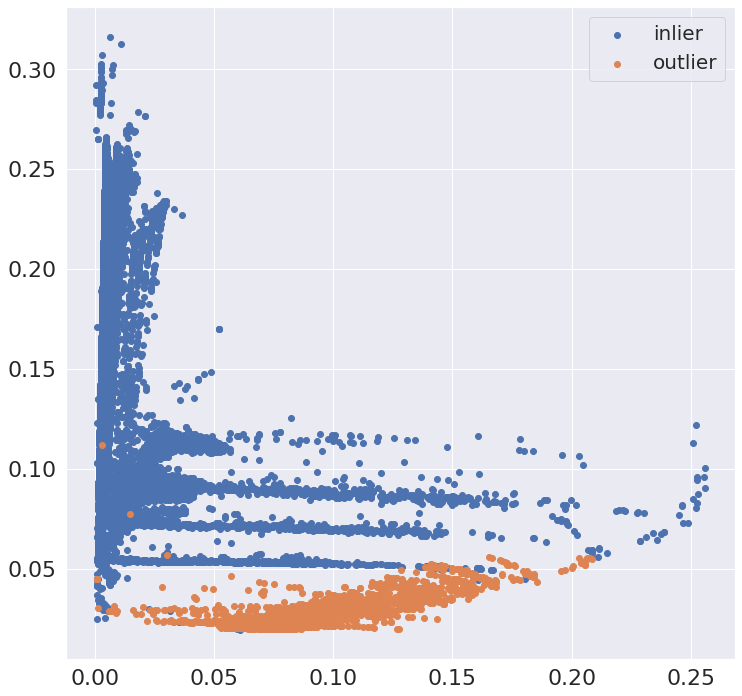

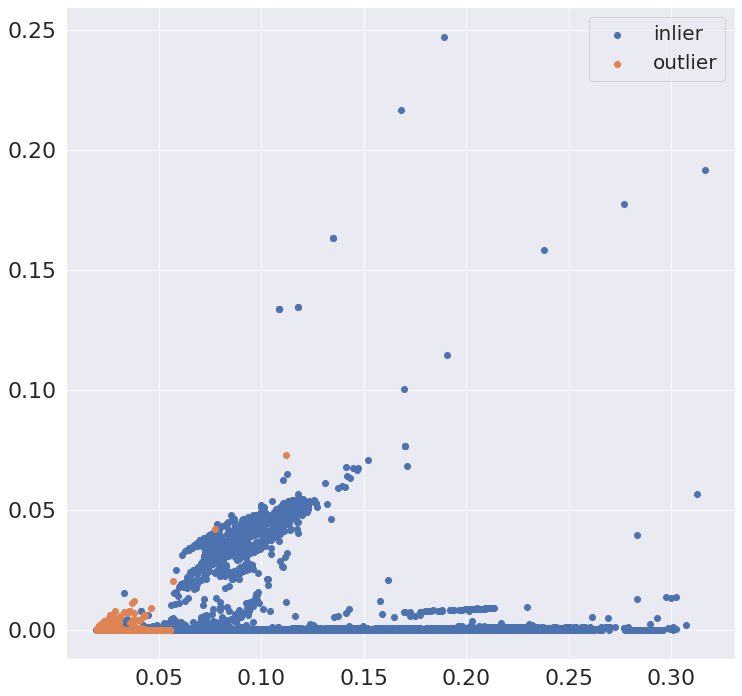

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.930     0.998     0.963     18647
           2      0.997     0.925     0.960     18647

    accuracy                          0.961     37294
   macro avg      0.964     0.961     0.961     37294
weighted avg      0.964     0.961     0.961     37294



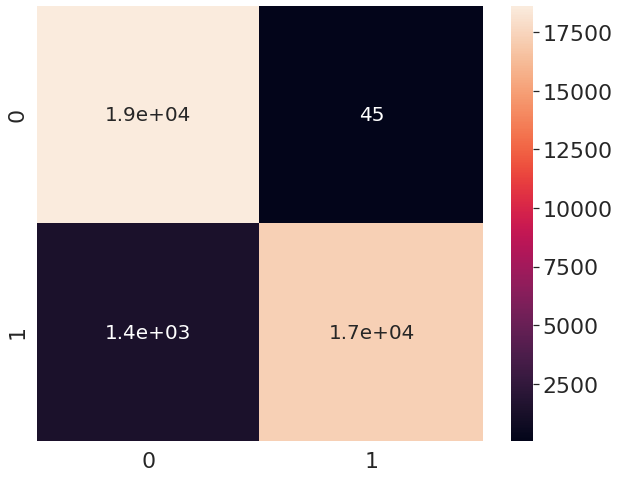

AUC score:  0.9613610768488228


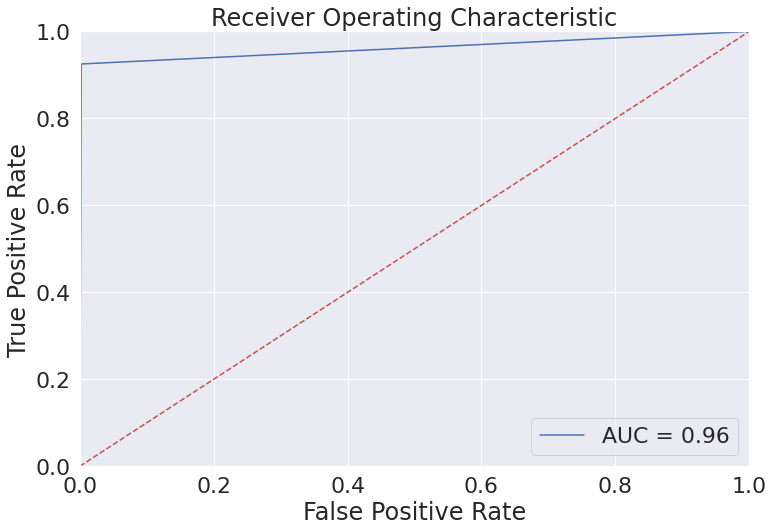

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [75]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

#### Test on Mirai

Shape:  (37294, 115) (37294,)
----------------------Test is starting----------------------
Scale data
Shape:  (37294, 115) (37294,)
Shape:  (37294, 115) (37294,)
Normalize data
Shape:  (37294, 115) (37294,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.17158245 0.02738203 0.24146389 ... 0.8223851  0.83001609 1.10118301]
Visualize quantization error


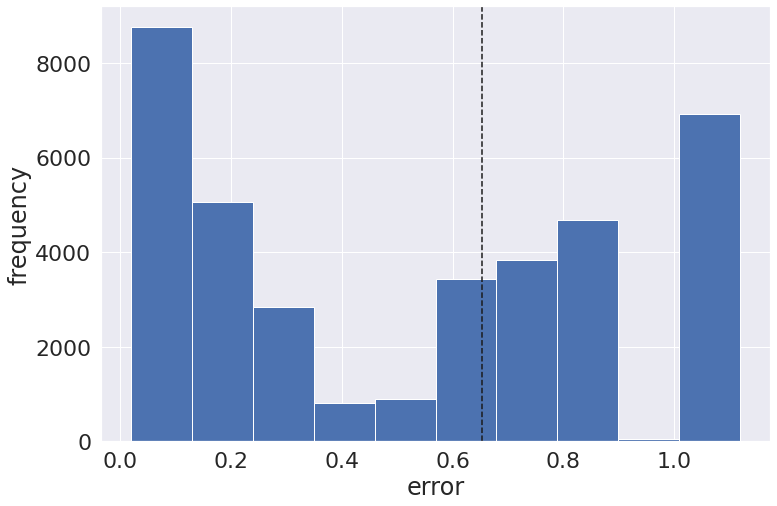

Outliers visualization


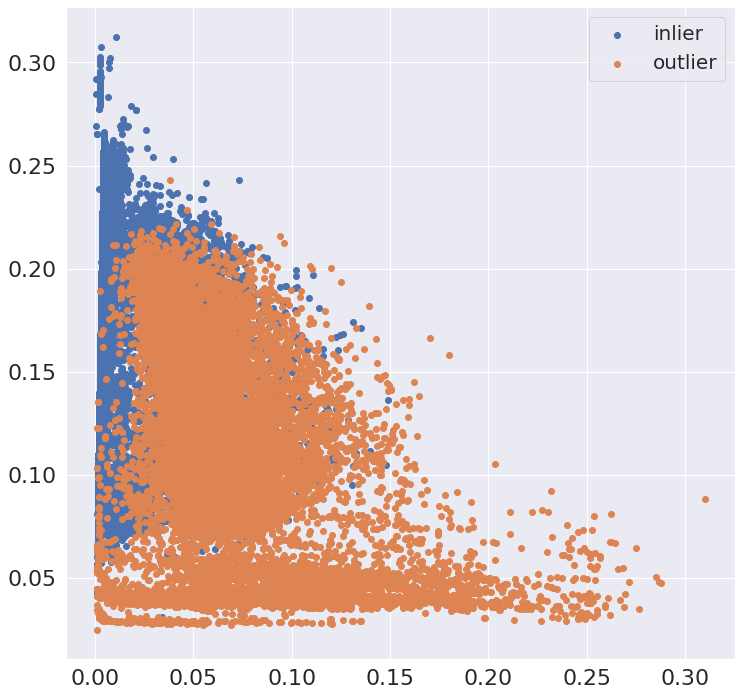

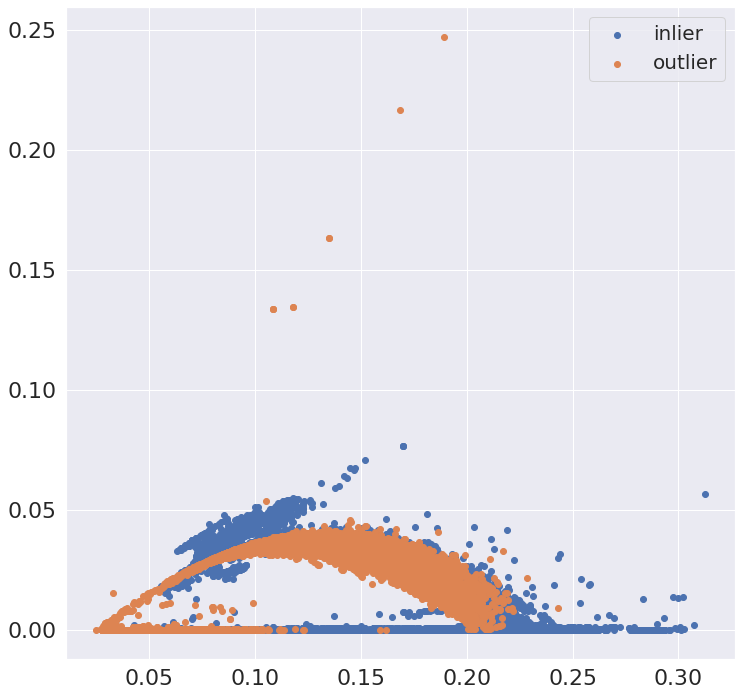

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.984     0.998     0.991     18647
           2      0.998     0.984     0.990     18647

    accuracy                          0.991     37294
   macro avg      0.991     0.991     0.991     37294
weighted avg      0.991     0.991     0.991     37294



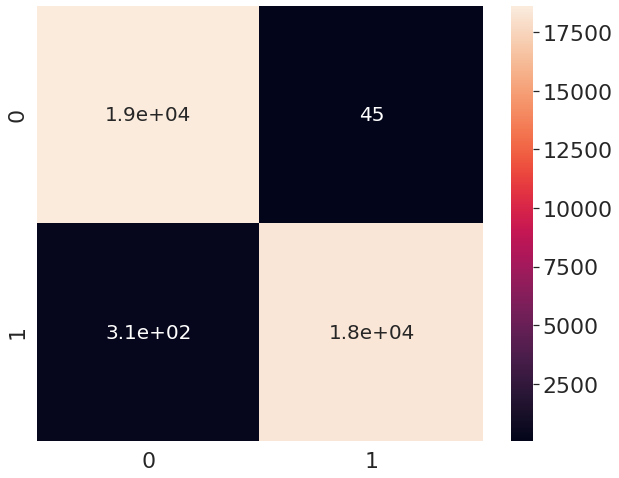

AUC score:  0.9905614844210864


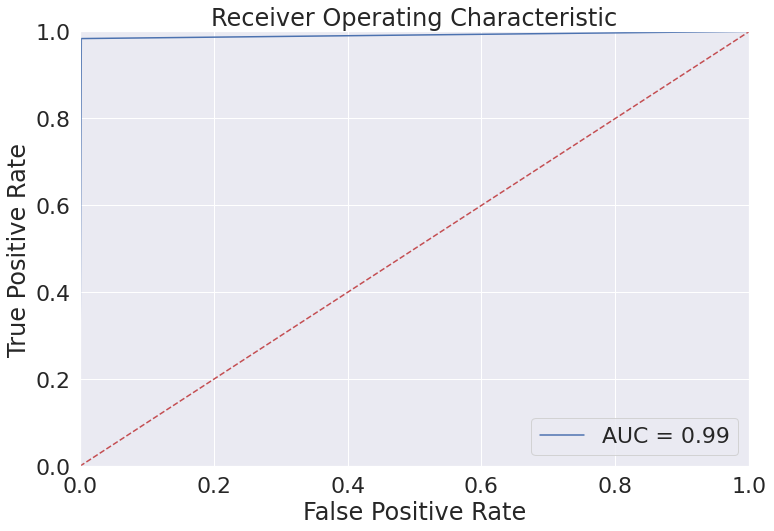

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [76]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 2) Algo rand

### Train

In [77]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo='rand', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 7.92153949e-03  1.52542373e-01  7.57470744e-15 ...  2.62075562e-04
   2.39033035e-06  1.38336041e-02]
 [ 7.89744958e-03  1.52542373e-01  4.43278699e-18 ...  2.62488761e-04
   2.09998622e-06  1.21176743e-02]
 [ 2.66627073e-03  1.01861900e-01  3.09586504e-06 ...  0.00000000e+00
  -5.81423848e-35  0.00000000e+00]
 ...
 [ 8.39533082e-02  3.02009101e-01  1.35874582e-01 ...  2.46350400e-01
   9.76027798e-01  6.17989146e-01]
 [ 2.64606474e-03  1.01694920e-01  1.90220145e-10 ...  1.08609036e-18
  -8.58508651e-36  0.00000000e+00]
 [ 2.64606451e-03  1.01694915e-01  0.00000000e+00 ...  1.08609036e-18
   0.00000000e+00  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

### Test Gafgyt

Shape:  (37294, 115) (37294,)
----------------------Test is starting----------------------
Scale data
Shape:  (37294, 115) (37294,)
Shape:  (37294, 115) (37294,)
Normalize data
Shape:  (37294, 115) (37294,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.08378432 0.02556082 0.24430953 ... 1.13979321 1.13979321 1.16729418]
Visualize quantization error


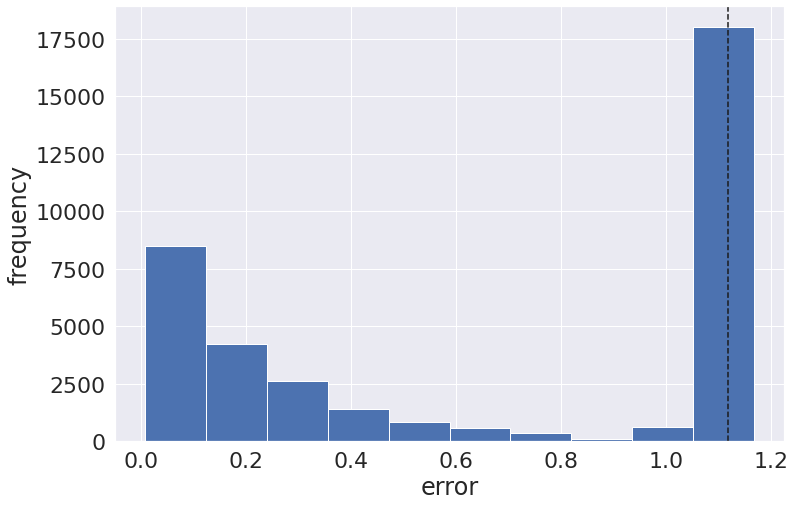

Outliers visualization


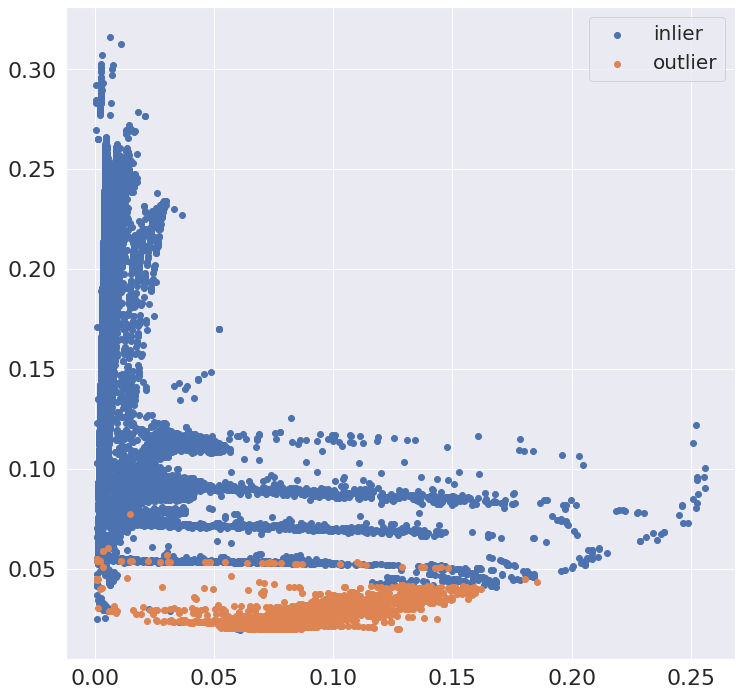

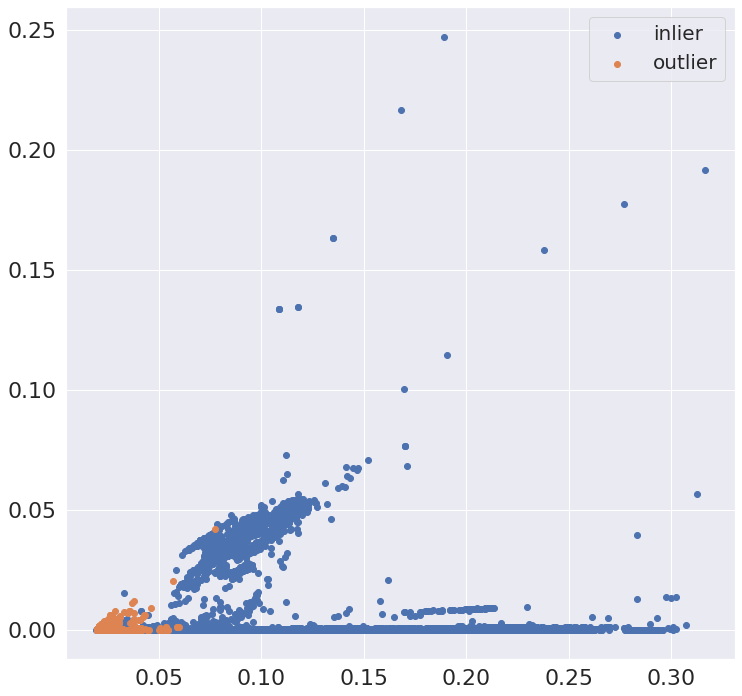

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.982     0.988     0.985     18647
           2      0.988     0.982     0.985     18647

    accuracy                          0.985     37294
   macro avg      0.985     0.985     0.985     37294
weighted avg      0.985     0.985     0.985     37294



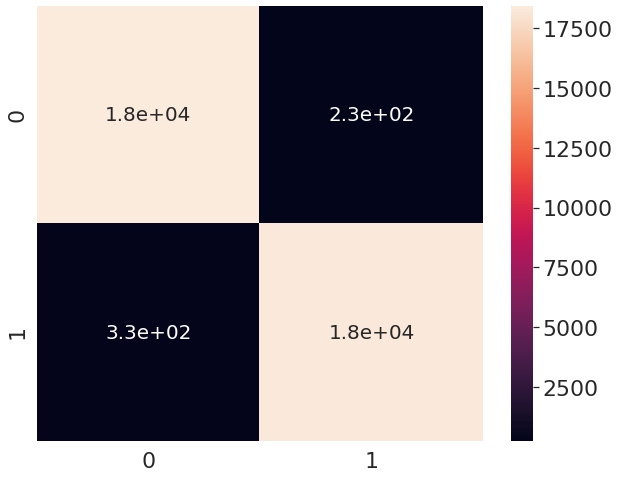

AUC score:  0.9850109937255324


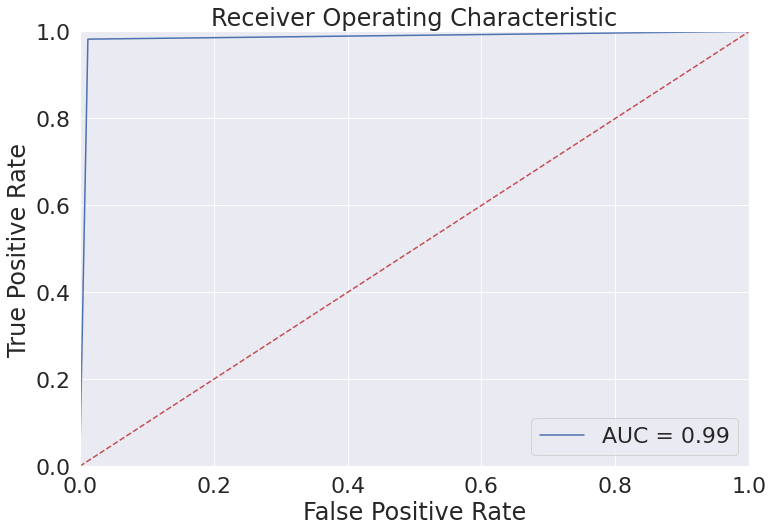

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [78]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

### Test Mirai

Shape:  (37294, 115) (37294,)
----------------------Test is starting----------------------
Scale data
Shape:  (37294, 115) (37294,)
Shape:  (37294, 115) (37294,)
Normalize data
Shape:  (37294, 115) (37294,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.08378432 0.02556082 0.24430953 ... 0.81020569 0.81976161 1.12318086]
Visualize quantization error


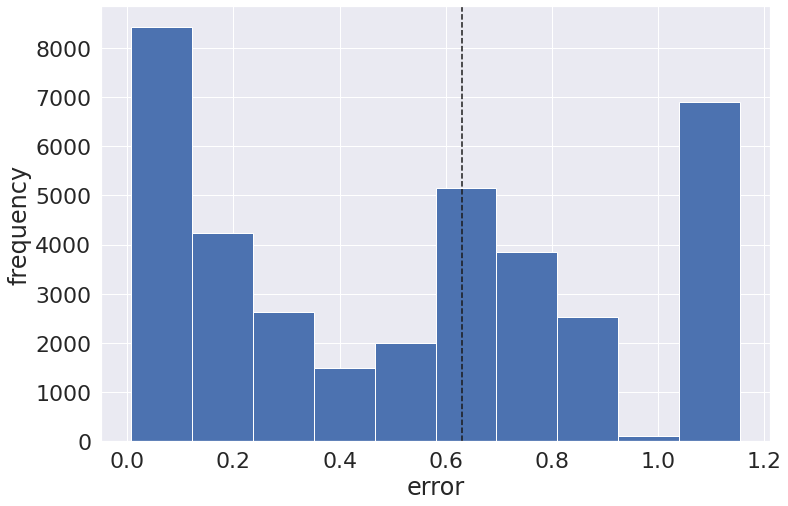

Outliers visualization


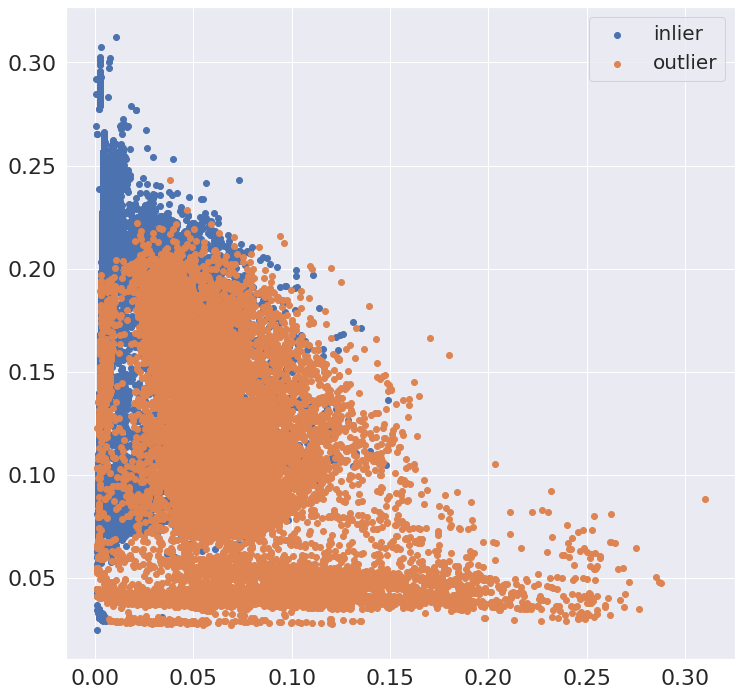

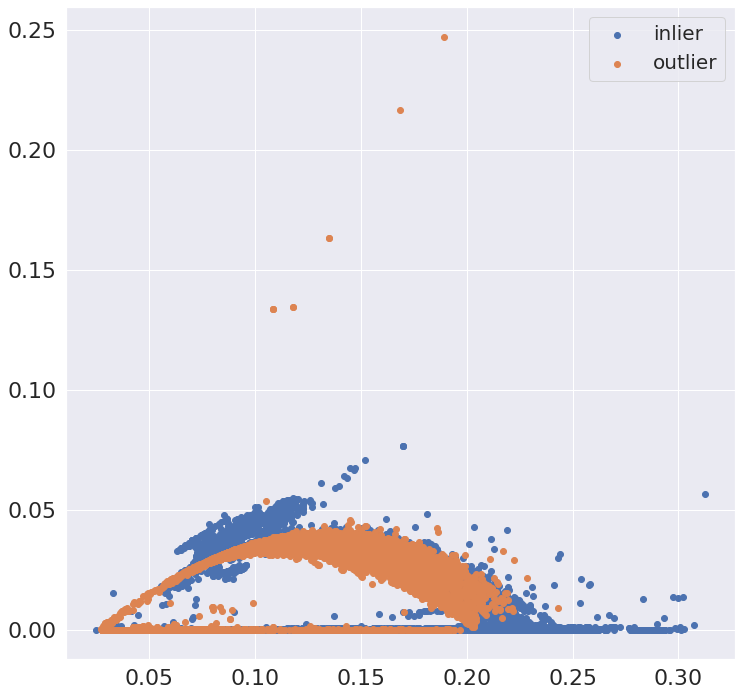

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.997     0.988     0.992     18647
           2      0.988     0.997     0.992     18647

    accuracy                          0.992     37294
   macro avg      0.992     0.992     0.992     37294
weighted avg      0.992     0.992     0.992     37294



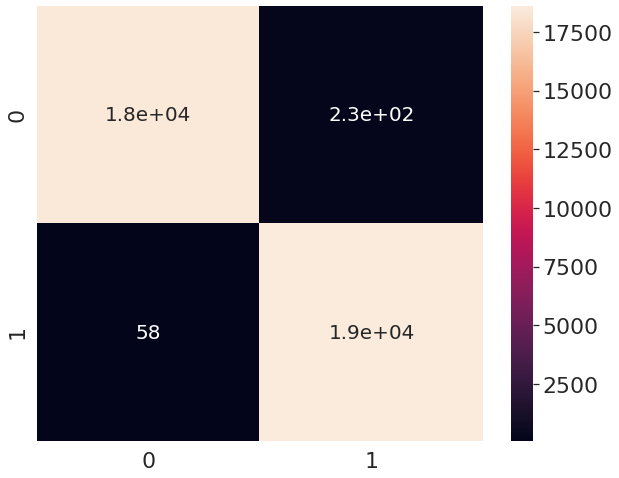

AUC score:  0.9923312060921329


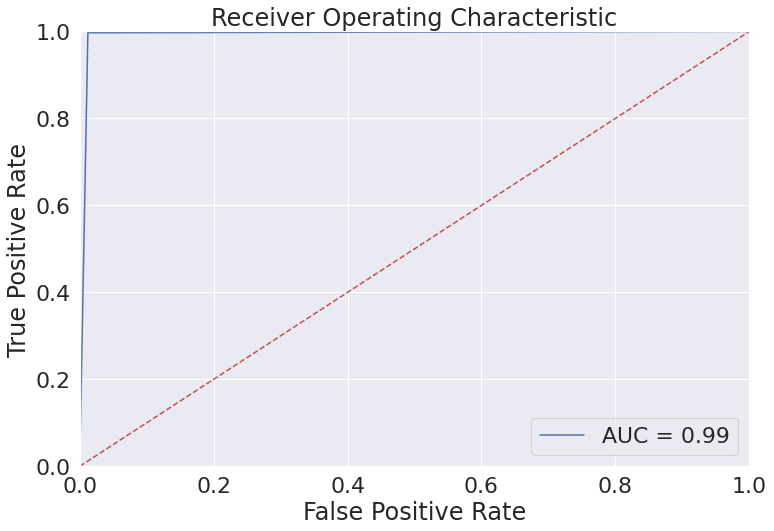

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [79]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 3) Algo atpe

In [80]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo='atpe', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 7.92153949e-03  1.52542373e-01  7.57470744e-15 ...  2.62075562e-04
   2.39033035e-06  1.38336041e-02]
 [ 7.89744958e-03  1.52542373e-01  4.43278699e-18 ...  2.62488761e-04
   2.09998622e-06  1.21176743e-02]
 [ 2.66627073e-03  1.01861900e-01  3.09586504e-06 ...  0.00000000e+00
  -5.81423848e-35  0.00000000e+00]
 ...
 [ 8.39533082e-02  3.02009101e-01  1.35874582e-01 ...  2.46350400e-01
   9.76027798e-01  6.17989146e-01]
 [ 2.64606474e-03  1.01694920e-01  1.90220145e-10 ...  1.08609036e-18
  -8.58508651e-36  0.00000000e+00]
 [ 2.64606451e-03  1.01694915e-01  0.00000000e+00 ...  1.08609036e-18
   0.00000000e+00  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

Shape:  (37294, 115) (37294,)
----------------------Test is starting----------------------
Scale data
Shape:  (37294, 115) (37294,)
Shape:  (37294, 115) (37294,)
Normalize data
Shape:  (37294, 115) (37294,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.05773442 0.01524447 0.08485452 ... 1.14453707 1.14453706 1.17870783]
Visualize quantization error


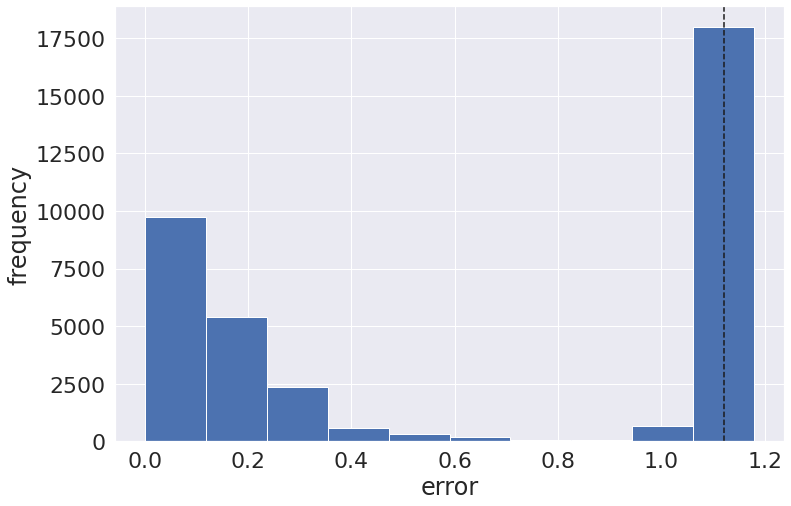

Outliers visualization


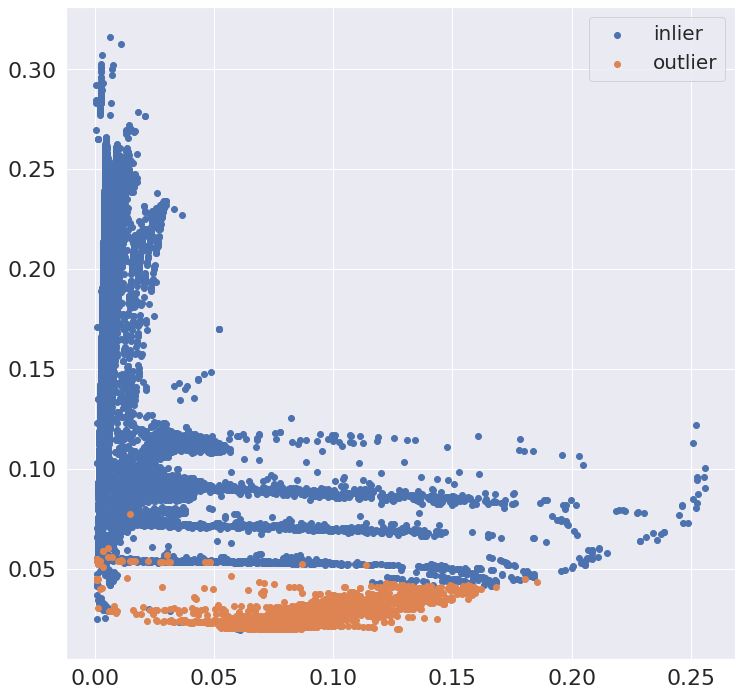

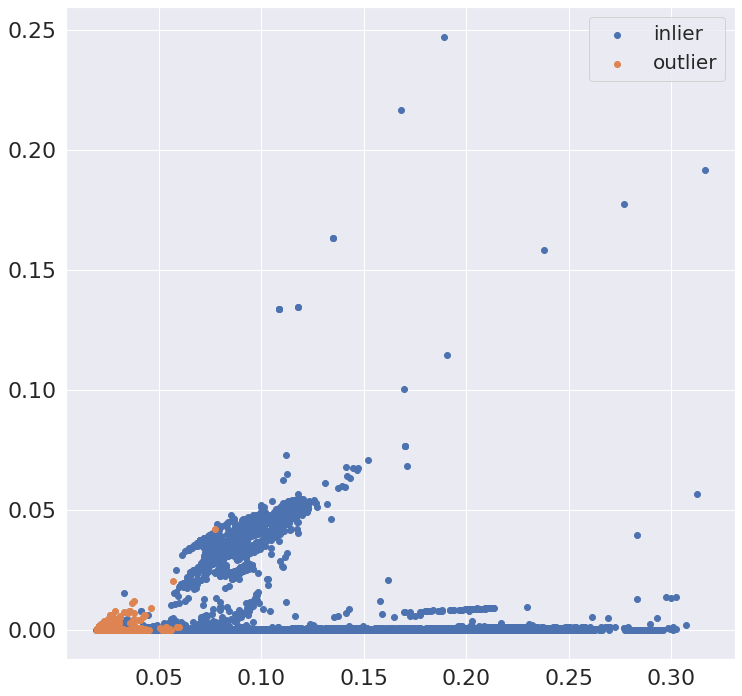

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.996     0.991     0.994     18647
           2      0.991     0.996     0.994     18647

    accuracy                          0.994     37294
   macro avg      0.994     0.994     0.994     37294
weighted avg      0.994     0.994     0.994     37294



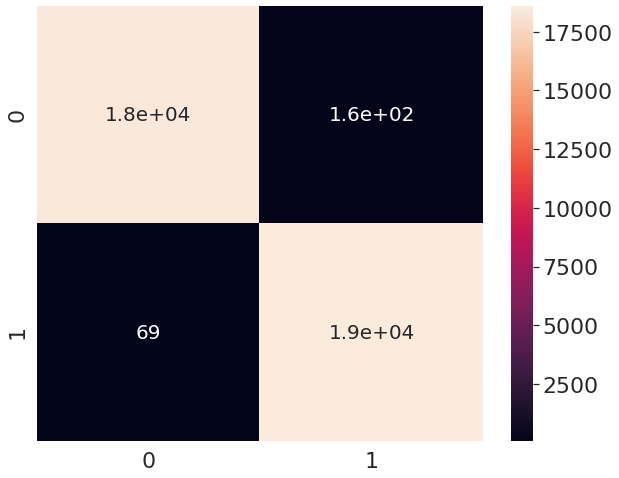

AUC score:  0.9938327881160509


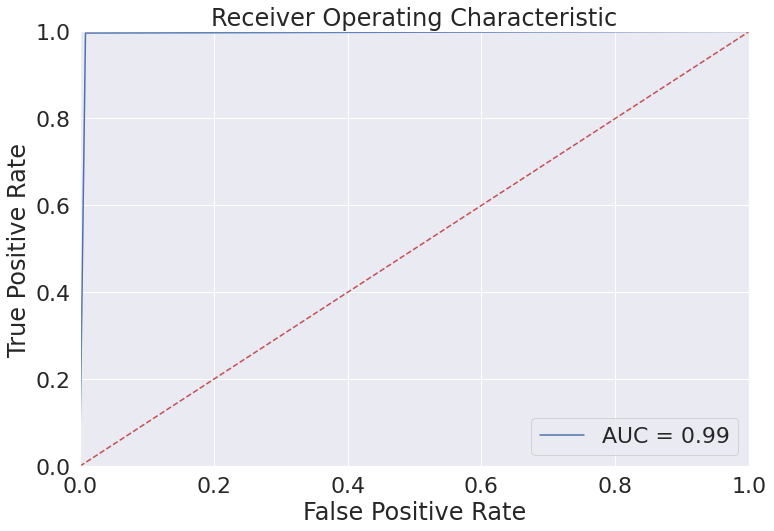

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [81]:
# test on gafgyt
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

Shape:  (37294, 115) (37294,)
----------------------Test is starting----------------------
Scale data
Shape:  (37294, 115) (37294,)
Shape:  (37294, 115) (37294,)
Normalize data
Shape:  (37294, 115) (37294,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.05773442 0.01524447 0.08485452 ... 0.84798766 0.85013757 1.12617132]
Visualize quantization error


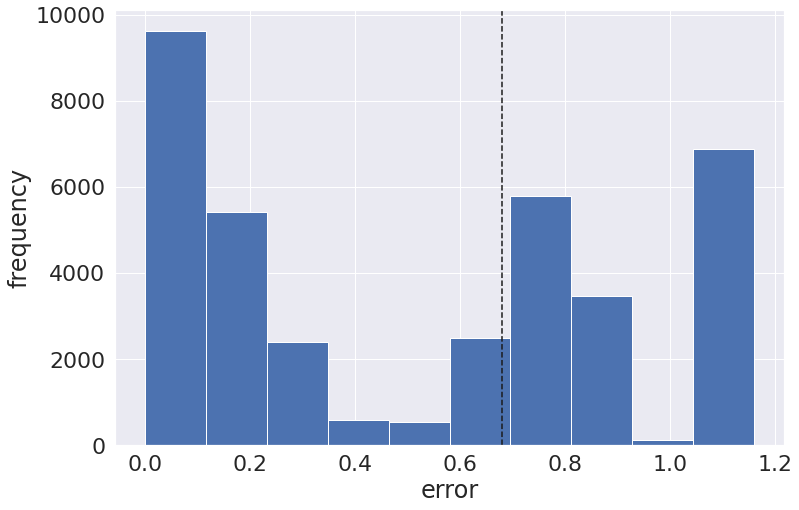

Outliers visualization


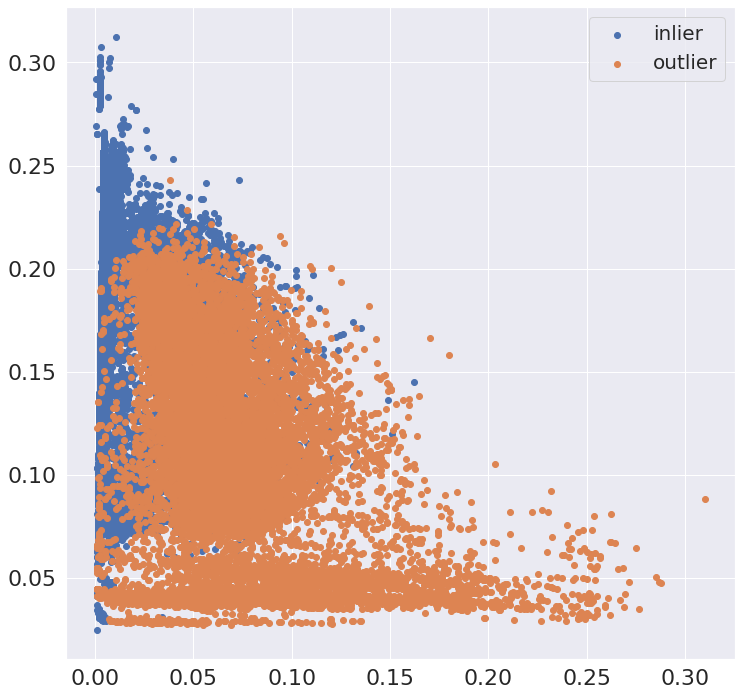

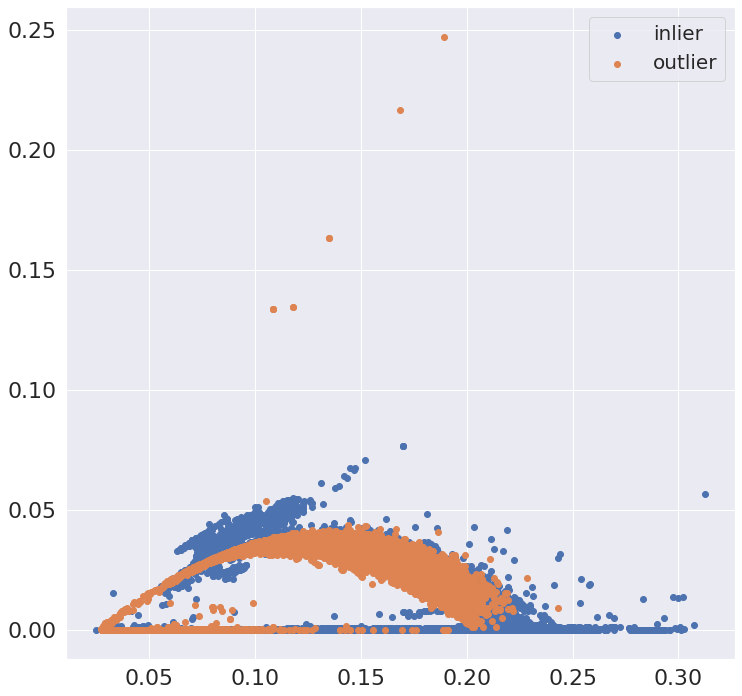

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.999     0.991     0.995     18647
           2      0.991     0.999     0.995     18647

    accuracy                          0.995     37294
   macro avg      0.995     0.995     0.995     37294
weighted avg      0.995     0.995     0.995     37294



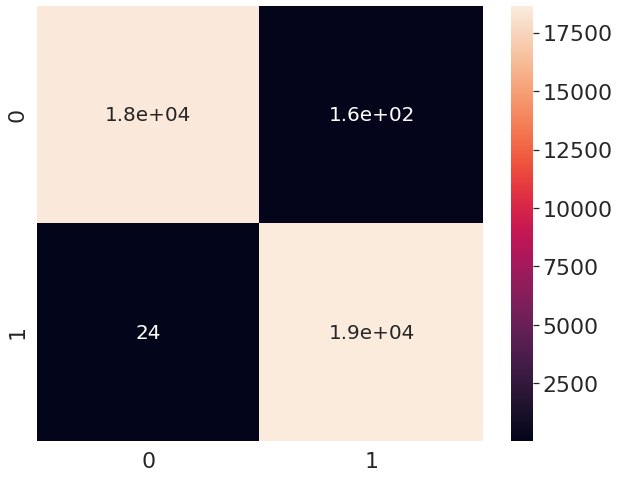

AUC score:  0.9950394165281279


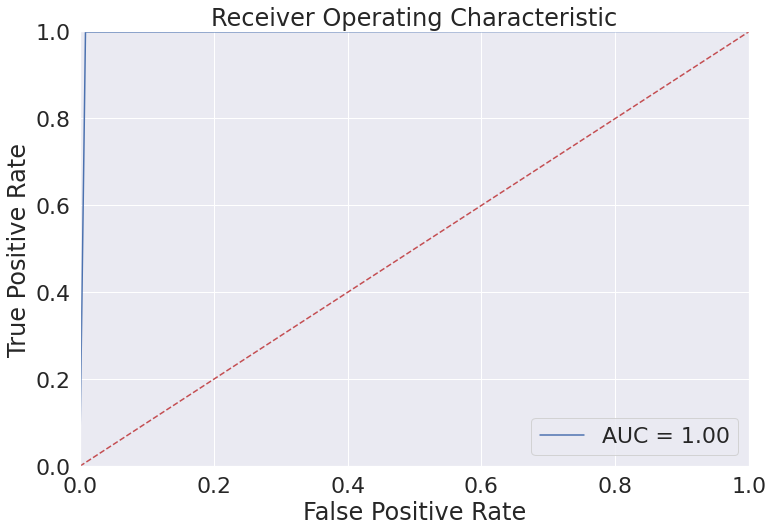

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [82]:
# test on Mirai
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

### 4) Algo anneal

In [83]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_mirai_1, y_train_mirai_1, algo='anneal', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 7.92153949e-03  1.52542373e-01  7.57470744e-15 ...  2.62075562e-04
   2.39033035e-06  1.38336041e-02]
 [ 7.89744958e-03  1.52542373e-01  4.43278699e-18 ...  2.62488761e-04
   2.09998622e-06  1.21176743e-02]
 [ 2.66627073e-03  1.01861900e-01  3.09586504e-06 ...  0.00000000e+00
  -5.81423848e-35  0.00000000e+00]
 ...
 [ 8.39533082e-02  3.02009101e-01  1.35874582e-01 ...  2.46350400e-01
   9.76027798e-01  6.17989146e-01]
 [ 2.64606474e-03  1.01694920e-01  1.90220145e-10 ...  1.08609036e-18
  -8.58508651e-36  0.00000000e+00]
 [ 2.64606451e-03  1.01694915e-01  0.00000000e+00 ...  1.08609036e-18
   0.00000000e+00  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

Shape:  (37294, 115) (37294,)
----------------------Test is starting----------------------
Scale data
Shape:  (37294, 115) (37294,)
Shape:  (37294, 115) (37294,)
Normalize data
Shape:  (37294, 115) (37294,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.09636743 0.12404142 0.23955125 ... 1.16054308 1.16054307 1.17474915]
Visualize quantization error


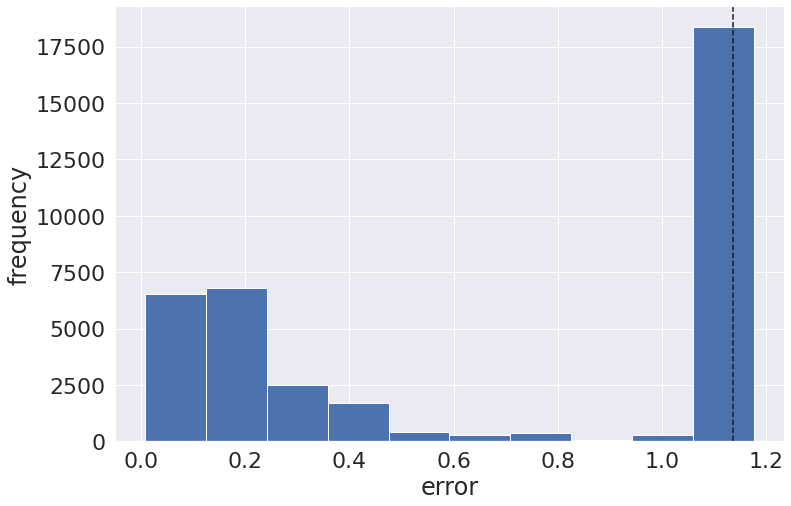

Outliers visualization


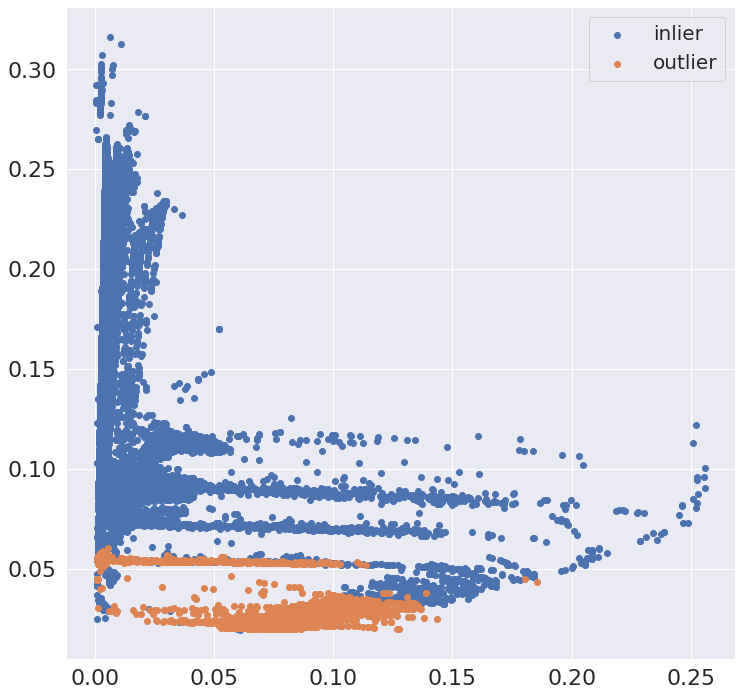

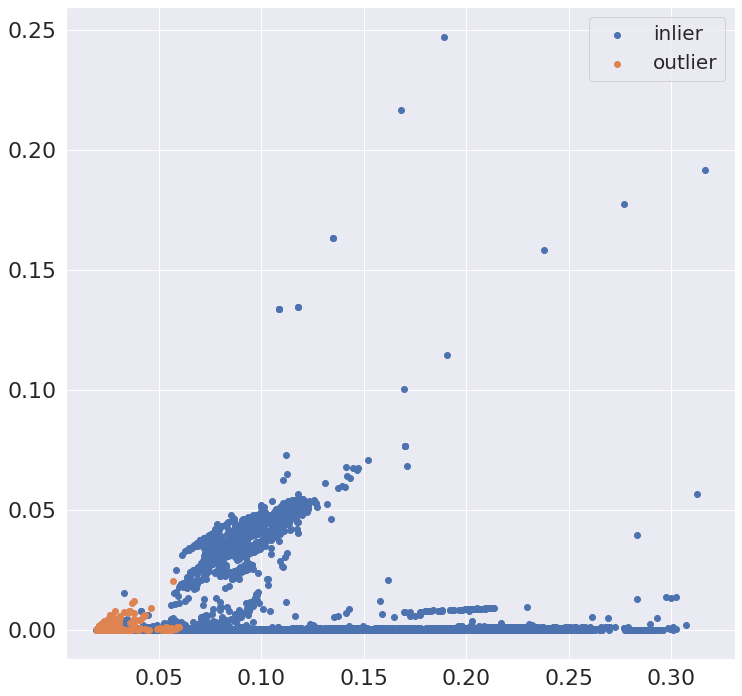

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.986     0.984     0.985     18647
           2      0.984     0.986     0.985     18647

    accuracy                          0.985     37294
   macro avg      0.985     0.985     0.985     37294
weighted avg      0.985     0.985     0.985     37294



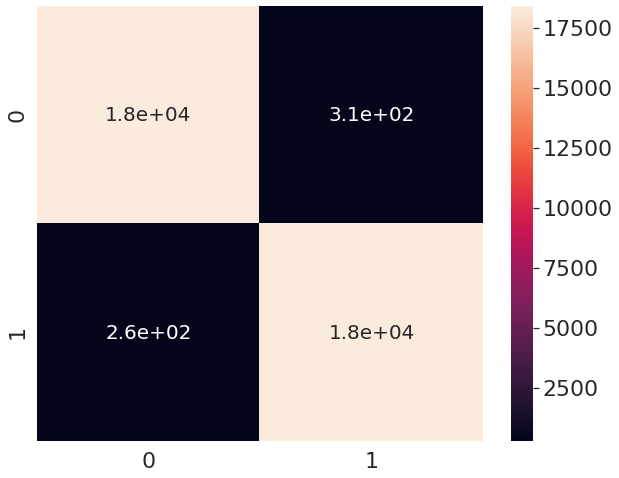

AUC score:  0.9846624121842656


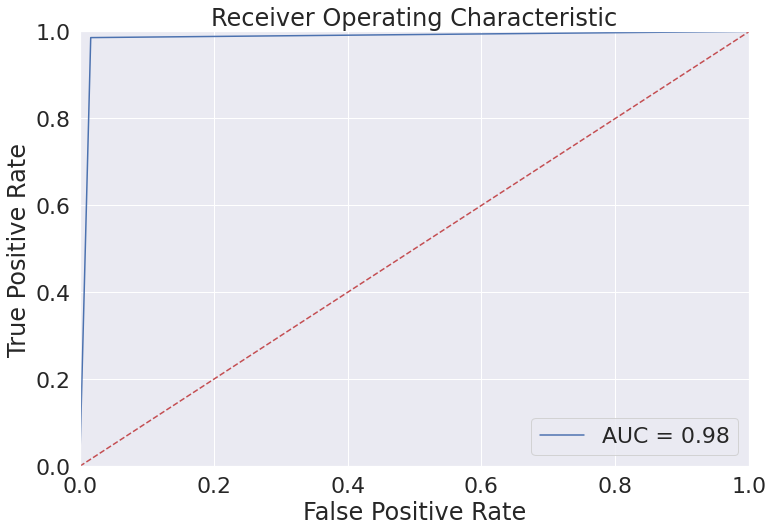

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [84]:
# test on gafgyt
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

Shape:  (37294, 115) (37294,)
----------------------Test is starting----------------------
Scale data
Shape:  (37294, 115) (37294,)
Shape:  (37294, 115) (37294,)
Normalize data
Shape:  (37294, 115) (37294,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.09636743 0.12404142 0.23955125 ... 0.79670111 0.80449863 1.13367115]
Visualize quantization error


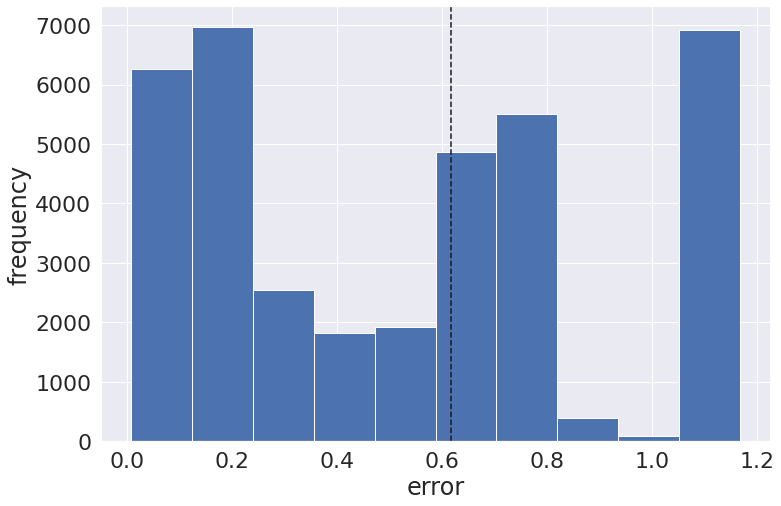

Outliers visualization


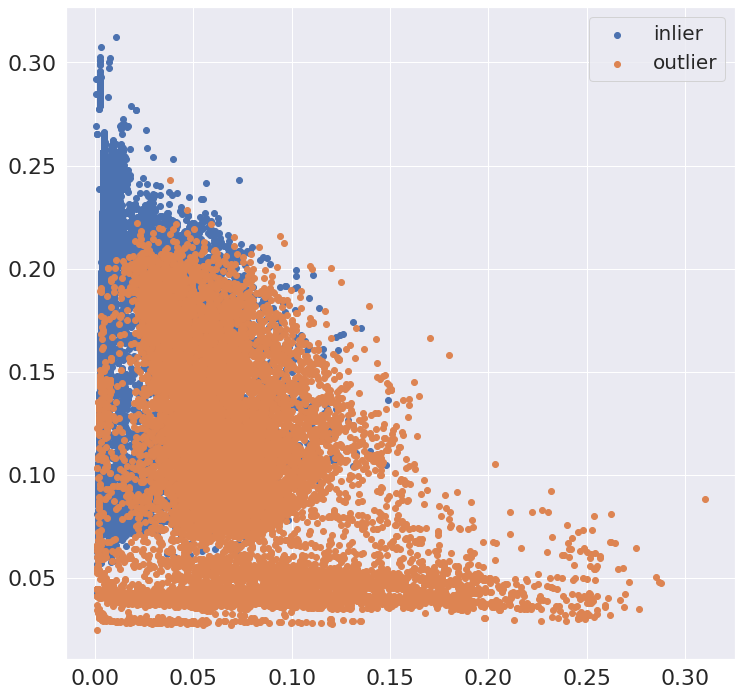

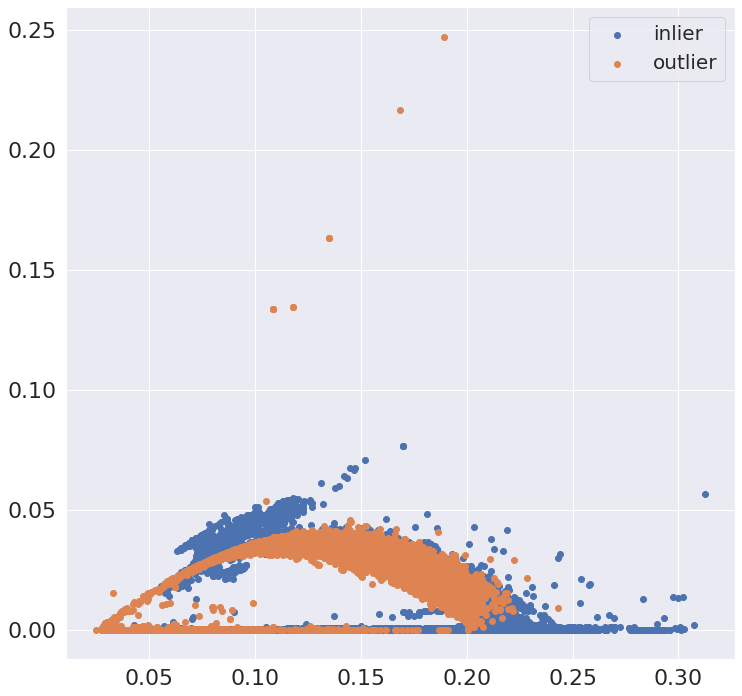

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.984     0.991     18647
           2      0.984     0.998     0.991     18647

    accuracy                          0.991     37294
   macro avg      0.991     0.991     0.991     37294
weighted avg      0.991     0.991     0.991     37294



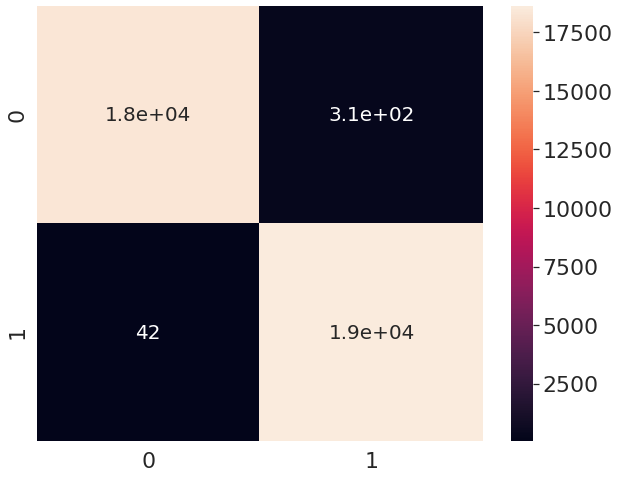

AUC score:  0.990641926315225


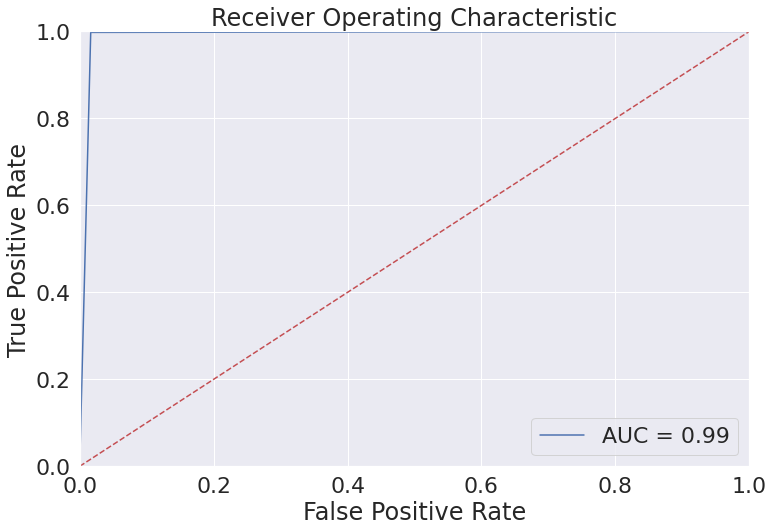

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [85]:
# test on Mirai
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, encoder=None, pca=None)

